In [1]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

pd.set_option('display.max_rows', 20)

In [2]:
df = pd.read_parquet("../Data/train_data_split.parquet")
df.head(5)

,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,customer_obs
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,2017-03-09,0.938469,0,0.008724,1.006838,0.009228,0.124035,0.008771,...,-9999,-9999,0,0,0.003818,-9999.0,0,0.000610,0,1
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,2017-04-07,0.936665,0,0.004923,1.000653,0.006151,0.126750,0.000798,...,-9999,-9999,0,0,0.005032,-9999.0,0,0.005492,0,2
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,2017-05-28,0.954180,3,0.021655,1.009672,0.006815,0.123977,0.007598,...,-9999,-9999,0,0,0.000427,-9999.0,0,0.006986,0,3
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,2017-06-13,0.960384,0,0.013683,1.002700,0.001373,0.117169,0.000685,...,-9999,-9999,0,0,0.003200,-9999.0,0,0.006527,0,4
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,2017-07-16,0.947248,0,0.015193,1.000727,0.007605,0.117325,0.004653,...,-9999,-9999,0,0,0.008889,-9999.0,0,0.008126,0,5


In [3]:
for column in df.columns:
    df[column] = df[column].replace(-9999, np.nan)

In [4]:
static_columns = ['D_63', 'D_64', 'D_66', 'D_68', 'B_30', 'B_31', 'B_38', 'D_114',
       'D_116', 'D_117', 'D_120', 'D_126']

## Analyze missing values and distributions after adjustment

In [5]:
print("Does target variable have missing values: ", df.target.isna().any())

Does target variable have missing values:  False


#########################################


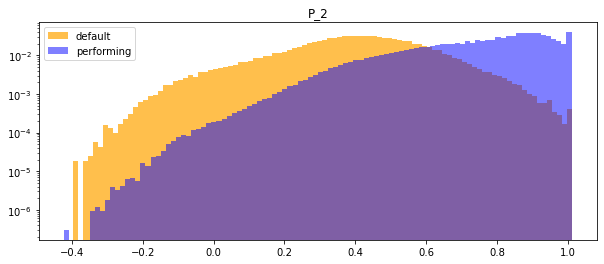

Variable: P_2 has 0.82% missing values
Min value is:  -0.4211
Max value is:  1.01
Value counts:              P_2
NaN       28679
1.001065      9
1.003309      8
1.005569      8
1.000715      8
...         ...
0.851445      1
0.836384      1
0.837046      1
0.819186      1
0.969861      1

[2933376 rows x 1 columns]
               P_2  non_missing  mis_%
customer_obs                          
1             8949       277029   3.13
2             3061       280019   1.08
3             1995       277568   0.71
4             1839       274484   0.67
5             1738       272123   0.63
6             1656       269718   0.61
7             1577       266863   0.59
8             1481       264281   0.56
9             1456       261315   0.55
10            1427       258157   0.55
11            1408       254893   0.55
12            1046       252325   0.41
13            1046       246600   0.42
14               0            1   0.00
#########################################


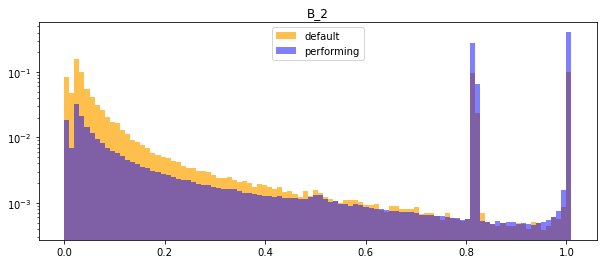

Variable: B_2 has 0.03% missing values
Min value is:  0.0
Max value is:  1.01
Value counts:             B_2
NaN       1119
1.008677    37
1.007858    37
1.009872    35
1.007556    35
...        ...
0.081268     1
0.025127     1
0.026651     1
0.051215     1
0.992880     1

[1228215 rows x 1 columns]
               B_2  non_missing  mis_%
customer_obs                          
1             1119       284859   0.39
2                0       283080   0.00
3                0       279563   0.00
4                0       276323   0.00
5                0       273861   0.00
6                0       271374   0.00
7                0       268440   0.00
8                0       265762   0.00
9                0       262771   0.00
10               0       259584   0.00
11               0       256301   0.00
12               0       253371   0.00
13               0       247646   0.00
14               0            1   0.00
#########################################


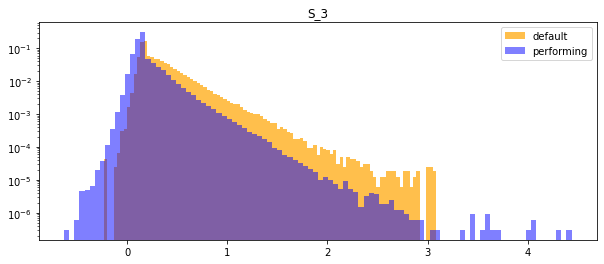

Variable: S_3 has 21.31% missing values
Min value is:  -0.6271
Max value is:  4.438
Value counts:               S_3
NaN       742327
0.159427       7
0.166646       6
0.162909       6
0.144681       6
...          ...
0.426575       1
0.531922       1
0.524969       1
0.648731       1
0.119165       1

[2529753 rows x 1 columns]
                S_3  non_missing  mis_%
customer_obs                           
1             59344       226634  20.75
2             56437       226643  19.94
3             55977       223586  20.02
4             56740       219583  20.53
5             59716       214145  21.81
6             57397       213977  21.15
7             57263       211177  21.33
8             57493       208269  21.63
9             57178       205593  21.76
10            56672       202912  21.83
11            56480       199821  22.04
12            56003       197368  22.10
13            55627       192019  22.46
14                0            1   0.00
#############################

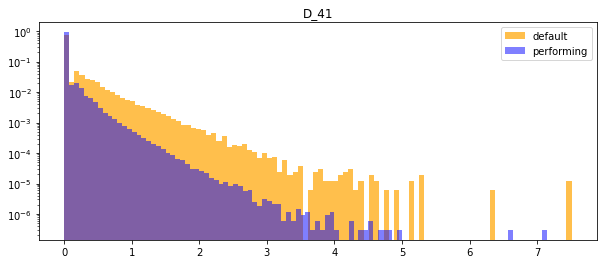

Variable: D_41 has 0.03% missing values
Min value is:  0.0
Max value is:  7.5101
Value counts:            D_41
NaN       1119
0.009406     6
0.009912     5
0.008820     5
0.009705     5
...        ...
0.000742     1
0.000772     1
0.004106     1
0.002448     1
0.003287     1

[3272653 rows x 1 columns]
              D_41  non_missing  mis_%
customer_obs                          
1             1119       284859   0.39
2                0       283080   0.00
3                0       279563   0.00
4                0       276323   0.00
5                0       273861   0.00
6                0       271374   0.00
7                0       268440   0.00
8                0       265762   0.00
9                0       262771   0.00
10               0       259584   0.00
11               0       256301   0.00
12               0       253371   0.00
13               0       247646   0.00
14               0            1   0.00
#########################################


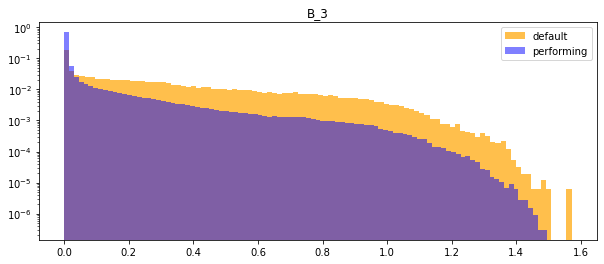

Variable: B_3 has 0.03% missing values
Min value is:  0.0
Max value is:  1.5714
Value counts:             B_3
NaN       1119
0.009461     5
0.006915     5
0.009334     5
0.009938     5
...        ...
0.005040     1
0.009481     1
0.009813     1
0.005280     1
0.008578     1

[3359636 rows x 1 columns]
               B_3  non_missing  mis_%
customer_obs                          
1             1119       284859   0.39
2                0       283080   0.00
3                0       279563   0.00
4                0       276323   0.00
5                0       273861   0.00
6                0       271374   0.00
7                0       268440   0.00
8                0       265762   0.00
9                0       262771   0.00
10               0       259584   0.00
11               0       256301   0.00
12               0       253371   0.00
13               0       247646   0.00
14               0            1   0.00
#########################################


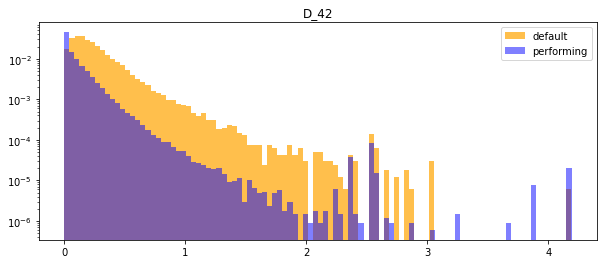

Variable: D_42 has 89.53% missing values
Min value is:  -0.0004
Max value is:  4.1911
Value counts:               D_42
NaN       3119431
0.327930        3
0.199851        3
0.241269        3
0.215698        2
...           ...
0.031933        1
0.038085        1
0.038476        1
0.039002        1
0.007126        1

[363470 rows x 1 columns]
                D_42  non_missing   mis_%
customer_obs                             
1             234821        51157   82.11
2             234026        49054   82.67
3             234329        45234   83.82
4             234891        41432   85.01
5             236883        36978   86.50
6             238467        32907   87.87
7             239771        28669   89.32
8             241164        24598   90.74
9             242773        19998   92.39
10            244291        15293   94.11
11            245740        10561   95.88
12            246832         6539   97.42
13            245442         2204   99.11
14                 1      

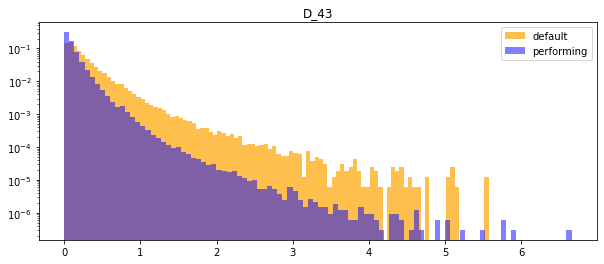

Variable: D_43 has 32.66% missing values
Min value is:  0.0
Max value is:  6.6587
Value counts:               D_43
NaN       1137957
0.069011        5
0.197872        4
0.043835        4
0.062309        4
...           ...
0.112354        1
0.188755        1
0.140607        1
0.279228        1
0.013455        1

[2281272 rows x 1 columns]
                D_43  non_missing  mis_%
customer_obs                            
1             110512       175466  38.64
2             104300       178780  36.84
3              98242       181321  35.14
4              93569       182754  33.86
5              90120       183741  32.91
6              87183       184191  32.13
7              84660       183780  31.54
8              82673       183089  31.11
9              80698       182073  30.71
10             78848       180736  30.37
11             77281       179020  30.15
12             75698       177673  29.88
13             74173       173473  29.95
14                 0            1   0.00
###

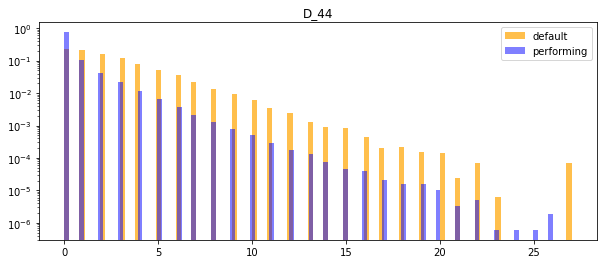

Variable: D_44 has 4.99% missing values
Min value is:  0.0
Max value is:  27.0
Value counts:           D_44
0.0   2534688
1.0    388696
NaN    174027
2.0    168572
3.0     90293
...       ...
27.0       11
26.0        6
23.0        3
24.0        2
25.0        2

[29 rows x 1 columns]
               D_44  non_missing  mis_%
customer_obs                           
1             21758       264220   7.61
2             14907       268173   5.27
3             13351       266212   4.78
4             13029       263294   4.72
5             12901       260960   4.71
6             12824       258550   4.73
7             12655       255785   4.71
8             12476       253286   4.69
9             12374       250397   4.71
10            12214       247370   4.71
11            12109       244192   4.72
12            11700       241671   4.62
13            11729       235917   4.74
14                0            1   0.00
#########################################


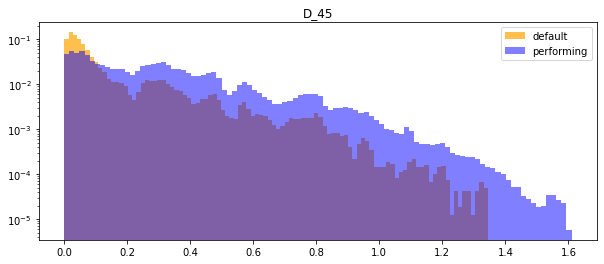

Variable: D_45 has 0.03% missing values
Min value is:  0.0
Max value is:  1.61
Value counts:            D_45
NaN       1120
0.268544     5
0.304868     5
0.455439     4
0.337713     4
...        ...
0.261416     1
0.257157     1
0.264024     1
0.267569     1
0.750784     1

[3339053 rows x 1 columns]
              D_45  non_missing  mis_%
customer_obs                          
1             1120       284858   0.39
2                0       283080   0.00
3                0       279563   0.00
4                0       276323   0.00
5                0       273861   0.00
6                0       271374   0.00
7                0       268440   0.00
8                0       265762   0.00
9                0       262771   0.00
10               0       259584   0.00
11               0       256301   0.00
12               0       253371   0.00
13               0       247646   0.00
14               0            1   0.00
#########################################


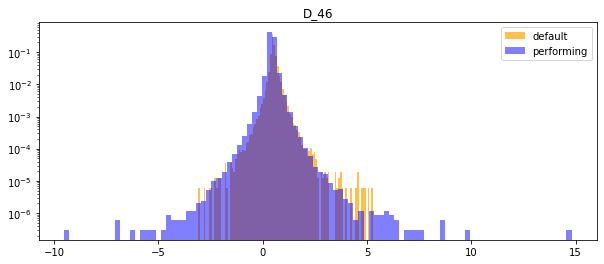

Variable: D_46 has 23.22% missing values
Min value is:  -9.5079
Max value is:  14.8066
Value counts:              D_46
NaN       809158
0.445500       8
0.445752       7
0.441770       7
0.468073       7
...          ...
0.495782       1
0.515540       1
0.474069       1
0.606288       1
0.459745       1

[2271782 rows x 1 columns]
               D_46  non_missing  mis_%
customer_obs                           
1             90058       195920  31.49
2             85572       197508  30.23
3             80390       199173  28.76
4             71887       204436  26.02
5             61523       212338  22.47
6             57621       213753  21.23
7             55640       212800  20.73
8             53328       212434  20.07
9             52505       210266  19.98
10            51602       207982  19.88
11            50733       205568  19.79
12            49698       203673  19.61
13            48601       199045  19.63
14                0            1   0.00
##########################

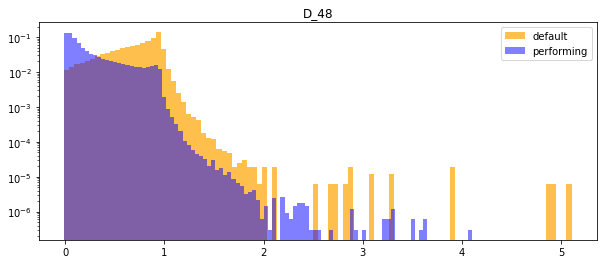

Variable: D_48 has 14.79% missing values
Min value is:  -0.0096
Max value is:  5.1067
Value counts:              D_48
NaN       515330
0.079830       4
0.509625       4
0.337172       4
0.328532       4
...          ...
0.029006       1
0.044600       1
0.015590       1
0.010822       1
0.018577       1

[2882039 rows x 1 columns]
               D_48  non_missing  mis_%
customer_obs                           
1             49408       236570  17.28
2             43610       239470  15.41
3             41978       237585  15.02
4             40703       235620  14.73
5             40117       233744  14.65
6             39472       231902  14.55
7             38716       229724  14.42
8             38287       227475  14.41
9             37830       224941  14.40
10            37028       222556  14.26
11            35840       220461  13.98
12            35919       217452  14.18
13            36422       211224  14.71
14                0            1   0.00
###########################

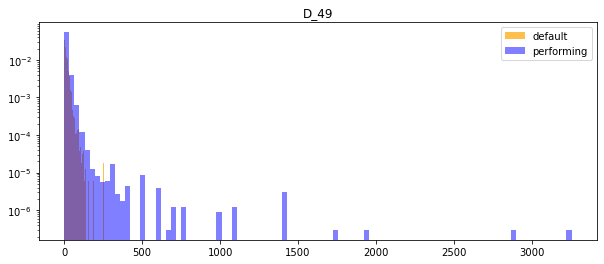

Variable: D_49 has 93.37% missing values
Min value is:  0.0
Max value is:  3254.0
Value counts:            D_49
NaN    3252967
1.0      14485
2.0      14399
4.0      14174
3.0      14048
...        ...
669.0        1
503.0        1
502.0        1
352.0        1
173.0        1

[276 rows x 1 columns]
                D_49  non_missing   mis_%
customer_obs                             
1             269592        16386   94.27
2             265173        17907   93.67
3             261552        18011   93.56
4             258374        17949   93.50
5             255842        18019   93.42
6             253291        18083   93.34
7             250496        17944   93.32
8             247809        17953   93.24
9             244805        17966   93.16
10            241669        17915   93.10
11            238511        17790   93.06
12            235623        17748   93.00
13            230229        17417   92.97
14                 1            0  100.00
###########################

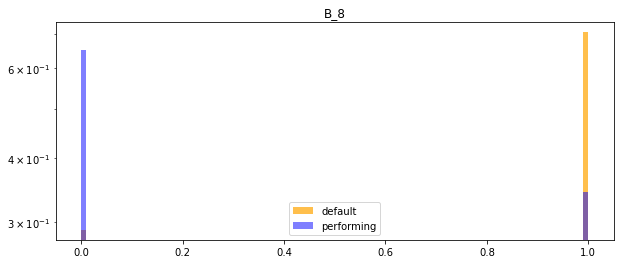

Variable: B_8 has 0.38% missing values
Min value is:  0.0
Max value is:  1.0
Value counts:           B_8
0.0  2214167
1.0  1256660
NaN    13228
               B_8  non_missing  mis_%
customer_obs                          
1             2704       283274   0.95
2             1897       281183   0.67
3             1158       278405   0.41
4              925       275398   0.33
5              911       272950   0.33
6             1236       270138   0.46
7              817       267623   0.30
8              730       265032   0.27
9              792       261979   0.30
10             574       259010   0.22
11             521       255780   0.20
12             495       252876   0.20
13             468       247178   0.19
14               0            1   0.00
#########################################


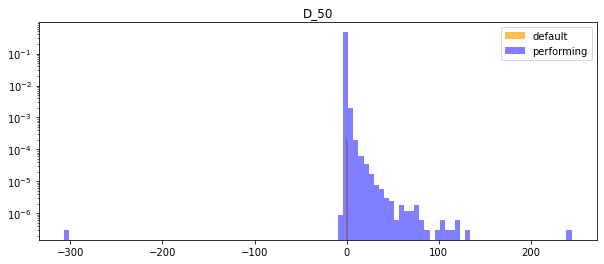

Variable: D_50 has 53.74% missing values
Min value is:  -306.4871
Max value is:  244.0427
Value counts:               D_50
NaN       1872481
0.143046        5
0.142906        4
0.097114        4
0.131074        4
...           ...
0.191498        1
0.184352        1
0.193566        1
0.221873        1
0.088608        1

[1572988 rows x 1 columns]
                D_50  non_missing  mis_%
customer_obs                            
1             158362       127616  55.38
2             154082       128998  54.43
3             151566       127997  54.22
4             149755       126568  54.20
5             147771       126090  53.96
6             145727       125647  53.70
7             143826       124614  53.58
8             142326       123436  53.55
9             139827       122944  53.21
10            137834       121750  53.10
11            136321       119980  53.19
12            134935       118436  53.26
13            130149       117497  52.55
14                 0            1   

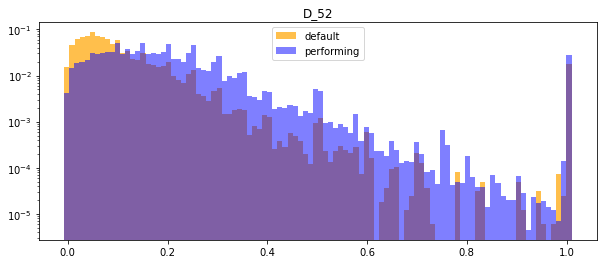

Variable: D_52 has 0.48% missing values
Min value is:  -0.0071
Max value is:  1.01
Value counts:             D_52
NaN       16590
1.001363      8
1.007328      8
1.002665      8
1.000600      7
...         ...
0.233576      1
0.230920      1
0.233880      1
0.233501      1
0.281229      1

[3203253 rows x 1 columns]
              D_52  non_missing  mis_%
customer_obs                          
1             9096       276882   3.18
2             2020       281060   0.71
3              624       278939   0.22
4              579       275744   0.21
5              586       273275   0.21
6              564       270810   0.21
7              551       267889   0.21
8              560       265202   0.21
9              564       262207   0.21
10             538       259046   0.21
11             542       255759   0.21
12             186       253185   0.07
13             180       247466   0.07
14               0            1   0.00
#########################################


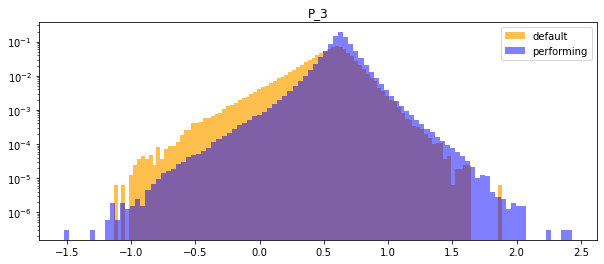

Variable: P_3 has 4.29% missing values
Min value is:  -1.5197
Max value is:  2.4281
Value counts:               P_3
NaN       149629
0.637545       9
0.614578       9
0.613228       8
0.611089       8
...          ...
0.743527       1
0.713930       1
0.445767       1
0.649767       1
0.711415       1

[2618912 rows x 1 columns]
                P_3  non_missing  mis_%
customer_obs                           
1             39938       246040  13.97
2             35439       247641  12.52
3             30076       249487  10.76
4             20560       255763   7.44
5              8366       265495   3.05
6              4609       266765   1.70
7              3321       265119   1.24
8              1505       264257   0.57
9              1414       261357   0.54
10             1366       258218   0.53
11             1313       254988   0.51
12              868       252503   0.34
13              854       246792   0.34
14                0            1   0.00
#############################

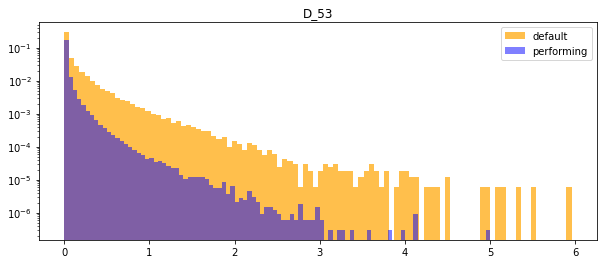

Variable: D_53 has 79.14% missing values
Min value is:  0.0
Max value is:  5.954
Value counts:               D_53
NaN       2757306
0.008379        3
0.008247        3
0.009628        3
0.007977        3
...           ...
0.005714        1
0.007110        1
0.008084        1
0.007580        1
0.051784        1

[721349 rows x 1 columns]
                D_53  non_missing  mis_%
customer_obs                            
1             232812        53166  81.41
2             229112        53968  80.94
3             224714        54849  80.38
4             220774        55549  79.90
5             217739        56122  79.51
6             214772        56602  79.14
7             211574        56866  78.82
8             208713        57049  78.53
9             205640        57131  78.26
10            202643        56941  78.06
11            199662        56639  77.90
12            196948        56423  77.73
13            192203        55443  77.61
14                 0            1   0.00
#####

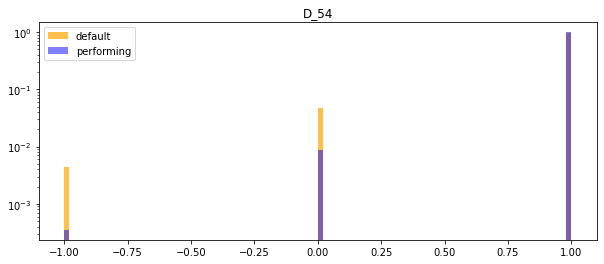

Variable: D_54 has 0.03% missing values
Min value is:  -1.0
Max value is:  1.0
Value counts:           D_54
 1.0  3444032
 0.0    37012
-1.0     1892
 NaN     1119
              D_54  non_missing  mis_%
customer_obs                          
1             1119       284859   0.39
2                0       283080   0.00
3                0       279563   0.00
4                0       276323   0.00
5                0       273861   0.00
6                0       271374   0.00
7                0       268440   0.00
8                0       265762   0.00
9                0       262771   0.00
10               0       259584   0.00
11               0       256301   0.00
12               0       253371   0.00
13               0       247646   0.00
14               0            1   0.00
#########################################


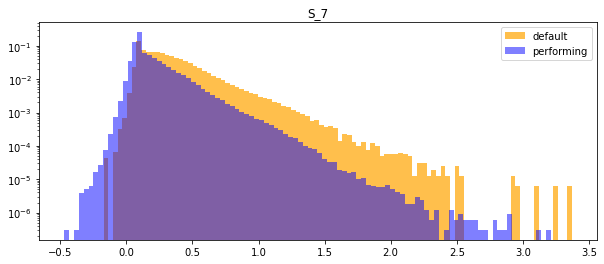

Variable: S_7 has 21.31% missing values
Min value is:  -0.4701
Max value is:  3.3682
Value counts:               S_7
NaN       742327
0.105137       5
0.100552       5
0.093796       5
0.109180       5
...          ...
0.110366       1
0.105652       1
0.104693       1
0.082764       1
0.065466       1

[2606526 rows x 1 columns]
                S_7  non_missing  mis_%
customer_obs                           
1             59344       226634  20.75
2             56437       226643  19.94
3             55977       223586  20.02
4             56740       219583  20.53
5             59716       214145  21.81
6             57397       213977  21.15
7             57263       211177  21.33
8             57493       208269  21.63
9             57178       205593  21.76
10            56672       202912  21.83
11            56480       199821  22.04
12            56003       197368  22.10
13            55627       192019  22.46
14                0            1   0.00
############################

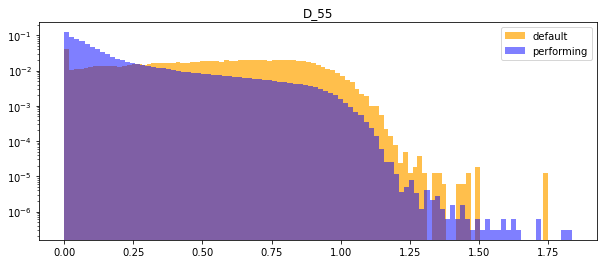

Variable: D_55 has 3.6% missing values
Min value is:  0.0
Max value is:  1.8357
Value counts:              D_55
NaN       125396
0.084045       4
0.066245       4
0.689283       4
0.583659       4
...          ...
0.041863       1
0.034683       1
0.031204       1
0.027677       1
0.025615       1

[3260772 rows x 1 columns]
               D_55  non_missing  mis_%
customer_obs                           
1             23827       262151   8.33
2             20161       262919   7.12
3             19253       260310   6.89
4              1211       275112   0.44
5              1170       272691   0.43
6              1158       270216   0.43
7              1155       267285   0.43
8              1132       264630   0.43
9              1123       261648   0.43
10             1177       258407   0.45
11            18382       237919   7.17
12            17932       235439   7.08
13            17715       229931   7.15
14                0            1   0.00
#################################

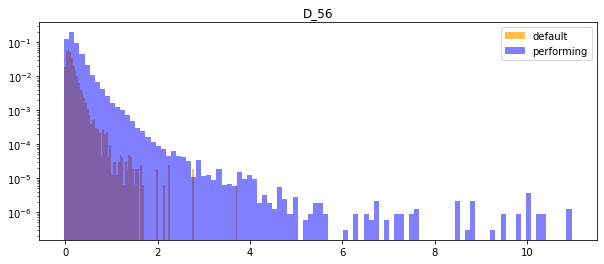

Variable: D_56 has 49.51% missing values
Min value is:  -0.0171
Max value is:  10.9565
Value counts:               D_56
NaN       1725093
0.136434        4
0.125303        4
0.143269        4
0.109540        4
...           ...
0.374621        1
0.376024        1
0.393651        1
0.392854        1
0.142516        1

[1712702 rows x 1 columns]
                D_56  non_missing  mis_%
customer_obs                            
1             162600       123378  56.86
2             158149       124931  55.87
3             141181       138382  50.50
4             137527       138796  49.77
5             134239       139622  49.02
6             132374       139000  48.78
7             129203       139237  48.13
8             127510       138252  47.98
9             125466       137305  47.75
10            122659       136925  47.25
11            120583       135718  47.05
12            118593       134778  46.81
13            115009       132637  46.44
14                 0            1   0.0

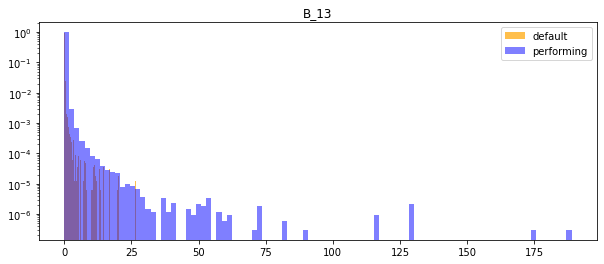

Variable: B_13 has 0.66% missing values
Min value is:  0.0
Max value is:  188.8135
Value counts:             B_13
NaN       23101
0.048225      5
0.009822      5
0.016094      4
0.008136      4
...         ...
0.432251      1
0.435864      1
0.005050      1
0.024427      1
0.048498      1

[3370323 rows x 1 columns]
               B_13  non_missing  mis_%
customer_obs                           
1             18702       267276   6.54
2              4393       278687   1.55
3                 3       279560   0.00
4                 1       276322   0.00
5                 1       273860   0.00
6                 0       271374   0.00
7                 0       268440   0.00
8                 0       265762   0.00
9                 1       262770   0.00
10                0       259584   0.00
11                0       256301   0.00
12                0       253371   0.00
13                0       247646   0.00
14                0            1   0.00
#########################################


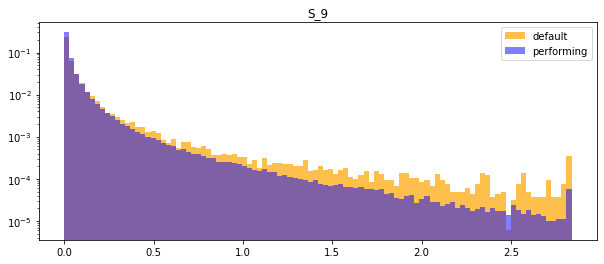

Variable: S_9 has 51.7% missing values
Min value is:  0.0
Max value is:  2.8396
Value counts:                S_9
NaN       1801292
0.040796        5
0.010168        4
0.032340        4
0.009343        4
...           ...
0.019257        1
0.020391        1
0.006954        1
0.009301        1
0.005854        1

[1654109 rows x 1 columns]
                 S_9  non_missing  mis_%
customer_obs                            
1             163498       122480  57.17
2             154053       129027  54.42
3             146722       132841  52.48
4             145485       130838  52.65
5             142552       131309  52.05
6             140614       130760  51.82
7             139412       129028  51.93
8             138621       127141  52.16
9             136787       125984  52.06
10            135233       124351  52.10
11            133386       122915  52.04
12            123170       130201  48.61
13            101759       145887  41.09
14                 0            1   0.00
#####

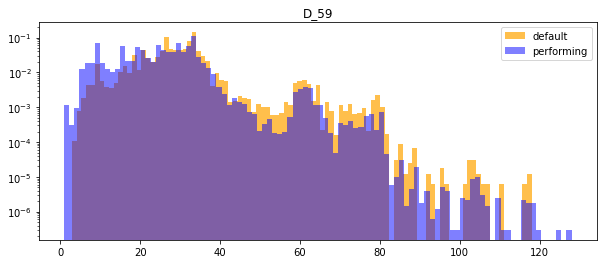

Variable: D_59 has 1.57% missing values
Min value is:  1.0
Max value is:  128.0
Value counts:           D_59
33.0   244001
9.0    233098
32.0   207263
21.0   158472
26.0   156303
...       ...
99.0        1
111.0       1
128.0       1
125.0       1
112.0       1

[118 rows x 1 columns]
               D_59  non_missing  mis_%
customer_obs                           
1             32962       253016  11.53
2             14483       268597   5.12
3              1083       278480   0.39
4               922       275401   0.33
5               868       272993   0.32
6               804       270570   0.30
7               775       267665   0.29
8               769       264993   0.29
9               706       262065   0.27
10              637       258947   0.25
11              600       255701   0.23
12              157       253214   0.06
13               91       247555   0.04
14                0            1   0.00
#########################################


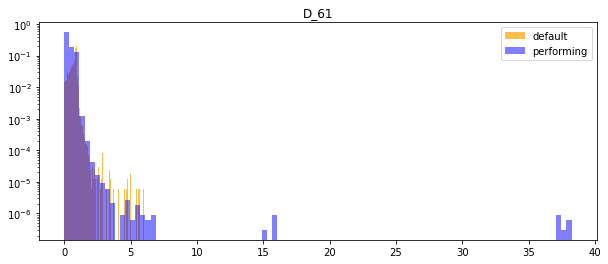

Variable: D_61 has 12.74% missing values
Min value is:  -0.0093
Max value is:  38.2409
Value counts:               D_61
 NaN       443994
 0.890354       5
 0.902058       5
 0.926101       5
 0.889264       5
...           ...
 0.014628       1
 0.007658       1
-0.006534       1
-0.006793       1
-0.003556       1

[2927023 rows x 1 columns]
               D_61  non_missing  mis_%
customer_obs                           
1             35725       250253  12.49
2             35562       247518  12.56
3             35259       244304  12.61
4             34846       241477  12.61
5             34598       239263  12.63
6             34567       236807  12.74
7             34047       234393  12.68
8             33784       231978  12.71
9             33680       229091  12.82
10            33448       226136  12.89
11            34145       222156  13.32
12            32519       220852  12.83
13            31814       215832  12.85
14                0            1   0.00
##############

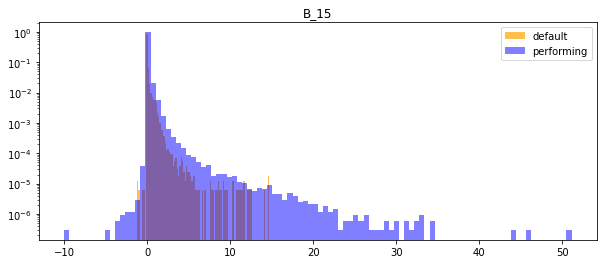

Variable: B_15 has 0.15% missing values
Min value is:  -9.9949
Max value is:  51.131
Value counts:            B_15
NaN       5171
0.009786     6
0.008891     6
0.008077     5
0.008996     5
...        ...
0.076081     1
0.038981     1
0.185551     1
0.029926     1
0.003001     1

[3307320 rows x 1 columns]
              B_15  non_missing  mis_%
customer_obs                          
1              465       285513   0.16
2              458       282622   0.16
3              453       279110   0.16
4              443       275880   0.16
5              449       273412   0.16
6              796       270578   0.29
7              452       267988   0.17
8              437       265325   0.16
9              398       262373   0.15
10             393       259191   0.15
11             424       255877   0.17
12               3       253368   0.00
13               0       247646   0.00
14               0            1   0.00
#########################################


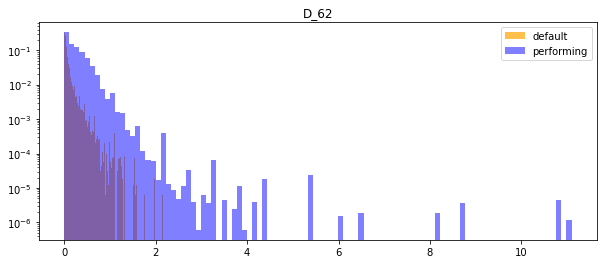

Variable: D_62 has 15.75% missing values
Min value is:  -0.0025
Max value is:  11.101
Value counts:              D_62
NaN       548632
0.545005       6
0.540526       5
0.547640       5
0.323582       5
...          ...
0.262339       1
0.261734       1
0.399441       1
0.258235       1
0.078830       1

[2815673 rows x 1 columns]
               D_62  non_missing  mis_%
customer_obs                           
1             48838       237140  17.08
2             45623       237457  16.12
3             43759       235804  15.65
4             43743       232580  15.83
5             45816       228045  16.73
6             43468       227906  16.02
7             41646       226794  15.51
8             40748       225014  15.33
9             40235       222536  15.31
10            39838       219746  15.35
11            39449       216852  15.39
12            38356       215015  15.14
13            37113       210533  14.99
14                0            1   0.00
###########################

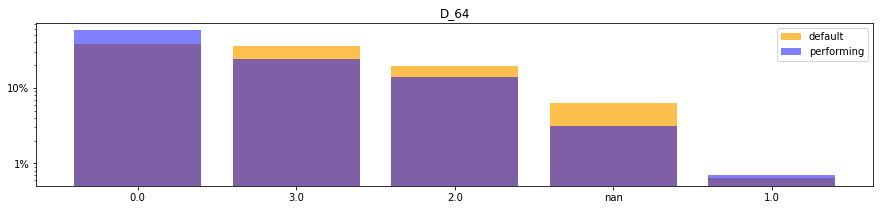

Variable: D_64 has 3.25% missing values
Min value is:  0.0
Max value is:  3.0
Value counts:          D_64
0.0  1991133
3.0   862308
2.0   493027
NaN   113257
1.0    24330
               D_64  non_missing  mis_%
customer_obs                           
1             38744       247234  13.55
2             31095       251985  10.98
3             11214       268349   4.01
4              5856       270467   2.12
5              1182       272679   0.43
6              3445       267929   1.27
7              3439       265001   1.28
8              3330       262432   1.25
9              3239       259532   1.23
10             3295       256289   1.27
11             3219       253082   1.26
12             2784       250587   1.10
13             2415       245231   0.98
14                0            1   0.00
#########################################


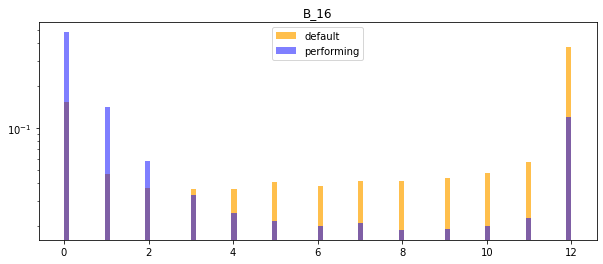

Variable: B_16 has 0.03% missing values
Min value is:  0.0
Max value is:  12.0
Value counts:           B_16
0.0   1622419
1.0    478485
12.0   456795
2.0    198243
3.0    115457
4.0     88065
11.0    84394
5.0     78315
7.0     76249
10.0    73360
6.0     72290
9.0     70181
8.0     68683
NaN      1119
              B_16  non_missing  mis_%
customer_obs                          
1             1119       284859   0.39
2                0       283080   0.00
3                0       279563   0.00
4                0       276323   0.00
5                0       273861   0.00
6                0       271374   0.00
7                0       268440   0.00
8                0       265762   0.00
9                0       262771   0.00
10               0       259584   0.00
11               0       256301   0.00
12               0       253371   0.00
13               0       247646   0.00
14               0            1   0.00
#########################################


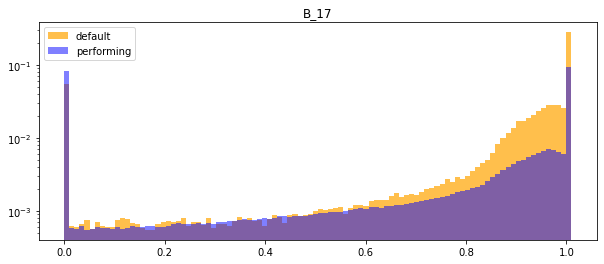

Variable: B_17 has 64.44% missing values
Min value is:  0.0
Max value is:  1.01
Value counts:               B_17
NaN       2244956
1.004919       15
1.000606       14
1.005563       14
1.002449       14
...           ...
0.006005        1
0.007110        1
0.004594        1
0.005149        1
0.003771        1

[943297 rows x 1 columns]
                B_17  non_missing  mis_%
customer_obs                            
1             197236        88742  68.97
2             193013        90067  68.18
3             186972        92591  66.88
4             181305        95018  65.61
5             177170        96691  64.69
6             173930        97444  64.09
7             170690        97750  63.59
8             167920        97842  63.18
9             165033        97738  62.80
10            162449        97135  62.58
11            159628        96673  62.28
12            156615        96756  61.81
13            152995        94651  61.78
14                 0            1   0.00
######

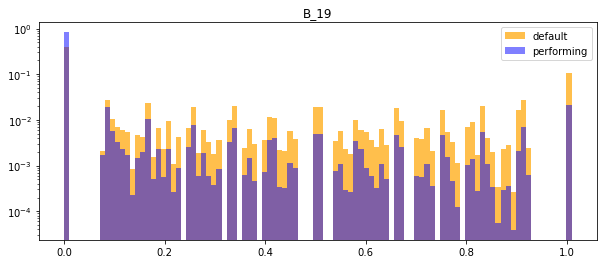

Variable: B_19 has 0.03% missing values
Min value is:  0.0
Max value is:  1.01
Value counts:            B_19
NaN       1119
1.009087     8
1.004553     7
1.009163     7
1.004419     7
...        ...
0.505703     1
0.503864     1
0.503470     1
0.757381     1
0.002403     1

[3260156 rows x 1 columns]
              B_19  non_missing  mis_%
customer_obs                          
1             1119       284859   0.39
2                0       283080   0.00
3                0       279563   0.00
4                0       276323   0.00
5                0       273861   0.00
6                0       271374   0.00
7                0       268440   0.00
8                0       265762   0.00
9                0       262771   0.00
10               0       259584   0.00
11               0       256301   0.00
12               0       253371   0.00
13               0       247646   0.00
14               0            1   0.00
#########################################


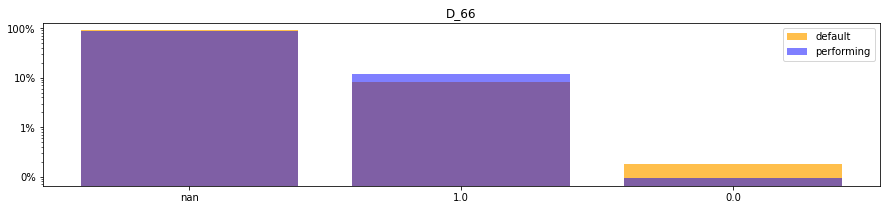

Variable: D_66 has 87.95% missing values
Min value is:  0.0
Max value is:  1.0
Value counts:          D_66
NaN  3064195
1.0   416515
0.0     3345
                D_66  non_missing   mis_%
customer_obs                             
1             255864        30114   89.47
2             252330        30750   89.14
3             246879        32684   88.31
4             240048        36275   86.87
5             240255        33606   87.73
6             238013        33361   87.71
7             235495        32945   87.73
8             233134        32628   87.72
9             230459        32312   87.70
10            227734        31850   87.73
11            224827        31474   87.72
12            222213        31158   87.70
13            216943        30703   87.60
14                 1            0  100.00
#########################################


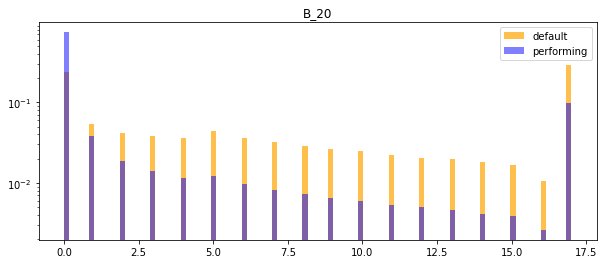

Variable: B_20 has 0.03% missing values
Min value is:  0.0
Max value is:  17.0
Value counts:           B_20
0.0   2510118
17.0   375887
1.0    133931
2.0     68006
3.0     52370
5.0     47572
4.0     43954
6.0     38245
7.0     32054
8.0     28513
9.0     26105
10.0    23793
11.0    21480
12.0    20056
13.0    18405
14.0    16623
15.0    15459
16.0    10365
NaN      1119
              B_20  non_missing  mis_%
customer_obs                          
1             1119       284859   0.39
2                0       283080   0.00
3                0       279563   0.00
4                0       276323   0.00
5                0       273861   0.00
6                0       271374   0.00
7                0       268440   0.00
8                0       265762   0.00
9                0       262771   0.00
10               0       259584   0.00
11               0       256301   0.00
12               0       253371   0.00
13               0       247646   0.00
14               0            1   0.00
##

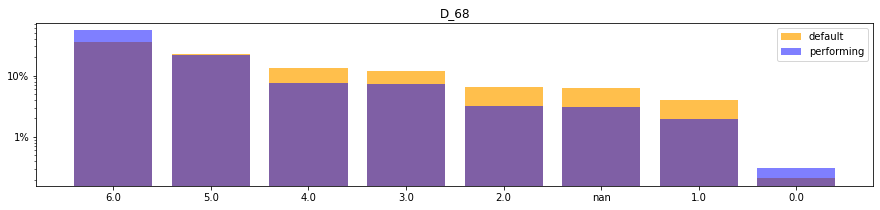

Variable: D_68 has 3.21% missing values
Min value is:  0.0
Max value is:  6.0
Value counts:          D_68
6.0  1891309
5.0   746219
4.0   270212
3.0   266323
2.0   117224
NaN   111795
1.0    70207
0.0    10766
               D_68  non_missing  mis_%
customer_obs                           
1             38476       247502  13.45
2             30878       252202  10.91
3             12754       266809   4.56
4              6197       270126   2.24
5              3601       270260   1.31
6              2931       268443   1.08
7              2844       265596   1.06
8              2726       263036   1.03
9              2634       260137   1.00
10             2517       257067   0.97
11             2435       253866   0.95
12             2018       251353   0.80
13             1784       245862   0.72
14                0            1   0.00
#########################################


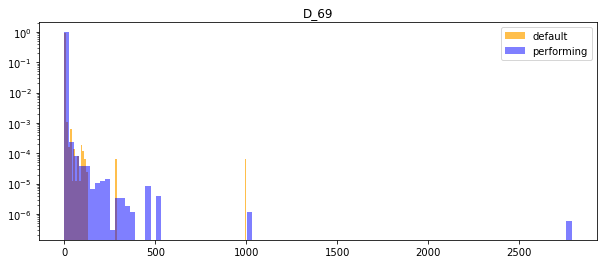

Variable: D_69 has 2.82% missing values
Min value is:  0.0
Max value is:  2787.3416
Value counts:             D_69
NaN       98358
0.009184      6
0.009130      6
0.009962      6
0.008567      6
...         ...
0.002739      1
0.007455      1
0.007101      1
0.005378      1
0.004388      1

[3157032 rows x 1 columns]
               D_69  non_missing  mis_%
customer_obs                           
1             38456       247522  13.45
2             30842       252238  10.90
3             12600       266963   4.51
4              5925       270398   2.14
5              1957       271904   0.71
6              1349       270025   0.50
7              1311       267129   0.49
8              1237       264525   0.47
9              1179       261592   0.45
10             1142       258442   0.44
11             1090       255211   0.43
12              694       252677   0.27
13              576       247070   0.23
14                0            1   0.00
#########################################

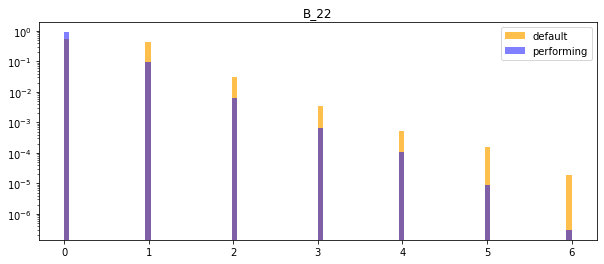

Variable: B_22 has 0.03% missing values
Min value is:  0.0
Max value is:  6.0
Value counts:          B_22
0.0  3072967
1.0   381033
2.0    25635
3.0     2788
NaN     1119
4.0      454
5.0       55
6.0        4
              B_22  non_missing  mis_%
customer_obs                          
1             1119       284859   0.39
2                0       283080   0.00
3                0       279563   0.00
4                0       276323   0.00
5                0       273861   0.00
6                0       271374   0.00
7                0       268440   0.00
8                0       265762   0.00
9                0       262771   0.00
10               0       259584   0.00
11               0       256301   0.00
12               0       253371   0.00
13               0       247646   0.00
14               0            1   0.00
#########################################


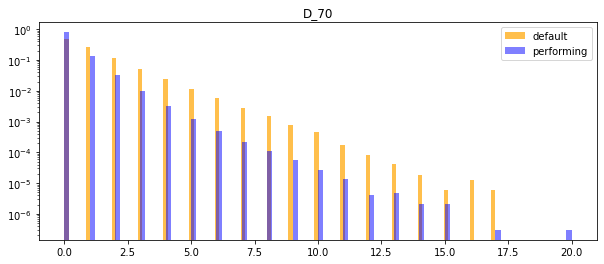

Variable: D_70 has 1.41% missing values
Min value is:  0.0
Max value is:  20.0
Value counts:           D_70
0.0   2734554
1.0    506345
2.0    128646
NaN     49050
3.0     40312
4.0     14404
5.0      5774
6.0      2555
7.0      1176
8.0       616
9.0       311
10.0      164
11.0       75
12.0       27
13.0       23
14.0       10
15.0        8
17.0        2
16.0        2
20.0        1
               D_70  non_missing  mis_%
customer_obs                           
1             26206       259772   9.16
2             12417       270663   4.39
3              2603       276960   0.93
4              1135       275188   0.41
5              1033       272828   0.38
6               934       270440   0.34
7               864       267576   0.32
8               821       264941   0.31
9               791       261980   0.30
10              758       258826   0.29
11              748       255553   0.29
12              372       252999   0.15
13              368       247278   0.15
14          

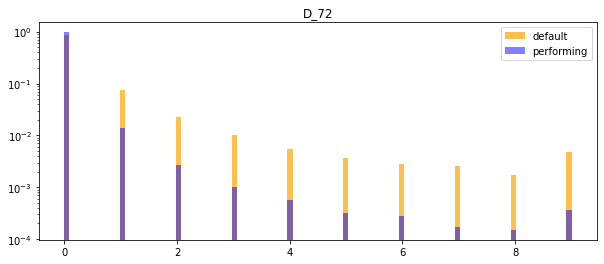

Variable: D_72 has 0.38% missing values
Min value is:  0.0
Max value is:  9.0
Value counts:          D_72
0.0  3385135
1.0    58352
NaN    13340
2.0    12708
3.0     4951
4.0     2792
9.0     2004
5.0     1645
6.0     1357
7.0      990
8.0      781
              D_72  non_missing  mis_%
customer_obs                          
1             6857       279121   2.40
2             1395       281685   0.49
3              545       279018   0.19
4              533       275790   0.19
5              525       273336   0.19
6              519       270855   0.19
7              515       267925   0.19
8              509       265253   0.19
9              537       262234   0.20
10             529       259055   0.20
11             528       255773   0.21
12             173       253198   0.07
13             175       247471   0.07
14               0            1   0.00
#########################################


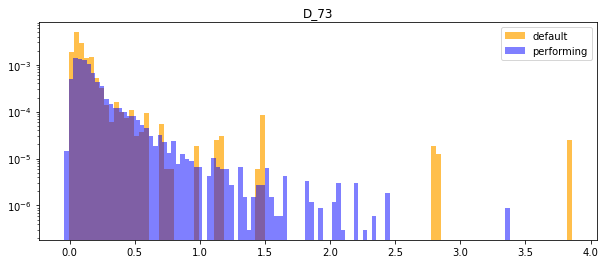

Variable: D_73 has 99.13% missing values
Min value is:  -0.0404
Max value is:  3.8536
Value counts:               D_73
NaN       3453852
0.180391        2
0.071434        2
0.033771        2
0.089514        2
...           ...
0.138692        1
0.141298        1
0.135842        1
0.185137        1
0.198792        1

[30181 rows x 1 columns]
                D_73  non_missing   mis_%
customer_obs                             
1             282194         3784   98.68
2             279107         3973   98.60
3             275803         3760   98.66
4             272809         3514   98.73
5             270674         3187   98.84
6             268564         2810   98.96
7             266011         2429   99.10
8             263669         2093   99.21
9             261120         1651   99.37
10            258310         1274   99.51
11            255430          871   99.66
12            252854          517   99.80
13            247306          340   99.86
14                 1       

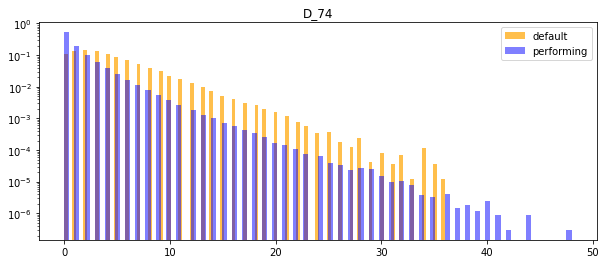

Variable: D_74 has 0.43% missing values
Min value is:  0.0
Max value is:  48.0
Value counts:           D_74
0.0   1769198
1.0    649095
2.0    348706
3.0    223919
4.0    146723
...       ...
39.0        4
41.0        3
44.0        3
42.0        1
48.0        1

[46 rows x 1 columns]
              D_74  non_missing  mis_%
customer_obs                          
1             4010       281968   1.40
2             2302       280778   0.81
3             1182       278381   0.42
4              965       275358   0.35
5              921       272940   0.34
6              896       270478   0.33
7              879       267561   0.33
8              847       264915   0.32
9              792       261979   0.30
10             758       258826   0.29
11             748       255553   0.29
12             372       252999   0.15
13             368       247278   0.15
14               0            1   0.00
#########################################


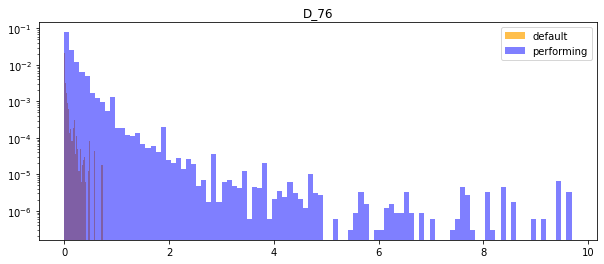

Variable: D_76 has 86.92% missing values
Min value is:  0.0
Max value is:  9.6834
Value counts:               D_76
NaN       3028351
0.192200        3
0.063762        3
0.192485        3
0.023280        3
...           ...
0.006823        1
0.006424        1
0.008490        1
0.009120        1
0.014968        1

[453830 rows x 1 columns]
                D_76  non_missing   mis_%
customer_obs                             
1             249322        36656   87.18
2             246527        36553   87.09
3             243344        36219   87.04
4             240474        35849   87.03
5             238179        35682   86.97
6             235856        35518   86.91
7             233266        35174   86.90
8             230886        34876   86.88
9             228246        34525   86.86
10            225350        34234   86.81
11            222323        33978   86.74
12            219700        33671   86.71
13            214877        32769   86.77
14                 1          

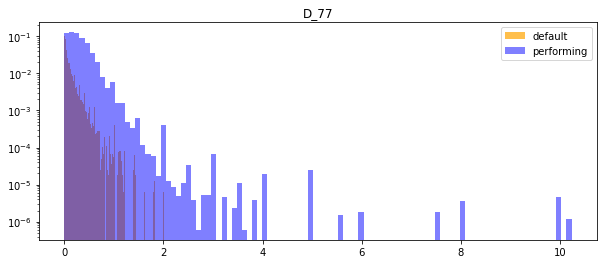

Variable: D_77 has 40.98% missing values
Min value is:  0.0
Max value is:  10.2292
Value counts:               D_77
NaN       1427848
0.500264        6
0.503025        6
0.504499        5
0.501687        5
...           ...
0.796698        1
0.108268        1
0.276262        1
0.278848        1
0.077725        1

[1965747 rows x 1 columns]
                D_77  non_missing  mis_%
customer_obs                            
1             110962       175016  38.80
2             113500       169580  40.09
3             115153       164410  41.19
4             114913       161410  41.59
5             113808       160053  41.56
6             112494       158880  41.45
7             110959       157481  41.33
8             109421       156341  41.17
9             108181       154590  41.17
10            107269       152315  41.32
11            105825       150476  41.29
12            104097       149274  41.08
13            101266       146380  40.89
14                 0            1   0.00
##

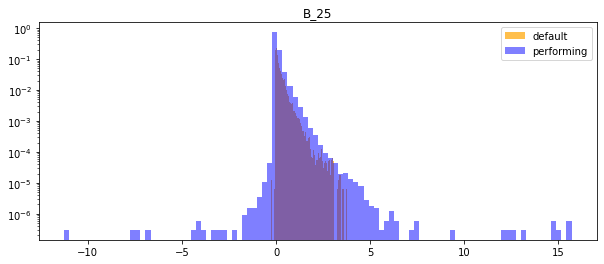

Variable: B_25 has 0.15% missing values
Min value is:  -11.2536
Max value is:  15.6998
Value counts:            B_25
NaN       5171
0.009652     5
0.009168     4
0.006624     4
0.007930     4
...        ...
0.006035     1
0.001946     1
0.006029     1
0.003440     1
0.002918     1

[3379815 rows x 1 columns]
              B_25  non_missing  mis_%
customer_obs                          
1              465       285513   0.16
2              458       282622   0.16
3              453       279110   0.16
4              443       275880   0.16
5              449       273412   0.16
6              796       270578   0.29
7              452       267988   0.17
8              437       265325   0.16
9              398       262373   0.15
10             393       259191   0.15
11             424       255877   0.17
12               3       253368   0.00
13               0       247646   0.00
14               0            1   0.00
#########################################


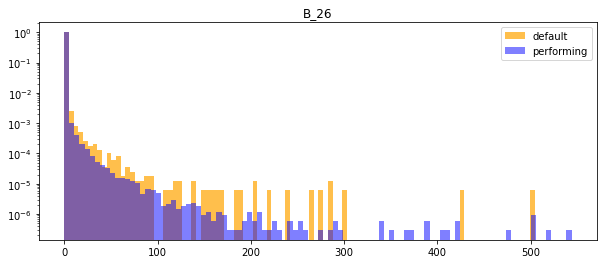

Variable: B_26 has 0.03% missing values
Min value is:  0.0
Max value is:  543.8177
Value counts:            B_26
NaN       1119
0.008562     6
0.008968     6
0.009283     5
0.007986     5
...        ...
0.006525     1
0.001528     1
0.003755     1
0.209915     1
0.000045     1

[3243470 rows x 1 columns]
              B_26  non_missing  mis_%
customer_obs                          
1             1119       284859   0.39
2                0       283080   0.00
3                0       279563   0.00
4                0       276323   0.00
5                0       273861   0.00
6                0       271374   0.00
7                0       268440   0.00
8                0       265762   0.00
9                0       262771   0.00
10               0       259584   0.00
11               0       256301   0.00
12               0       253371   0.00
13               0       247646   0.00
14               0            1   0.00
#########################################


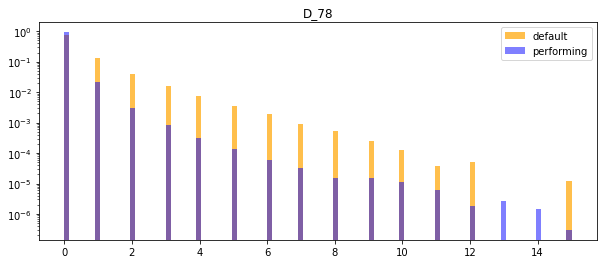

Variable: D_78 has 4.99% missing values
Min value is:  0.0
Max value is:  15.0
Value counts:           D_78
0.0   3192666
NaN    174027
1.0     90975
2.0     16581
3.0      5422
4.0      2235
5.0      1049
6.0       495
7.0       263
8.0       136
9.0        90
10.0       58
11.0       27
12.0       14
13.0        9
14.0        5
15.0        3
               D_78  non_missing  mis_%
customer_obs                           
1             21758       264220   7.61
2             14907       268173   5.27
3             13351       266212   4.78
4             13029       263294   4.72
5             12901       260960   4.71
6             12824       258550   4.73
7             12655       255785   4.71
8             12476       253286   4.69
9             12374       250397   4.71
10            12214       247370   4.71
11            12109       244192   4.72
12            11700       241671   4.62
13            11729       235917   4.74
14                0            1   0.00
##############

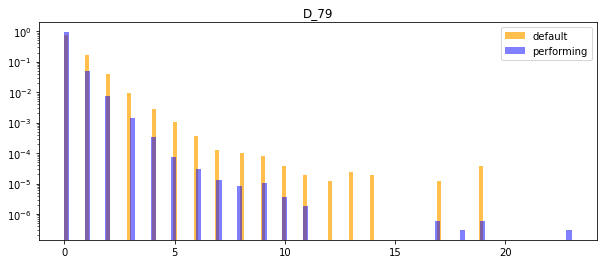

Variable: D_79 has 1.19% missing values
Min value is:  0.0
Max value is:  23.0
Value counts:           D_79
0.0   3211586
1.0    190935
NaN     41382
2.0     31634
3.0      6190
4.0      1555
5.0       408
6.0       159
7.0        65
9.0        47
8.0        44
10.0       18
11.0        9
19.0        8
13.0        4
17.0        4
14.0        3
12.0        2
18.0        1
23.0        1
               D_79  non_missing  mis_%
customer_obs                           
1             24348       261630   8.51
2              4142       278938   1.46
3              1549       278014   0.55
4              1688       274635   0.61
5              1398       272463   0.51
6              1293       270081   0.48
7              1339       267101   0.50
8              1311       264451   0.49
9              1118       261653   0.43
10             1046       258538   0.40
11             1008       255293   0.39
12              589       252782   0.23
13              553       247093   0.22
14          

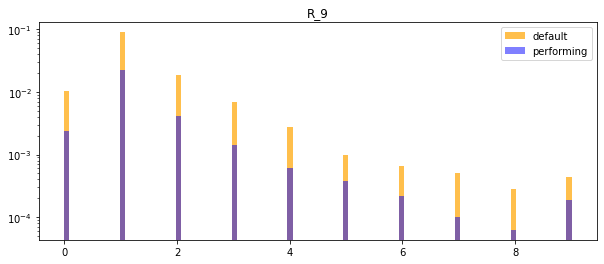

Variable: R_9 has 96.38% missing values
Min value is:  0.0
Max value is:  9.0
Value counts:           R_9
NaN  3357969
1.0    87759
2.0    16649
0.0     9662
3.0     5914
4.0     2496
5.0     1412
6.0      829
9.0      700
7.0      412
8.0      253
                 R_9  non_missing   mis_%
customer_obs                             
1             274633        11345   96.03
2             271281        11799   95.83
3             268029        11534   95.87
4             265057        11266   95.92
5             263093        10768   96.07
6             261716         9658   96.44
7             259061         9379   96.51
8             256584         9178   96.55
9             253948         8823   96.64
10            251056         8528   96.71
11            248118         8183   96.81
12            245410         7961   96.86
13            239982         7664   96.91
14                 1            0  100.00
#########################################


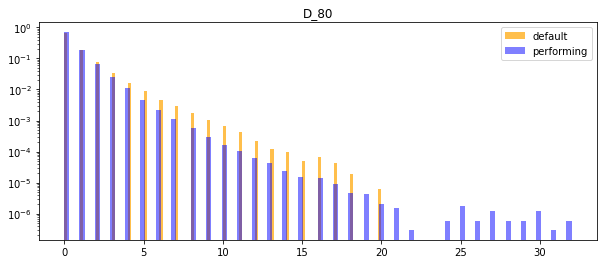

Variable: D_80 has 0.43% missing values
Min value is:  0.0
Max value is:  32.0
Value counts:           D_80
0.0   2422894
1.0    652213
2.0    230472
3.0     89953
4.0     38510
...       ...
28.0        2
32.0        2
26.0        2
22.0        1
31.0        1

[33 rows x 1 columns]
              D_80  non_missing  mis_%
customer_obs                          
1             4010       281968   1.40
2             2302       280778   0.81
3             1182       278381   0.42
4              965       275358   0.35
5              921       272940   0.34
6              896       270478   0.33
7              879       267561   0.33
8              847       264915   0.32
9              792       261979   0.30
10             758       258826   0.29
11             748       255553   0.29
12             372       252999   0.15
13             368       247278   0.15
14               0            1   0.00
#########################################


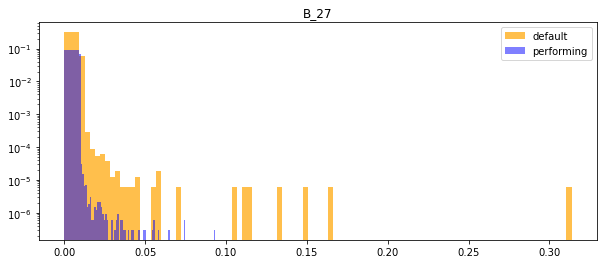

Variable: B_27 has 0.03% missing values
Min value is:  0.0
Max value is:  0.3137
Value counts:            B_27
NaN       1119
0.009453     6
0.008916     6
0.008596     5
0.009539     5
...        ...
0.007619     1
0.009858     1
0.007585     1
0.000479     1
0.002365     1

[3232526 rows x 1 columns]
              B_27  non_missing  mis_%
customer_obs                          
1             1119       284859   0.39
2                0       283080   0.00
3                0       279563   0.00
4                0       276323   0.00
5                0       273861   0.00
6                0       271374   0.00
7                0       268440   0.00
8                0       265762   0.00
9                0       262771   0.00
10               0       259584   0.00
11               0       256301   0.00
12               0       253371   0.00
13               0       247646   0.00
14               0            1   0.00
#########################################


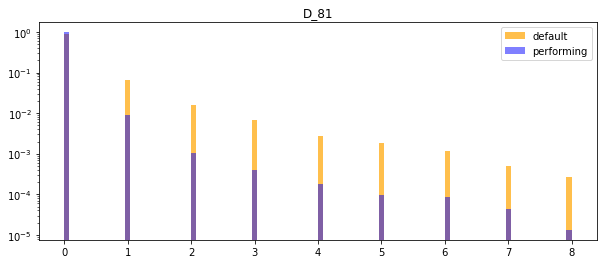

Variable: D_81 has 0.4% missing values
Min value is:  0.0
Max value is:  8.0
Value counts:          D_81
0.0  3418439
1.0    40859
NaN    13940
2.0     5913
3.0     2444
4.0     1040
5.0      628
6.0      477
7.0      227
8.0       88
              D_81  non_missing  mis_%
customer_obs                          
1             8271       277707   2.89
2             1637       281443   0.58
3              368       279195   0.13
4              353       275970   0.13
5              347       273514   0.13
6              340       271034   0.13
7              336       268104   0.13
8              415       265347   0.16
9              515       262256   0.20
10             506       259078   0.19
11             505       255796   0.20
12             172       253199   0.07
13             175       247471   0.07
14               0            1   0.00
#########################################


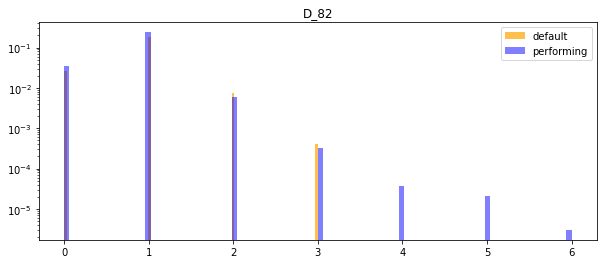

Variable: D_82 has 72.17% missing values
Min value is:  0.0
Max value is:  6.0
Value counts:          D_82
NaN  2514404
1.0   827606
0.0   119424
2.0    21270
3.0     1150
4.0      122
5.0       69
6.0       10
                D_82  non_missing  mis_%
customer_obs                            
1             207914        78064  72.70
2             205609        77471  72.63
3             202272        77291  72.35
4             199469        76854  72.19
5             197714        76147  72.20
6             195422        75952  72.01
7             192978        75462  71.89
8             191517        74245  72.06
9             189436        73335  72.09
10            187105        72479  72.08
11            184519        71782  71.99
12            182322        71049  71.96
13            178127        69519  71.93
14                 0            1   0.00
#########################################


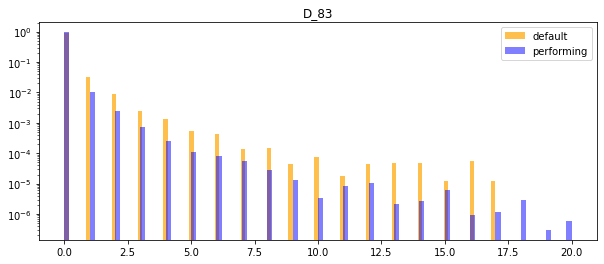

Variable: D_83 has 2.82% missing values
Min value is:  0.0
Max value is:  20.0
Value counts:           D_83
0.0   3330313
NaN     98358
1.0     40581
2.0      9646
3.0      2742
...       ...
16.0       12
18.0       10
17.0        6
20.0        2
19.0        1

[22 rows x 1 columns]
               D_83  non_missing  mis_%
customer_obs                           
1             38456       247522  13.45
2             30842       252238  10.90
3             12600       266963   4.51
4              5925       270398   2.14
5              1957       271904   0.71
6              1349       270025   0.50
7              1311       267129   0.49
8              1237       264525   0.47
9              1179       261592   0.45
10             1142       258442   0.44
11             1090       255211   0.43
12              694       252677   0.27
13              576       247070   0.23
14                0            1   0.00
#########################################


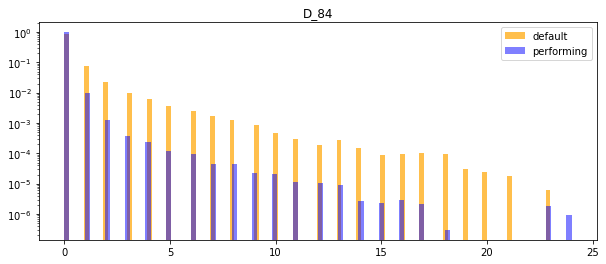

Variable: D_84 has 0.48% missing values
Min value is:  0.0
Max value is:  24.0
Value counts:           D_84
0.0   3407649
1.0     43960
NaN     16590
2.0      7954
3.0      2882
...       ...
23.0        7
19.0        5
20.0        4
24.0        3
21.0        3

[25 rows x 1 columns]
              D_84  non_missing  mis_%
customer_obs                          
1             9096       276882   3.18
2             2020       281060   0.71
3              624       278939   0.22
4              579       275744   0.21
5              586       273275   0.21
6              564       270810   0.21
7              551       267889   0.21
8              560       265202   0.21
9              564       262207   0.21
10             538       259046   0.21
11             542       255759   0.21
12             186       253185   0.07
13             180       247466   0.07
14               0            1   0.00
#########################################


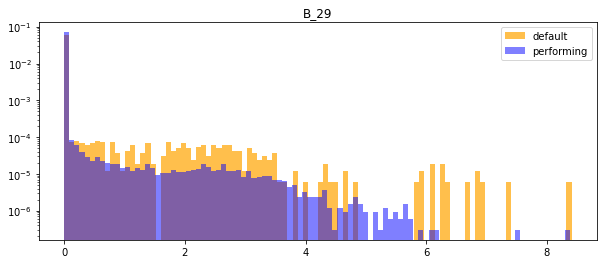

Variable: B_29 has 92.9% missing values
Min value is:  0.0
Max value is:  8.4114
Value counts:               B_29
NaN       3236604
0.008463        3
0.009290        3
0.008463        3
0.008450        3
...           ...
0.008593        1
0.007778        1
0.006128        1
0.005832        1
0.005344        1

[246119 rows x 1 columns]
                B_29  non_missing   mis_%
customer_obs                             
1             264202        21776   92.39
2             260874        22206   92.16
3             257554        22009   92.13
4             254725        21598   92.18
5             252402        21459   92.16
6             250037        21337   92.14
7             247779        20661   92.30
8             247672        18090   93.19
9             244485        18286   93.04
10            241841        17743   93.16
11            240642        15659   93.89
12            238966        14405   94.31
13            235424        12222   95.06
14                 1           

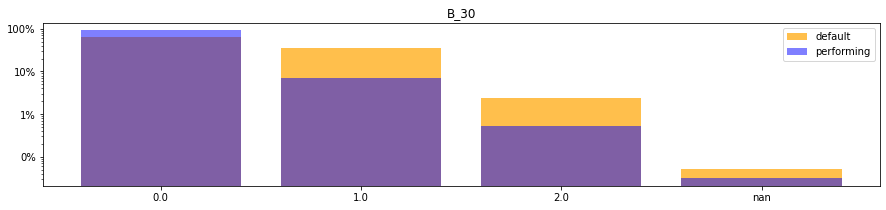

Variable: B_30 has 0.03% missing values
Min value is:  0.0
Max value is:  2.0
Value counts:          B_30
0.0  3177803
1.0   284058
2.0    21075
NaN     1119
              B_30  non_missing  mis_%
customer_obs                          
1             1119       284859   0.39
2                0       283080   0.00
3                0       279563   0.00
4                0       276323   0.00
5                0       273861   0.00
6                0       271374   0.00
7                0       268440   0.00
8                0       265762   0.00
9                0       262771   0.00
10               0       259584   0.00
11               0       256301   0.00
12               0       253371   0.00
13               0       247646   0.00
14               0            1   0.00
#########################################


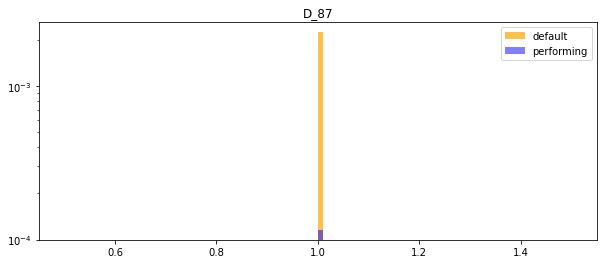

Variable: D_87 has 99.98% missing values
Min value is:  1.0
Max value is:  1.0
Value counts:          D_87
NaN  3483307
1.0      748
                D_87  non_missing   mis_%
customer_obs                             
1             285935           43   99.98
2             283034           46   99.98
3             279514           49   99.98
4             276273           50   99.98
5             273804           57   99.98
6             271317           57   99.98
7             268384           56   99.98
8             265702           60   99.98
9             262710           61   99.98
10            259523           61   99.98
11            256240           61   99.98
12            253301           70   99.97
13            247569           77   99.97
14                 1            0  100.00
#########################################


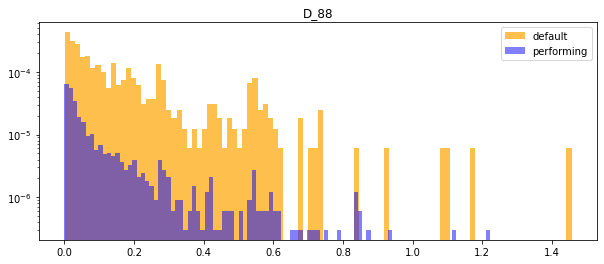

Variable: D_88 has 99.96% missing values
Min value is:  -0.0
Max value is:  1.456
Value counts:               D_88
NaN       3482545
0.052482        1
0.144400        1
0.247692        1
0.007003        1
...           ...
0.372641        1
0.080182        1
0.049597        1
0.142270        1
0.370895        1

[1511 rows x 1 columns]
                D_88  non_missing   mis_%
customer_obs                             
1             285883           95   99.97
2             282985           95   99.97
3             279464           99   99.96
4             276206          117   99.96
5             273725          136   99.95
6             271225          149   99.95
7             268302          138   99.95
8             265642          120   99.95
9             262663          108   99.96
10            259479          105   99.96
11            256194          107   99.96
12            253256          115   99.95
13            247520          126   99.95
14                 1            

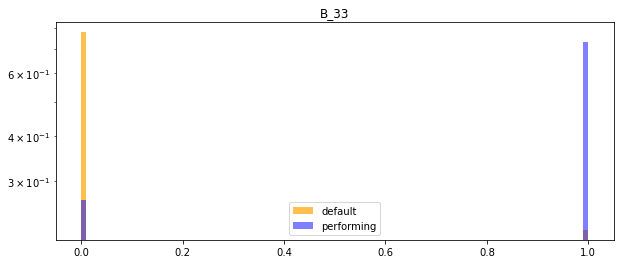

Variable: B_33 has 0.03% missing values
Min value is:  0.0
Max value is:  1.0
Value counts:          B_33
1.0  2474536
0.0  1008400
NaN     1119
              B_33  non_missing  mis_%
customer_obs                          
1             1119       284859   0.39
2                0       283080   0.00
3                0       279563   0.00
4                0       276323   0.00
5                0       273861   0.00
6                0       271374   0.00
7                0       268440   0.00
8                0       265762   0.00
9                0       262771   0.00
10               0       259584   0.00
11               0       256301   0.00
12               0       253371   0.00
13               0       247646   0.00
14               0            1   0.00
#########################################


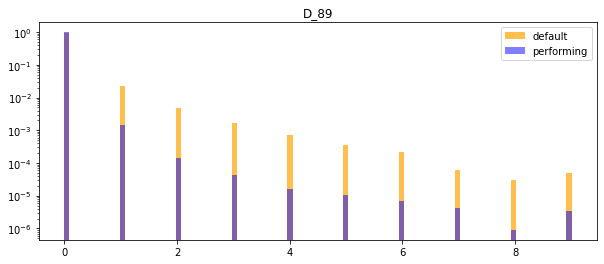

Variable: D_89 has 0.48% missing values
Min value is:  0.0
Max value is:  9.0
Value counts:          D_89
0.0  3456943
NaN    16590
1.0     8505
2.0     1235
3.0      413
4.0      166
5.0       93
6.0       59
7.0       24
9.0       19
8.0        8
              D_89  non_missing  mis_%
customer_obs                          
1             9096       276882   3.18
2             2020       281060   0.71
3              624       278939   0.22
4              579       275744   0.21
5              586       273275   0.21
6              564       270810   0.21
7              551       267889   0.21
8              560       265202   0.21
9              564       262207   0.21
10             538       259046   0.21
11             542       255759   0.21
12             186       253185   0.07
13             180       247466   0.07
14               0            1   0.00
#########################################


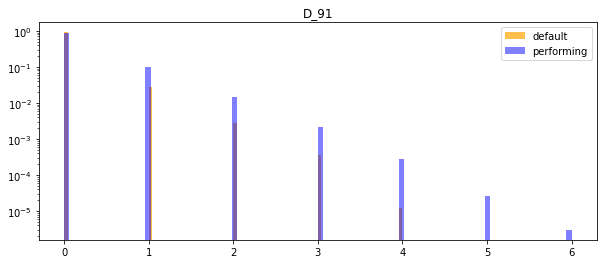

Variable: D_91 has 2.18% missing values
Min value is:  0.0
Max value is:  6.0
Value counts:          D_91
0.0  3014202
1.0   335758
NaN    75790
2.0    50055
3.0     7248
4.0      903
5.0       89
6.0       10
               D_91  non_missing  mis_%
customer_obs                           
1             31991       253987  11.19
2             24773       258307   8.75
3             12817       266746   4.58
4              3273       273050   1.18
5              1015       272846   0.37
6               338       271036   0.12
7               328       268112   0.12
8               320       265442   0.12
9               312       262459   0.12
10              311       259273   0.12
11              308       255993   0.12
12                2       253369   0.00
13                2       247644   0.00
14                0            1   0.00
#########################################


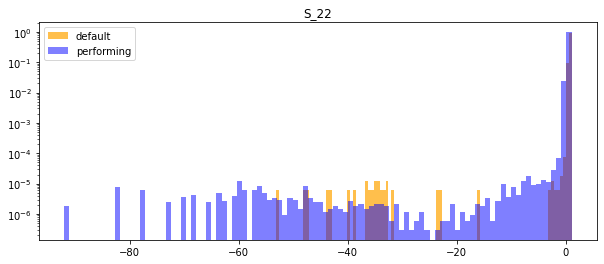

Variable: S_22 has 0.39% missing values
Min value is:  -91.9982
Max value is:  1.0327
Value counts:             S_22
NaN       13552
0.301171     13
0.295395     13
0.302857     13
0.962315     12
...         ...
0.985018      1
0.892376      1
0.925749      1
0.303172      1
0.295251      1

[1853222 rows x 1 columns]
              S_22  non_missing  mis_%
customer_obs                          
1             1349       284629   0.47
2              849       282231   0.30
3              785       278778   0.28
4              845       275478   0.31
5              922       272939   0.34
6             1421       269953   0.52
7             1015       267425   0.38
8             1034       264728   0.39
9             1064       261707   0.40
10            1105       258479   0.43
11            1080       255221   0.42
12            1001       252370   0.40
13            1082       246564   0.44
14               0            1   0.00
#########################################


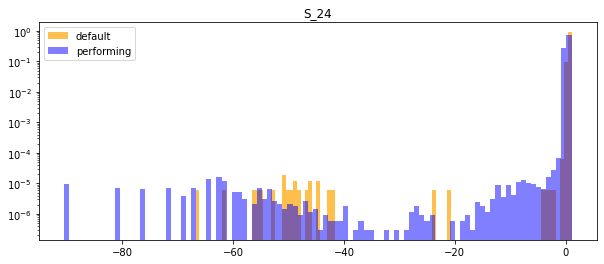

Variable: S_24 has 0.38% missing values
Min value is:  -90.4838
Max value is:  1.0556
Value counts:             S_24
NaN       13242
0.969752     12
0.963107     12
0.975013     12
0.957352     12
...         ...
0.811139      1
0.898765      1
0.051290      1
0.083564      1
0.886145      1

[2182306 rows x 1 columns]
              S_24  non_missing  mis_%
customer_obs                          
1             1315       284663   0.46
2              823       282257   0.29
3              749       278814   0.27
4              810       275513   0.29
5              897       272964   0.33
6             1401       269973   0.52
7              999       267441   0.37
8             1009       264753   0.38
9             1041       261730   0.40
10            1087       258497   0.42
11            1063       255238   0.41
12             983       252388   0.39
13            1065       246581   0.43
14               0            1   0.00
#########################################


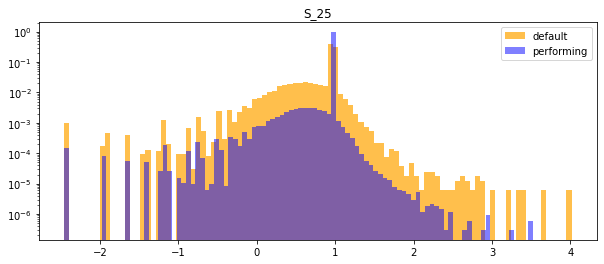

Variable: S_25 has 0.13% missing values
Min value is:  -2.4534
Max value is:  4.0146
Value counts:            S_25
NaN       4401
0.975856    41
0.970950    41
0.970757    40
0.977302    40
...        ...
0.531207     1
0.576643     1
0.696981     1
0.703291     1
0.014824     1

[359407 rows x 1 columns]
              S_25  non_missing  mis_%
customer_obs                          
1              373       285605   0.13
2              355       282725   0.13
3              312       279251   0.11
4              322       276001   0.12
5              331       273530   0.12
6              343       271031   0.13
7              324       268116   0.12
8              338       265424   0.13
9              322       262449   0.12
10             334       259250   0.13
11             351       255950   0.14
12             345       253026   0.14
13             351       247295   0.14
14               0            1   0.00
#########################################


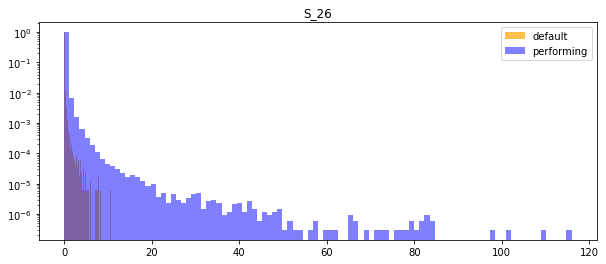

Variable: S_26 has 0.01% missing values
Min value is:  0.0
Max value is:  115.9207
Value counts:            S_26
NaN        466
0.007832     5
0.008633     5
0.009192     5
0.009333     5
...        ...
0.000735     1
0.009260     1
0.001215     1
0.001831     1
0.001877     1

[3337149 rows x 1 columns]
              S_26  non_missing  mis_%
customer_obs                          
1                1       285977   0.00
2                1       283079   0.00
3                3       279560   0.00
4                3       276320   0.00
5               11       273850   0.00
6              366       271008   0.13
7               26       268414   0.01
8               17       265745   0.01
9                2       262769   0.00
10               0       259584   0.00
11              33       256268   0.01
12               3       253368   0.00
13               0       247646   0.00
14               0            1   0.00
#########################################


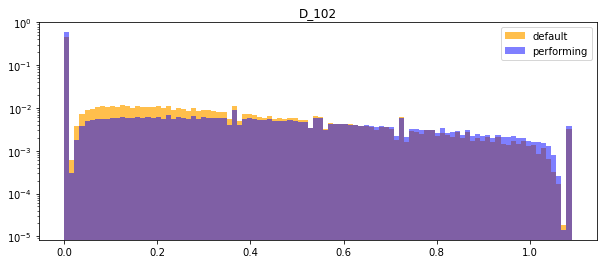

Variable: D_102 has 0.61% missing values
Min value is:  0.0
Max value is:  1.09
Value counts:            D_102
NaN       21231
0.548131      5
0.544011      5
1.080924      5
0.009362      5
...         ...
0.003541      1
0.007426      1
0.000043      1
0.008445      1
0.003459      1

[3335098 rows x 1 columns]
              D_102  non_missing  mis_%
customer_obs                           
1             14843       271135   5.19
2              2488       280592   0.88
3               150       279413   0.05
4               112       276211   0.04
5               827       273034   0.30
6               786       270588   0.29
7               839       267601   0.31
8               823       264939   0.31
9               363       262408   0.14
10                0       259584   0.00
11                0       256301   0.00
12                0       253371   0.00
13                0       247646   0.00
14                0            1   0.00
#########################################


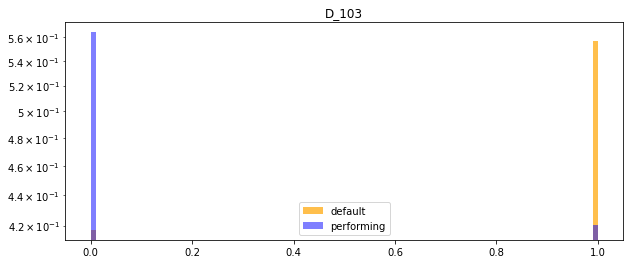

Variable: D_103 has 1.63% missing values
Min value is:  0.0
Max value is:  1.0
Value counts:         D_103
0.0  1941327
1.0  1486107
NaN    56621
              D_103  non_missing  mis_%
customer_obs                           
1             24490       261488   8.56
2              4264       278816   1.51
3              8757       270806   3.13
4              2043       274280   0.74
5              1503       272358   0.55
6              1438       269936   0.53
7              1388       267052   0.52
8              1404       264358   0.53
9              1176       261595   0.45
10             1105       258479   0.43
11             7810       248491   3.05
12              676       252695   0.27
13              567       247079   0.23
14                0            1   0.00
#########################################


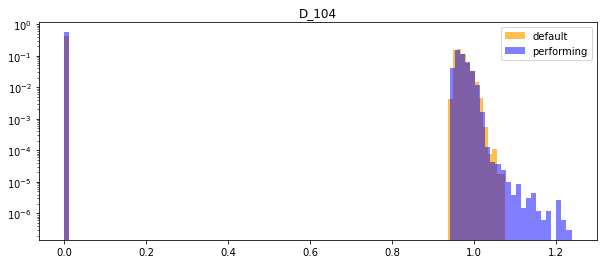

Variable: D_104 has 1.63% missing values
Min value is:  0.0
Max value is:  1.2373
Value counts:            D_104
NaN       56621
0.967117     14
0.954802     12
0.959019     12
0.955095     12
...         ...
0.009786      1
0.006108      1
0.009168      1
0.004670      1
0.001599      1

[2572316 rows x 1 columns]
              D_104  non_missing  mis_%
customer_obs                           
1             24490       261488   8.56
2              4264       278816   1.51
3              8757       270806   3.13
4              2043       274280   0.74
5              1503       272358   0.55
6              1438       269936   0.53
7              1388       267052   0.52
8              1404       264358   0.53
9              1176       261595   0.45
10             1105       258479   0.43
11             7810       248491   3.05
12              676       252695   0.27
13              567       247079   0.23
14                0            1   0.00
#########################################


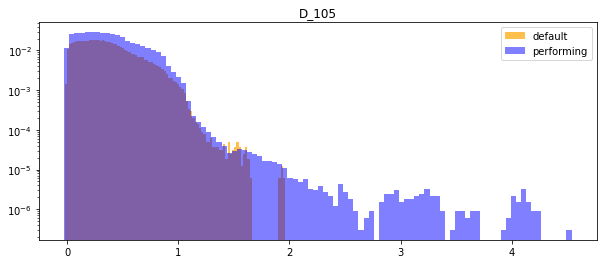

Variable: D_105 has 57.35% missing values
Min value is:  -0.0258
Max value is:  4.5384
Value counts:              D_105
NaN       1997962
0.822594        4
0.376979        4
0.396343        4
0.718125        4
...           ...
0.459420        1
0.455160        1
0.430379        1
0.411163        1
0.117951        1

[1451890 rows x 1 columns]
               D_105  non_missing   mis_%
customer_obs                             
1             172957       113021   60.48
2             162330       120750   57.34
3             162242       117321   58.03
4             157540       118783   57.01
5             155746       118115   56.87
6             154207       117167   56.82
7             152457       115983   56.79
8             150846       114916   56.76
9             149094       113677   56.74
10            147362       112222   56.77
11            148579       107722   57.97
12            143802       109569   56.76
13            140799       106847   56.85
14                 1    

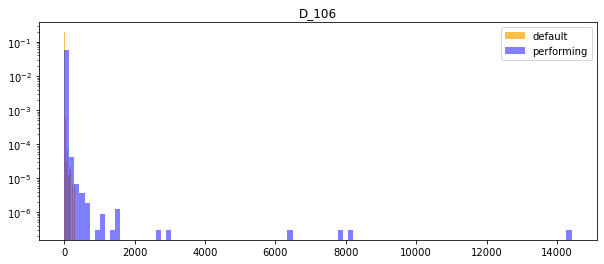

Variable: D_106 has 93.42% missing values
Min value is:  0.0
Max value is:  14417.0
Value counts:           D_106
NaN    3254765
0.0      35536
2.0      34915
3.0      29933
1.0      25691
...        ...
484.0        1
280.0        1
218.0        1
228.0        1
360.0        1

[260 rows x 1 columns]
               D_106  non_missing   mis_%
customer_obs                             
1             269642        16336   94.29
2             265242        17838   93.70
3             262078        17485   93.75
4             258461        17862   93.54
5             255906        17955   93.44
6             253362        18012   93.36
7             250552        17888   93.34
8             247873        17889   93.27
9             244864        17907   93.19
10            241721        17863   93.12
11            239107        17194   93.29
12            235679        17692   93.02
13            230277        17369   92.99
14                 1            0  100.00
#########################

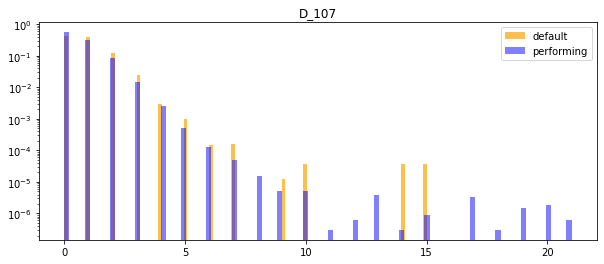

Variable: D_107 has 1.63% missing values
Min value is:  0.0
Max value is:  21.0
Value counts:          D_107
0.0   1941327
1.0   1125257
2.0    297129
NaN     56621
3.0     51980
...       ...
19.0        5
12.0        2
21.0        2
11.0        1
18.0        1

[22 rows x 1 columns]
              D_107  non_missing  mis_%
customer_obs                           
1             24490       261488   8.56
2              4264       278816   1.51
3              8757       270806   3.13
4              2043       274280   0.74
5              1503       272358   0.55
6              1438       269936   0.53
7              1388       267052   0.52
8              1404       264358   0.53
9              1176       261595   0.45
10             1105       258479   0.43
11             7810       248491   3.05
12              676       252695   0.27
13              567       247079   0.23
14                0            1   0.00
#########################################


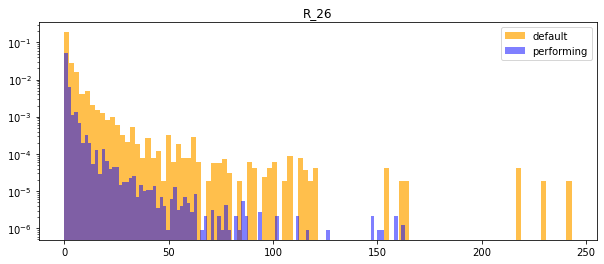

Variable: R_26 has 92.92% missing values
Min value is:  0.0
Max value is:  243.0
Value counts:            R_26
NaN    3237529
0.0     150244
1.0      43172
2.0      20548
3.0       9249
...        ...
69.0         3
164.0        3
151.0        3
118.0        3
163.0        1

[106 rows x 1 columns]
                R_26  non_missing   mis_%
customer_obs                             
1             266373        19605   93.14
2             263433        19647   93.06
3             259884        19679   92.96
4             256320        20003   92.76
5             253880        19981   92.70
6             251688        19686   92.75
7             248793        19647   92.68
8             246475        19287   92.74
9             243973        18798   92.85
10            241268        18316   92.94
11            238527        17774   93.07
12            235974        17397   93.13
13            230940        16706   93.25
14                 1            0  100.00
############################

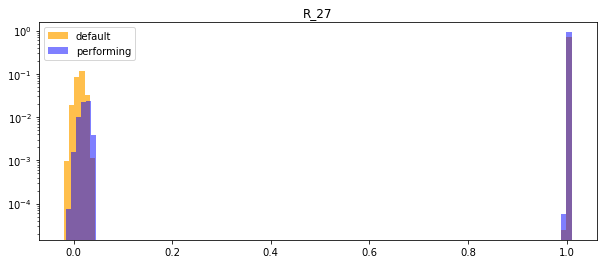

Variable: R_27 has 2.11% missing values
Min value is:  -0.0188
Max value is:  1.01
Value counts:             R_27
NaN       73539
1.007370     64
1.000457     64
1.001078     63
1.008257     63
...         ...
0.028943      1
0.026905      1
0.031290      1
0.026272      1
0.034522      1

[328977 rows x 1 columns]
               R_27  non_missing  mis_%
customer_obs                           
1             15368       270610   5.37
2             12537       270543   4.43
3              9082       270481   3.25
4              6236       270087   2.26
5              4225       269636   1.54
6              4018       267356   1.48
7              3717       264723   1.38
8              3346       262416   1.26
9              3268       259503   1.24
10             3200       256384   1.23
11             3150       253151   1.23
12             2725       250646   1.08
13             2667       244979   1.08
14                0            1   0.00
#########################################


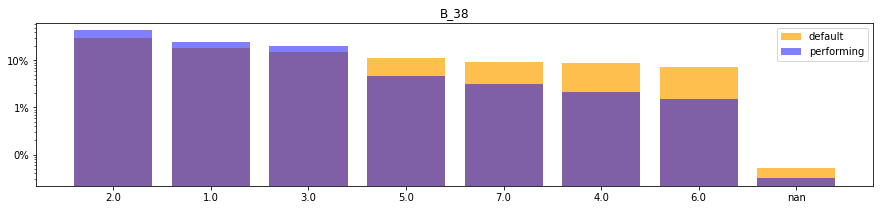

Variable: B_38 has 0.03% missing values
Min value is:  1.0
Max value is:  7.0
Value counts:          B_38
2.0  1475998
1.0   820153
3.0   723639
5.0   186717
7.0   118965
4.0    96147
6.0    61317
NaN     1119
              B_38  non_missing  mis_%
customer_obs                          
1             1119       284859   0.39
2                0       283080   0.00
3                0       279563   0.00
4                0       276323   0.00
5                0       273861   0.00
6                0       271374   0.00
7                0       268440   0.00
8                0       265762   0.00
9                0       262771   0.00
10               0       259584   0.00
11               0       256301   0.00
12               0       253371   0.00
13               0       247646   0.00
14               0            1   0.00
#########################################


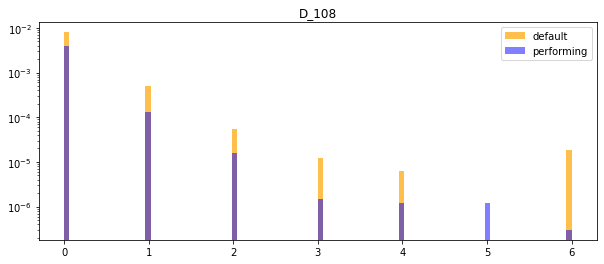

Variable: D_108 has 99.58% missing values
Min value is:  0.0
Max value is:  6.0
Value counts:         D_108
NaN  3469383
0.0    14067
1.0      522
2.0       63
3.0        7
4.0        5
5.0        4
6.0        4
               D_108  non_missing   mis_%
customer_obs                             
1             284793         1185   99.59
2             281826         1254   99.56
3             278492         1071   99.62
4             275000         1323   99.52
5             272574         1287   99.53
6             270352         1022   99.62
7             267334         1106   99.59
8             264499         1263   99.52
9             261585         1186   99.55
10            258663          921   99.65
11            255359          942   99.63
12            252357         1014   99.60
13            246548         1098   99.56
14                 1            0  100.00
#########################################


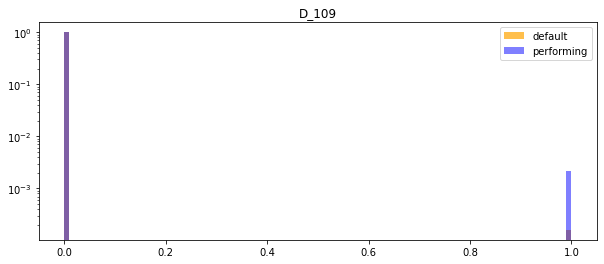

Variable: D_109 has 0.03% missing values
Min value is:  0.0
Max value is:  1.0
Value counts:         D_109
0.0  3475831
1.0     7190
NaN     1034
              D_109  non_missing  mis_%
customer_obs                           
1               569       285409   0.20
2                 1       283079   0.00
3                 3       279560   0.00
4                 3       276320   0.00
5                11       273850   0.00
6               366       271008   0.13
7                26       268414   0.01
8                17       265745   0.01
9                 2       262769   0.00
10                0       259584   0.00
11               33       256268   0.01
12                3       253368   0.00
13                0       247646   0.00
14                0            1   0.00
#########################################


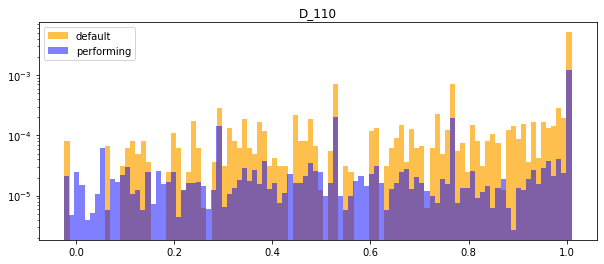

Variable: D_110 has 99.61% missing values
Min value is:  -0.0237
Max value is:  1.01
Value counts:              D_110
NaN       3470635
1.003251        3
1.002062        3
1.001915        3
1.002994        3
...           ...
0.928682        1
0.926884        1
0.930312        1
0.929568        1
0.483782        1

[13269 rows x 1 columns]
               D_110  non_missing   mis_%
customer_obs                             
1             285524          454   99.84
2             282519          561   99.80
3             278898          665   99.76
4             275575          748   99.73
5             273030          831   99.70
6             270427          947   99.65
7             267341         1099   99.59
8             264633         1129   99.58
9             261573         1198   99.54
10            258321         1263   99.51
11            254871         1430   99.44
12            251841         1530   99.40
13            246081         1565   99.37
14                 1        

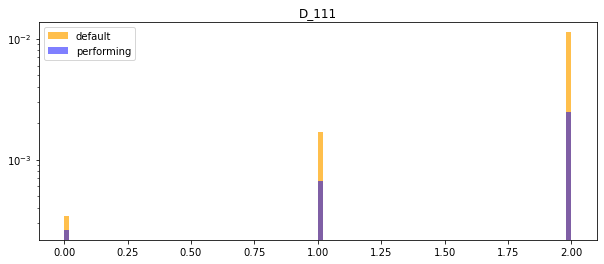

Variable: D_111 has 99.61% missing values
Min value is:  0.0
Max value is:  2.0
Value counts:         D_111
NaN  3470635
2.0    10021
1.0     2474
0.0      925
               D_111  non_missing   mis_%
customer_obs                             
1             285524          454   99.84
2             282519          561   99.80
3             278898          665   99.76
4             275575          748   99.73
5             273030          831   99.70
6             270427          947   99.65
7             267341         1099   99.59
8             264633         1129   99.58
9             261573         1198   99.54
10            258321         1263   99.51
11            254871         1430   99.44
12            251841         1530   99.40
13            246081         1565   99.37
14                 1            0  100.00
#########################################


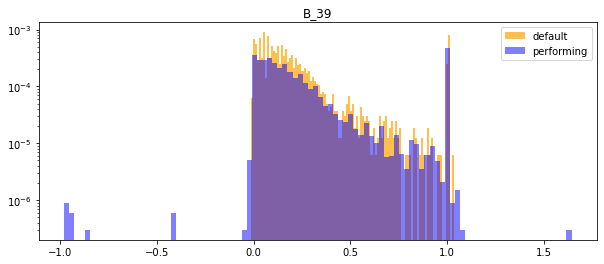

Variable: B_39 has 99.58% missing values
Min value is:  -0.9793
Max value is:  1.6426
Value counts:               B_39
NaN       3469451
1.001097        2
1.006589        2
1.008240        2
1.009296        2
...           ...
0.243695        1
0.268534        1
0.296192        1
0.045635        1
0.182688        1

[14589 rows x 1 columns]
                B_39  non_missing   mis_%
customer_obs                             
1             285521          457   99.84
2             282511          569   99.80
3             278882          681   99.76
4             275547          776   99.72
5             272990          871   99.68
6             270373         1001   99.63
7             267270         1170   99.56
8             264537         1225   99.54
9             261455         1316   99.50
10            258175         1409   99.46
11            254701         1600   99.38
12            251641         1730   99.32
13            245847         1799   99.27
14                 1       

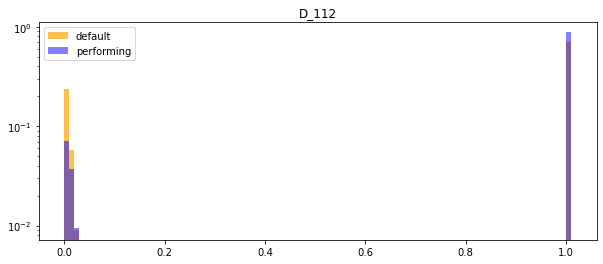

Variable: D_112 has 0.05% missing values
Min value is:  0.0
Max value is:  1.01
Value counts:            D_112
NaN        1585
1.007345     65
1.005664     64
1.000228     64
1.007027     62
...         ...
0.005545      1
0.026425      1
0.017369      1
0.018784      1
0.024867      1

[521978 rows x 1 columns]
              D_112  non_missing  mis_%
customer_obs                           
1              1120       284858   0.39
2                 1       283079   0.00
3                 3       279560   0.00
4                 3       276320   0.00
5                11       273850   0.00
6               366       271008   0.13
7                26       268414   0.01
8                17       265745   0.01
9                 2       262769   0.00
10                0       259584   0.00
11               33       256268   0.01
12                3       253368   0.00
13                0       247646   0.00
14                0            1   0.00
#########################################


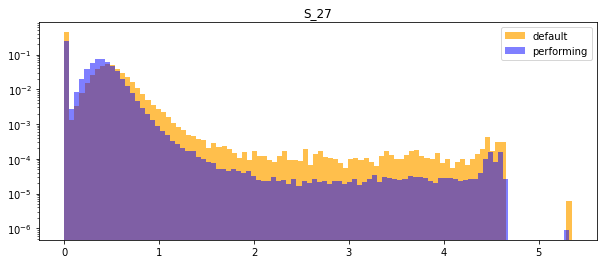

Variable: S_27 has 27.51% missing values
Min value is:  0.0
Max value is:  5.3463
Value counts:              S_27
NaN       958600
0.371657       5
0.372586       5
0.378472       5
0.529926       4
...          ...
0.257816       1
0.334249       1
0.334889       1
0.337930       1
0.000568       1

[2424073 rows x 1 columns]
               S_27  non_missing  mis_%
customer_obs                           
1             93174       192804  32.58
2             77913       205167  27.52
3             74248       205315  26.56
4             73479       202844  26.59
5             73121       200740  26.70
6             73267       198107  27.00
7             72466       195974  27.00
8             71830       193932  27.03
9             70521       192250  26.84
10            69798       189786  26.89
11            70061       186240  27.34
12            69023       184348  27.24
13            69699       177947  28.14
14                0            1   0.00
###############################

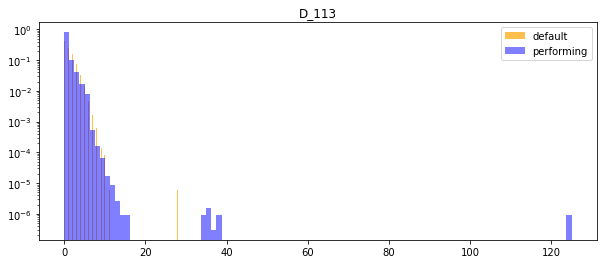

Variable: D_113 has 2.54% missing values
Min value is:  0.0
Max value is:  125.0
Value counts:          D_113
0.0   2065680
1.0    736202
2.0    350799
3.0    151460
NaN     88535
...       ...
38.0        3
15.0        3
37.0        1
35.0        1
28.0        1

[24 rows x 1 columns]
              D_113  non_missing  mis_%
customer_obs                           
1             32324       253654  11.30
2             26699       256381   9.43
3             12869       266694   4.60
4              7015       269308   2.54
5              1941       271920   0.71
6              1321       270053   0.49
7              1269       267171   0.47
8              1188       264574   0.45
9              1122       261649   0.43
10              917       258667   0.35
11              892       255409   0.35
12              510       252861   0.20
13              468       247178   0.19
14                0            1   0.00
#########################################


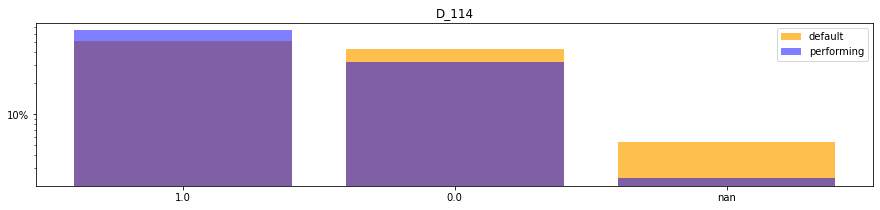

Variable: D_114 has 2.54% missing values
Min value is:  0.0
Max value is:  1.0
Value counts:         D_114
1.0  2245518
0.0  1150002
NaN    88535
              D_114  non_missing  mis_%
customer_obs                           
1             32324       253654  11.30
2             26699       256381   9.43
3             12869       266694   4.60
4              7015       269308   2.54
5              1941       271920   0.71
6              1321       270053   0.49
7              1269       267171   0.47
8              1188       264574   0.45
9              1122       261649   0.43
10              917       258667   0.35
11              892       255409   0.35
12              510       252861   0.20
13              468       247178   0.19
14                0            1   0.00
#########################################


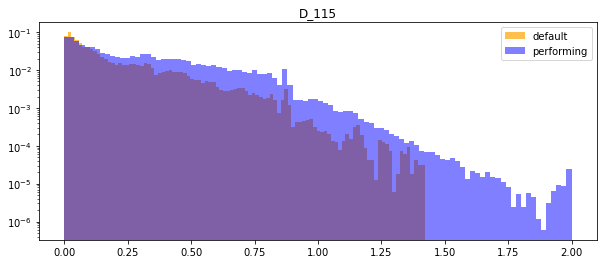

Variable: D_115 has 2.54% missing values
Min value is:  0.0
Max value is:  1.9995
Value counts:            D_115
NaN       88535
0.292821      5
0.268790      4
0.574495      4
0.116480      4
...         ...
0.606944      1
0.608906      1
0.614734      1
0.615489      1
0.037532      1

[3270140 rows x 1 columns]
              D_115  non_missing  mis_%
customer_obs                           
1             32324       253654  11.30
2             26699       256381   9.43
3             12869       266694   4.60
4              7015       269308   2.54
5              1941       271920   0.71
6              1321       270053   0.49
7              1269       267171   0.47
8              1188       264574   0.45
9              1122       261649   0.43
10              917       258667   0.35
11              892       255409   0.35
12              510       252861   0.20
13              468       247178   0.19
14                0            1   0.00
#########################################


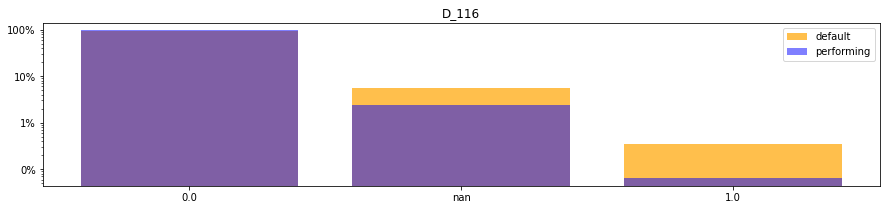

Variable: D_116 has 2.54% missing values
Min value is:  0.0
Max value is:  1.0
Value counts:         D_116
0.0  3392855
NaN    88535
1.0     2665
              D_116  non_missing  mis_%
customer_obs                           
1             32324       253654  11.30
2             26699       256381   9.43
3             12869       266694   4.60
4              7015       269308   2.54
5              1941       271920   0.71
6              1321       270053   0.49
7              1269       267171   0.47
8              1188       264574   0.45
9              1122       261649   0.43
10              917       258667   0.35
11              892       255409   0.35
12              510       252861   0.20
13              468       247178   0.19
14                0            1   0.00
#########################################


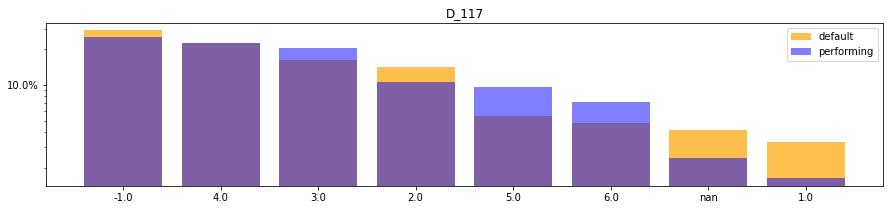

Variable: D_117 has 2.54% missing values
Min value is:  -1.0
Max value is:  6.0
Value counts:         D_117
-1.0  893023
 4.0  777324
 3.0  717488
 2.0  378172
 5.0  324707
 6.0  244041
 NaN   88535
 1.0   60765
              D_117  non_missing  mis_%
customer_obs                           
1             32324       253654  11.30
2             26699       256381   9.43
3             12869       266694   4.60
4              7015       269308   2.54
5              1941       271920   0.71
6              1321       270053   0.49
7              1269       267171   0.47
8              1188       264574   0.45
9              1122       261649   0.43
10              917       258667   0.35
11              892       255409   0.35
12              510       252861   0.20
13              468       247178   0.19
14                0            1   0.00
#########################################


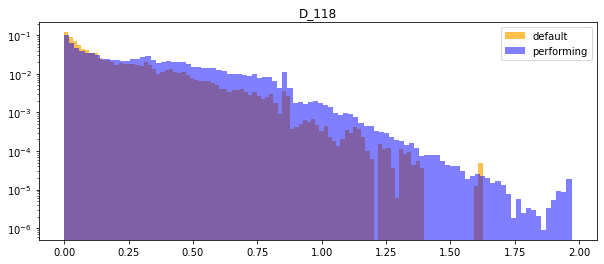

Variable: D_118 has 2.54% missing values
Min value is:  0.0
Max value is:  1.9708
Value counts:            D_118
NaN       88535
0.445337      5
0.280632      5
0.349730      4
0.620995      4
...         ...
0.235343      1
0.237724      1
0.234412      1
0.236092      1
0.037342      1

[3269719 rows x 1 columns]
              D_118  non_missing  mis_%
customer_obs                           
1             32324       253654  11.30
2             26699       256381   9.43
3             12869       266694   4.60
4              7015       269308   2.54
5              1941       271920   0.71
6              1321       270053   0.49
7              1269       267171   0.47
8              1188       264574   0.45
9              1122       261649   0.43
10              917       258667   0.35
11              892       255409   0.35
12              510       252861   0.20
13              468       247178   0.19
14                0            1   0.00
#########################################


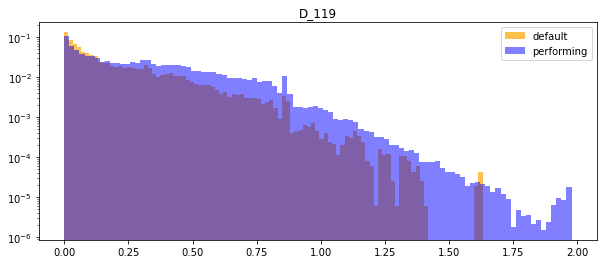

Variable: D_119 has 2.54% missing values
Min value is:  0.0
Max value is:  1.9769
Value counts:            D_119
NaN       88535
0.305925      5
0.530196      4
0.558992      4
0.579932      4
...         ...
0.867499      1
0.867045      1
0.867671      1
0.881066      1
0.033036      1

[3272451 rows x 1 columns]
              D_119  non_missing  mis_%
customer_obs                           
1             32324       253654  11.30
2             26699       256381   9.43
3             12869       266694   4.60
4              7015       269308   2.54
5              1941       271920   0.71
6              1321       270053   0.49
7              1269       267171   0.47
8              1188       264574   0.45
9              1122       261649   0.43
10              917       258667   0.35
11              892       255409   0.35
12              510       252861   0.20
13              468       247178   0.19
14                0            1   0.00
#########################################


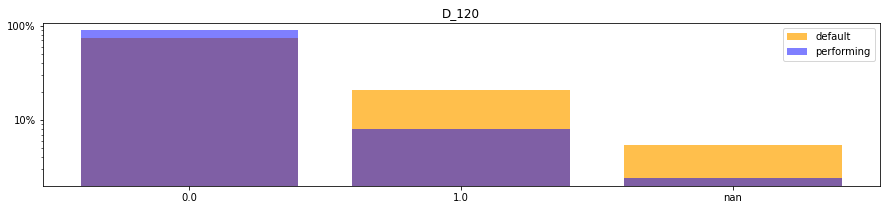

Variable: D_120 has 2.54% missing values
Min value is:  0.0
Max value is:  1.0
Value counts:         D_120
0.0  3096291
1.0   299229
NaN    88535
              D_120  non_missing  mis_%
customer_obs                           
1             32324       253654  11.30
2             26699       256381   9.43
3             12869       266694   4.60
4              7015       269308   2.54
5              1941       271920   0.71
6              1321       270053   0.49
7              1269       267171   0.47
8              1188       264574   0.45
9              1122       261649   0.43
10              917       258667   0.35
11              892       255409   0.35
12              510       252861   0.20
13              468       247178   0.19
14                0            1   0.00
#########################################


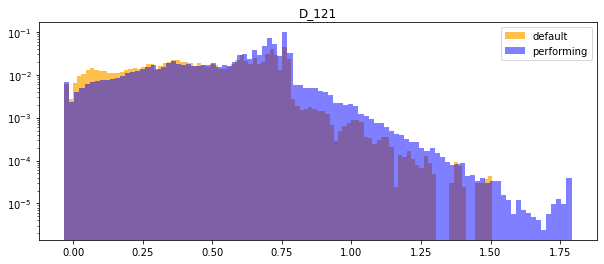

Variable: D_121 has 2.54% missing values
Min value is:  -0.0321
Max value is:  1.7911
Value counts:            D_121
NaN       88535
0.764701     10
0.763359      9
0.755691      9
0.768384      9
...         ...
0.111151      1
0.116664      1
0.122911      1
0.115687      1
0.720331      1

[2886024 rows x 1 columns]
              D_121  non_missing  mis_%
customer_obs                           
1             32324       253654  11.30
2             26699       256381   9.43
3             12869       266694   4.60
4              7015       269308   2.54
5              1941       271920   0.71
6              1321       270053   0.49
7              1269       267171   0.47
8              1188       264574   0.45
9              1122       261649   0.43
10              917       258667   0.35
11              892       255409   0.35
12              510       252861   0.20
13              468       247178   0.19
14                0            1   0.00
#######################################

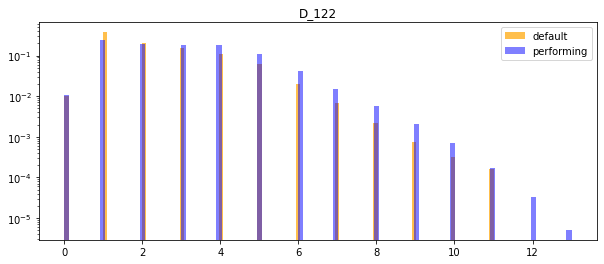

Variable: D_122 has 2.54% missing values
Min value is:  0.0
Max value is:  13.0
Value counts:         D_122
1.0   845150
2.0   661407
3.0   640401
4.0   610656
5.0   373575
6.0   145475
NaN    88535
7.0    52055
0.0    37043
8.0    19401
9.0     7190
10.0    2436
11.0     607
12.0     107
13.0      17
              D_122  non_missing  mis_%
customer_obs                           
1             32324       253654  11.30
2             26699       256381   9.43
3             12869       266694   4.60
4              7015       269308   2.54
5              1941       271920   0.71
6              1321       270053   0.49
7              1269       267171   0.47
8              1188       264574   0.45
9              1122       261649   0.43
10              917       258667   0.35
11              892       255409   0.35
12              510       252861   0.20
13              468       247178   0.19
14                0            1   0.00
#########################################


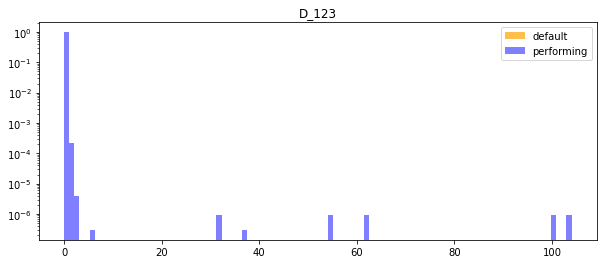

Variable: D_123 has 2.54% missing values
Min value is:  0.0
Max value is:  104.0
Value counts:           D_123
0.0    3264481
1.0     130156
NaN      88535
2.0        850
3.0         16
104.0        3
100.0        3
62.0         3
55.0         3
32.0         3
6.0          1
37.0         1
              D_123  non_missing  mis_%
customer_obs                           
1             32324       253654  11.30
2             26699       256381   9.43
3             12869       266694   4.60
4              7015       269308   2.54
5              1941       271920   0.71
6              1321       270053   0.49
7              1269       267171   0.47
8              1188       264574   0.45
9              1122       261649   0.43
10              917       258667   0.35
11              892       255409   0.35
12              510       252861   0.20
13              468       247178   0.19
14                0            1   0.00
#########################################


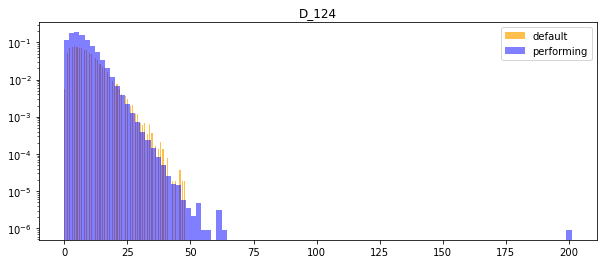

Variable: D_124 has 2.54% missing values
Min value is:  0.0
Max value is:  201.0
Value counts:         D_124
5.0   333447
4.0   330080
6.0   310550
3.0   302306
7.0   283869
...      ...
49.0       3
57.0       3
51.0       3
63.0       3
55.0       3

[61 rows x 1 columns]
              D_124  non_missing  mis_%
customer_obs                           
1             32324       253654  11.30
2             26699       256381   9.43
3             12869       266694   4.60
4              7015       269308   2.54
5              1941       271920   0.71
6              1321       270053   0.49
7              1269       267171   0.47
8              1188       264574   0.45
9              1122       261649   0.43
10              917       258667   0.35
11              892       255409   0.35
12              510       252861   0.20
13              468       247178   0.19
14                0            1   0.00
#########################################


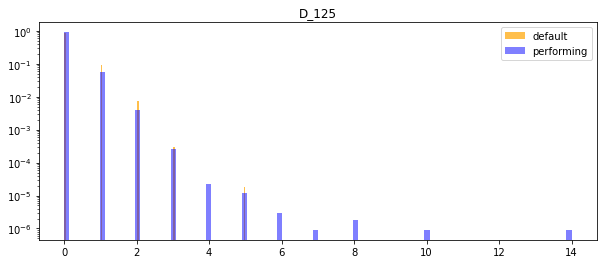

Variable: D_125 has 2.54% missing values
Min value is:  0.0
Max value is:  14.0
Value counts:          D_125
0.0   3174282
1.0    205540
NaN     88535
2.0     14648
3.0       904
4.0        77
5.0        44
6.0        10
8.0         6
10.0        3
7.0         3
14.0        3
              D_125  non_missing  mis_%
customer_obs                           
1             32324       253654  11.30
2             26699       256381   9.43
3             12869       266694   4.60
4              7015       269308   2.54
5              1941       271920   0.71
6              1321       270053   0.49
7              1269       267171   0.47
8              1188       264574   0.45
9              1122       261649   0.43
10              917       258667   0.35
11              892       255409   0.35
12              510       252861   0.20
13              468       247178   0.19
14                0            1   0.00
#########################################


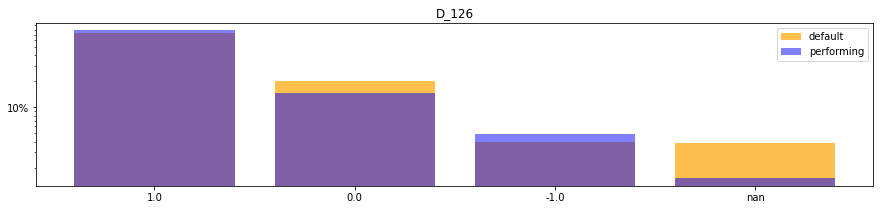

Variable: D_126 has 1.61% missing values
Min value is:  -1.0
Max value is:  1.0
Value counts:          D_126
 1.0  2732399
 0.0   524339
-1.0   171328
 NaN    55989
              D_126  non_missing  mis_%
customer_obs                           
1             20491       265487   7.17
2             17492       265588   6.18
3              8319       271244   2.98
4              3946       272377   1.43
5              1579       272282   0.58
6              1187       270187   0.44
7              1174       267266   0.44
8              1111       264651   0.42
9               690       262081   0.26
10                0       259584   0.00
11                0       256301   0.00
12                0       253371   0.00
13                0       247646   0.00
14                0            1   0.00
#########################################


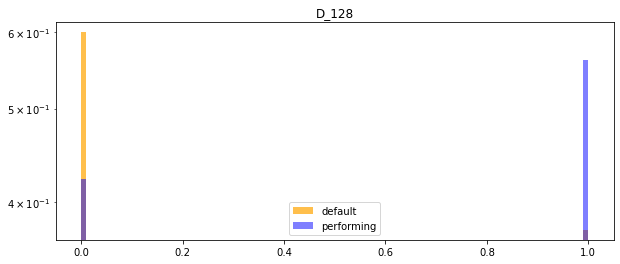

Variable: D_128 has 1.63% missing values
Min value is:  0.0
Max value is:  1.0
Value counts:         D_128
1.0  1926058
0.0  1501376
NaN    56621
              D_128  non_missing  mis_%
customer_obs                           
1             24490       261488   8.56
2              4264       278816   1.51
3              8757       270806   3.13
4              2043       274280   0.74
5              1503       272358   0.55
6              1438       269936   0.53
7              1388       267052   0.52
8              1404       264358   0.53
9              1176       261595   0.45
10             1105       258479   0.43
11             7810       248491   3.05
12              676       252695   0.27
13              567       247079   0.23
14                0            1   0.00
#########################################


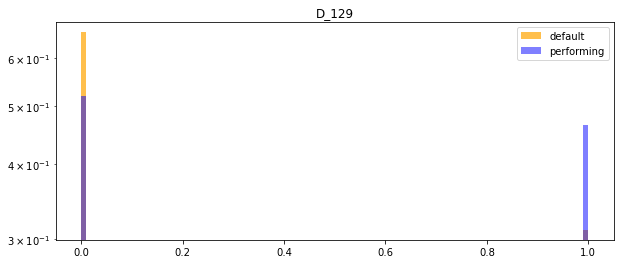

Variable: D_129 has 1.63% missing values
Min value is:  0.0
Max value is:  1.0
Value counts:         D_129
0.0  1832620
1.0  1594814
NaN    56621
              D_129  non_missing  mis_%
customer_obs                           
1             24490       261488   8.56
2              4264       278816   1.51
3              8757       270806   3.13
4              2043       274280   0.74
5              1503       272358   0.55
6              1438       269936   0.53
7              1388       267052   0.52
8              1404       264358   0.53
9              1176       261595   0.45
10             1105       258479   0.43
11             7810       248491   3.05
12              676       252695   0.27
13              567       247079   0.23
14                0            1   0.00
#########################################


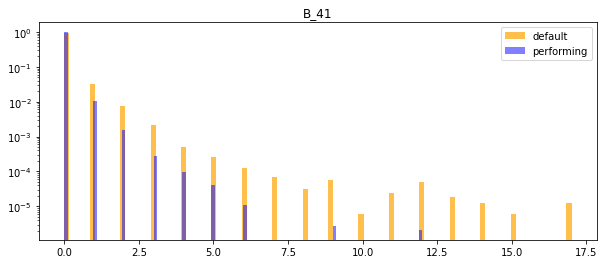

Variable: B_41 has 0.01% missing values
Min value is:  0.0
Max value is:  17.0
Value counts:           B_41
0.0   3434305
1.0     41081
2.0      6219
3.0      1256
NaN       499
4.0       397
5.0       178
6.0        58
9.0        18
12.0       15
7.0        11
8.0         5
11.0        4
13.0        3
17.0        2
14.0        2
15.0        1
10.0        1
              B_41  non_missing  mis_%
customer_obs                          
1                1       285977   0.00
2               34       283046   0.01
3                3       279560   0.00
4                3       276320   0.00
5               11       273850   0.00
6              366       271008   0.13
7               26       268414   0.01
8               17       265745   0.01
9                2       262769   0.00
10               0       259584   0.00
11              33       256268   0.01
12               3       253368   0.00
13               0       247646   0.00
14               0            1   0.00
################

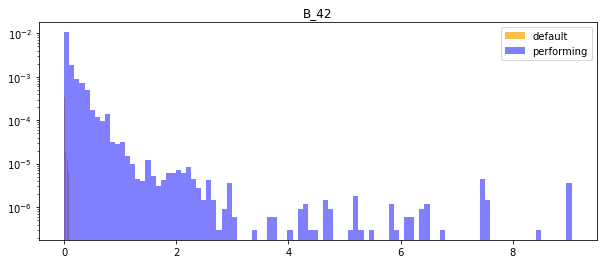

Variable: B_42 has 98.52% missing values
Min value is:  0.0
Max value is:  9.0518
Value counts:               B_42
NaN       3432372
0.028899        2
0.016383        2
0.028803        2
0.016818        2
...           ...
0.313333        1
0.309367        1
0.315269        1
0.308281        1
0.004064        1

[51667 rows x 1 columns]
                B_42  non_missing   mis_%
customer_obs                             
1             281993         3985   98.61
2             279101         3979   98.59
3             275609         3954   98.59
4             272415         3908   98.59
5             269954         3907   98.57
6             267459         3915   98.56
7             264547         3893   98.55
8             261856         3906   98.53
9             258835         3936   98.50
10            255643         3941   98.48
11            252292         4009   98.44
12            249183         4188   98.35
13            243484         4162   98.32
14                 1           

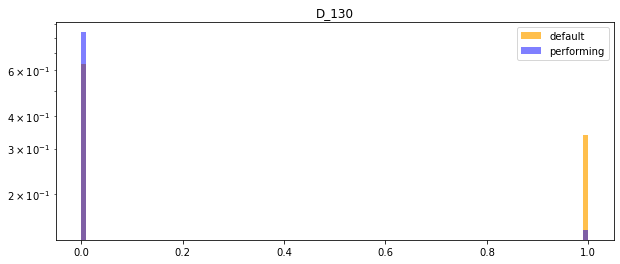

Variable: D_130 has 1.63% missing values
Min value is:  0.0
Max value is:  1.0
Value counts:         D_130
0.0  2886985
1.0   540449
NaN    56621
              D_130  non_missing  mis_%
customer_obs                           
1             24490       261488   8.56
2              4264       278816   1.51
3              8757       270806   3.13
4              2043       274280   0.74
5              1503       272358   0.55
6              1438       269936   0.53
7              1388       267052   0.52
8              1404       264358   0.53
9              1176       261595   0.45
10             1105       258479   0.43
11             7810       248491   3.05
12              676       252695   0.27
13              567       247079   0.23
14                0            1   0.00
#########################################


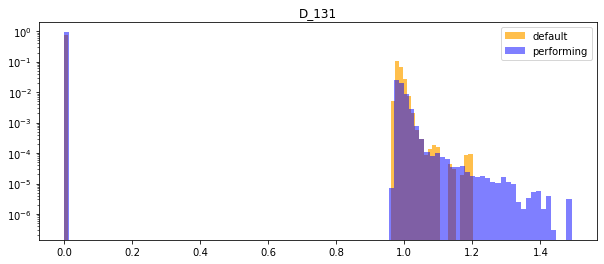

Variable: D_131 has 1.63% missing values
Min value is:  0.0
Max value is:  1.4916
Value counts:            D_131
NaN       56621
0.009479      7
0.008752      6
0.009219      6
0.988383      6
...         ...
0.001711      1
0.002307      1
0.006986      1
0.008325      1
0.001349      1

[3175289 rows x 1 columns]
              D_131  non_missing  mis_%
customer_obs                           
1             24490       261488   8.56
2              4264       278816   1.51
3              8757       270806   3.13
4              2043       274280   0.74
5              1503       272358   0.55
6              1438       269936   0.53
7              1388       267052   0.52
8              1404       264358   0.53
9              1176       261595   0.45
10             1105       258479   0.43
11             7810       248491   3.05
12              676       252695   0.27
13              567       247079   0.23
14                0            1   0.00
#########################################


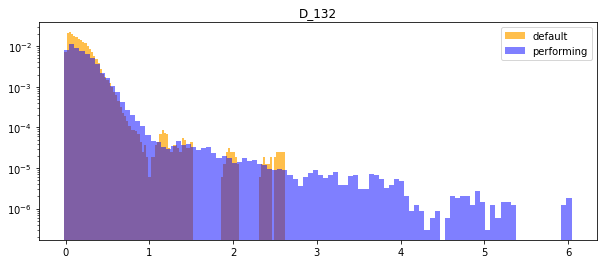

Variable: D_132 has 93.4% missing values
Min value is:  -0.0147
Max value is:  6.039
Value counts:              D_132
NaN       3254142
0.178908        3
0.170477        2
0.042956        2
0.107138        2
...           ...
0.085676        1
0.102993        1
0.109978        1
0.116204        1
0.347577        1

[229238 rows x 1 columns]
               D_132  non_missing   mis_%
customer_obs                             
1             269604        16374   94.27
2             265195        17885   93.68
3             262030        17533   93.73
4             258412        17911   93.52
5             255856        18005   93.43
6             253310        18064   93.34
7             250503        17937   93.32
8             247821        17941   93.25
9             244814        17957   93.17
10            241673        17911   93.10
11            239065        17236   93.28
12            235628        17743   93.00
13            230230        17416   92.97
14                 1       

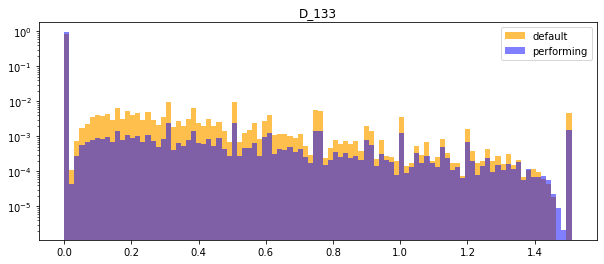

Variable: D_133 has 0.63% missing values
Min value is:  0.0
Max value is:  1.51
Value counts:            D_133
NaN       21923
0.008374      6
0.008414      6
0.009701      6
0.004832      5
...         ...
0.001286      1
0.007864      1
0.006896      1
0.000847      1
0.006312      1

[3236600 rows x 1 columns]
              D_133  non_missing  mis_%
customer_obs                           
1             14917       271061   5.22
2              2581       280499   0.91
3               162       279401   0.06
4               130       276193   0.05
5               932       272929   0.34
6               889       270485   0.33
7               938       267502   0.35
8               919       264843   0.35
9               455       262316   0.17
10                0       259584   0.00
11                0       256301   0.00
12                0       253371   0.00
13                0       247646   0.00
14                0            1   0.00
#########################################


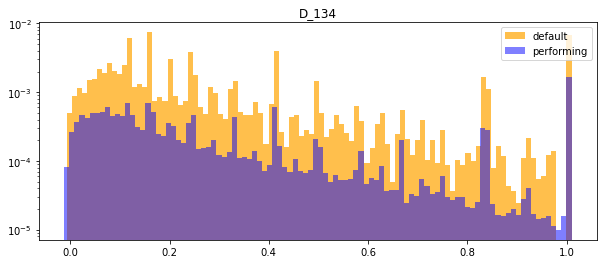

Variable: D_134 has 97.84% missing values
Min value is:  -0.0122
Max value is:  1.01
Value counts:              D_134
NaN       3408762
1.000914        3
1.008573        3
1.004669        3
1.004048        3
...           ...
0.308288        1
0.308253        1
0.380738        1
0.383869        1
1.000895        1

[74957 rows x 1 columns]
               D_134  non_missing   mis_%
customer_obs                             
1             280828         5150   98.20
2             277506         5574   98.03
3             273637         5926   97.88
4             270145         6178   97.76
5             267424         6437   97.65
6             264887         6487   97.61
7             261791         6649   97.52
8             259313         6449   97.57
9             256622         6149   97.66
10            253867         5717   97.80
11            251048         5253   97.95
12            248360         5011   98.02
13            243333         4313   98.26
14                 1        

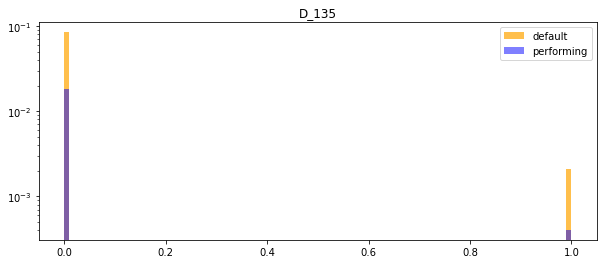

Variable: D_135 has 97.84% missing values
Min value is:  0.0
Max value is:  1.0
Value counts:         D_135
NaN  3408762
0.0    73612
1.0     1681
               D_135  non_missing   mis_%
customer_obs                             
1             280828         5150   98.20
2             277506         5574   98.03
3             273637         5926   97.88
4             270145         6178   97.76
5             267424         6437   97.65
6             264887         6487   97.61
7             261791         6649   97.52
8             259313         6449   97.57
9             256622         6149   97.66
10            253867         5717   97.80
11            251048         5253   97.95
12            248360         5011   98.02
13            243333         4313   98.26
14                 1            0  100.00
#########################################


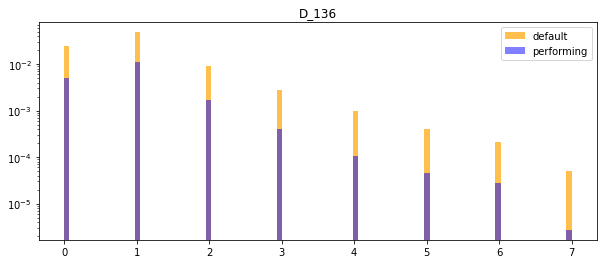

Variable: D_136 has 97.84% missing values
Min value is:  0.0
Max value is:  7.0
Value counts:         D_136
NaN  3408762
1.0    45123
0.0    20550
2.0     6972
3.0     1769
4.0      518
5.0      218
6.0      126
7.0       17
               D_136  non_missing   mis_%
customer_obs                             
1             280828         5150   98.20
2             277506         5574   98.03
3             273637         5926   97.88
4             270145         6178   97.76
5             267424         6437   97.65
6             264887         6487   97.61
7             261791         6649   97.52
8             259313         6449   97.57
9             256622         6149   97.66
10            253867         5717   97.80
11            251048         5253   97.95
12            248360         5011   98.02
13            243333         4313   98.26
14                 1            0  100.00
#########################################


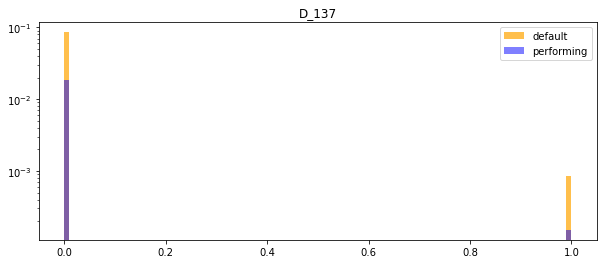

Variable: D_137 has 97.84% missing values
Min value is:  0.0
Max value is:  1.0
Value counts:         D_137
NaN  3408762
0.0    74652
1.0      641
               D_137  non_missing   mis_%
customer_obs                             
1             280828         5150   98.20
2             277506         5574   98.03
3             273637         5926   97.88
4             270145         6178   97.76
5             267424         6437   97.65
6             264887         6487   97.61
7             261791         6649   97.52
8             259313         6449   97.57
9             256622         6149   97.66
10            253867         5717   97.80
11            251048         5253   97.95
12            248360         5011   98.02
13            243333         4313   98.26
14                 1            0  100.00
#########################################


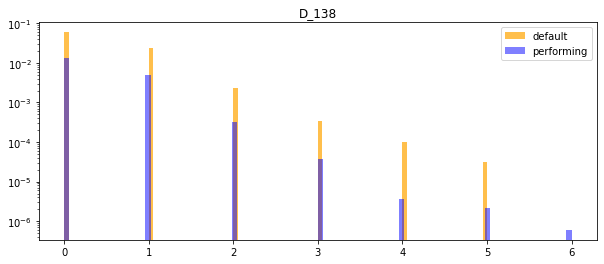

Variable: D_138 has 97.84% missing values
Min value is:  0.0
Max value is:  6.0
Value counts:         D_138
NaN  3408762
0.0    53514
1.0    20109
2.0     1444
3.0      184
4.0       28
5.0       12
6.0        2
               D_138  non_missing   mis_%
customer_obs                             
1             280828         5150   98.20
2             277506         5574   98.03
3             273637         5926   97.88
4             270145         6178   97.76
5             267424         6437   97.65
6             264887         6487   97.61
7             261791         6649   97.52
8             259313         6449   97.57
9             256622         6149   97.66
10            253867         5717   97.80
11            251048         5253   97.95
12            248360         5011   98.02
13            243333         4313   98.26
14                 1            0  100.00
#########################################


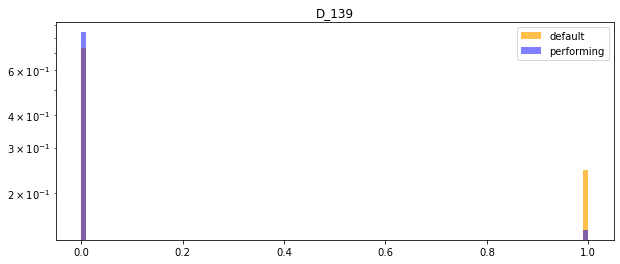

Variable: D_139 has 1.63% missing values
Min value is:  0.0
Max value is:  1.0
Value counts:         D_139
0.0  2910341
1.0   517093
NaN    56621
              D_139  non_missing  mis_%
customer_obs                           
1             24490       261488   8.56
2              4264       278816   1.51
3              8757       270806   3.13
4              2043       274280   0.74
5              1503       272358   0.55
6              1438       269936   0.53
7              1388       267052   0.52
8              1404       264358   0.53
9              1176       261595   0.45
10             1105       258479   0.43
11             7810       248491   3.05
12              676       252695   0.27
13              567       247079   0.23
14                0            1   0.00
#########################################


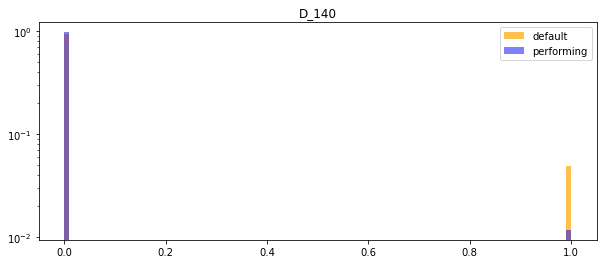

Variable: D_140 has 0.61% missing values
Min value is:  0.0
Max value is:  1.0
Value counts:         D_140
0.0  3415513
1.0    47326
NaN    21216
              D_140  non_missing  mis_%
customer_obs                           
1             14841       271137   5.19
2              2486       280594   0.88
3               148       279415   0.05
4               111       276212   0.04
5               825       273036   0.30
6               785       270589   0.29
7               839       267601   0.31
8               821       264941   0.31
9               360       262411   0.14
10                0       259584   0.00
11                0       256301   0.00
12                0       253371   0.00
13                0       247646   0.00
14                0            1   0.00
#########################################


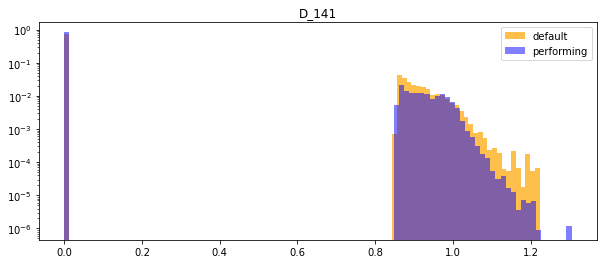

Variable: D_141 has 1.63% missing values
Min value is:  0.0
Max value is:  1.3052
Value counts:            D_141
NaN       56621
0.008040      6
0.009876      6
0.009428      6
0.008369      5
...         ...
0.002197      1
0.002408      1
0.008328      1
0.005132      1
0.006207      1

[3198614 rows x 1 columns]
              D_141  non_missing  mis_%
customer_obs                           
1             24490       261488   8.56
2              4264       278816   1.51
3              8757       270806   3.13
4              2043       274280   0.74
5              1503       272358   0.55
6              1438       269936   0.53
7              1388       267052   0.52
8              1404       264358   0.53
9              1176       261595   0.45
10             1105       258479   0.43
11             7810       248491   3.05
12              676       252695   0.27
13              567       247079   0.23
14                0            1   0.00
#########################################


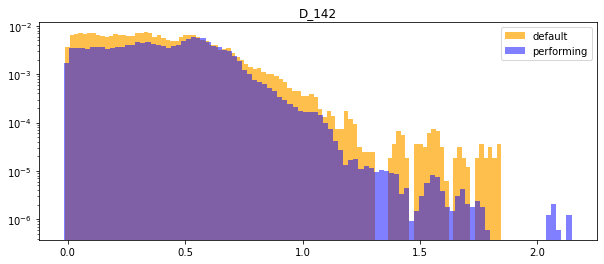

Variable: D_142 has 85.16% missing values
Min value is:  -0.0145
Max value is:  2.1457
Value counts:              D_142
NaN       2966968
0.553474        3
0.554656        3
0.103041        3
0.566226        3
...           ...
0.365434        1
0.358443        1
0.356759        1
0.355732        1
0.383916        1

[511108 rows x 1 columns]
               D_142  non_missing   mis_%
customer_obs                             
1             246221        39757   86.10
2             239275        43805   84.53
3             237339        42224   84.90
4             233848        42475   84.63
5             232074        41787   84.74
6             230293        41081   84.86
7             228146        40294   84.99
8             226126        39636   85.09
9             223718        39053   85.14
10            221355        38229   85.27
11            220082        36219   85.87
12            216611        36760   85.49
13            211879        35767   85.56
14                 1     

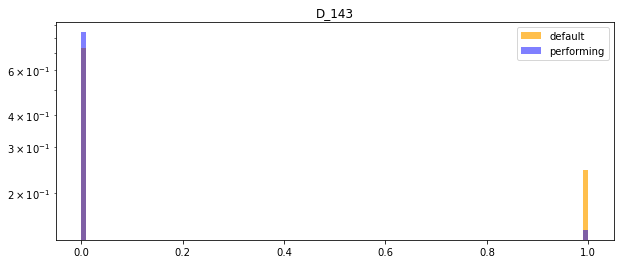

Variable: D_143 has 1.63% missing values
Min value is:  0.0
Max value is:  1.0
Value counts:         D_143
0.0  2910787
1.0   516647
NaN    56621
              D_143  non_missing  mis_%
customer_obs                           
1             24490       261488   8.56
2              4264       278816   1.51
3              8757       270806   3.13
4              2043       274280   0.74
5              1503       272358   0.55
6              1438       269936   0.53
7              1388       267052   0.52
8              1404       264358   0.53
9              1176       261595   0.45
10             1105       258479   0.43
11             7810       248491   3.05
12              676       252695   0.27
13              567       247079   0.23
14                0            1   0.00
#########################################


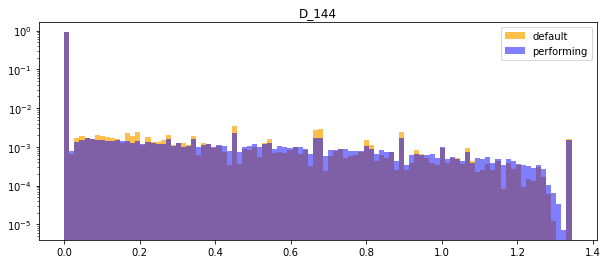

Variable: D_144 has 0.61% missing values
Min value is:  0.0
Max value is:  1.3433
Value counts:            D_144
NaN       21254
0.009774      6
0.008568      5
0.009204      5
0.009499      5
...         ...
0.001068      1
0.006159      1
0.002824      1
0.004736      1
0.003184      1

[3254480 rows x 1 columns]
              D_144  non_missing  mis_%
customer_obs                           
1             14845       271133   5.19
2              2492       280588   0.88
3               149       279414   0.05
4               112       276211   0.04
5               831       273030   0.30
6               790       270584   0.29
7               843       267597   0.31
8               826       264936   0.31
9               366       262405   0.14
10                0       259584   0.00
11                0       256301   0.00
12                0       253371   0.00
13                0       247646   0.00
14                0            1   0.00
#########################################


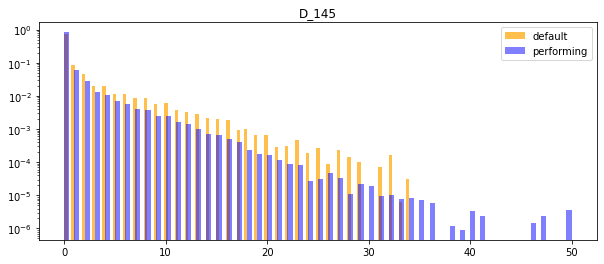

Variable: D_145 has 1.63% missing values
Min value is:  0.0
Max value is:  50.0
Value counts:          D_145
0.0   2910341
1.0    210931
2.0     98670
NaN     56621
3.0     46334
...       ...
41.0        8
47.0        8
46.0        5
38.0        4
39.0        3

[45 rows x 1 columns]
              D_145  non_missing  mis_%
customer_obs                           
1             24490       261488   8.56
2              4264       278816   1.51
3              8757       270806   3.13
4              2043       274280   0.74
5              1503       272358   0.55
6              1438       269936   0.53
7              1388       267052   0.52
8              1404       264358   0.53
9              1176       261595   0.45
10             1105       258479   0.43
11             7810       248491   3.05
12              676       252695   0.27
13              567       247079   0.23
14                0            1   0.00


In [37]:
for column in df.columns:
    missing_percentage = round(np.mean(df[column].isna()),4)*100
    if missing_percentage != 0:
        print("#########################################")
        if column in static_columns:
            values_counts_1 = pd.DataFrame(df.loc[df.target==1,column].value_counts(dropna=False, normalize=True)).reset_index()
            values_counts_0 = pd.DataFrame(df.loc[df.target==0,column].value_counts(dropna=False, normalize=True)).reset_index()
            fig, axs = plt.subplots(1, 1, figsize=(15,3))
            axs.bar(values_counts_1.index, values_counts_1[column]*100, alpha=0.7, color="orange", label="default")
            axs.bar(values_counts_0.index, values_counts_0[column]*100, alpha=0.5, color="blue", label="performing")
            axs.set_title(column)
            axs.set_yscale('log')
            axs.yaxis.set_major_formatter(mtick.PercentFormatter())
            values_counts = df[column].value_counts(dropna=False).index
            axs.set_xticks([i for i in range(len(values_counts))], values_counts)
            plt.legend()
            plt.show()
        else:
            columns_values_1 = df.loc[(df.target==1),column] 
            columns_values_0 = df.loc[(df.target==0),column]  
            fig, axs = plt.subplots(1, 1, figsize=(10,4))
            axs.hist(columns_values_1, weights=np.ones(len(columns_values_1)) / len(columns_values_1),
                     bins=100, alpha=0.7, color="orange", label="default")
            axs.hist(columns_values_0, weights=np.ones(len(columns_values_0)) / len(columns_values_0),
                     bins=100, alpha=0.5, color="blue", label="performing")
            axs.set_yscale('log')
            axs.set_title(column)
            plt.legend()
            plt.show()

    
            
        print("Variable: {} has {}% missing values".format(column, round(missing_percentage,2)))
        print("Min value is: ", round(df[column].min(), 4))
        print("Max value is: ", round(df[column].max(), 4))
        print("Value counts: ", pd.DataFrame(df[column].value_counts(dropna=False)))
        
        column_missings = df.loc[:,[column, "customer_obs"]].groupby(["customer_obs"]).agg(lambda x: sum(x.isna()))
        column_missings["non_missing"] = df.loc[:,[column, "customer_obs"]].groupby(["customer_obs"]).count()
        column_missings["mis_%"] = round(
            column_missings[column] / (column_missings[column] + column_missings["non_missing"])*100, 2)
        
        print(column_missings)

In [1]:
## Additional discrete variables in which additional NaNs indicator column should be added
## with median or best fitting group imputuation:
## Won't be used in LR
add_int_var = ["D_44", "D_64", "D_68", "D_70", "D_72", "D_78", "D_79", "D_81", "D_83", "D_84", "D_89","D_91",
               "D_107","D_117","D_122", "D_124","D_125","D_145"]

## Additional categorical variables where NaN should be coded as another group + one-hot encoded
## Won't be used in LR
add_cat_var = ["B_8", "D_54", "D_66", "D_103","D_114","D_116","D_120","D_126","D_128","D_129","D_130","D_139",
              "D_140", "D_143"]


## Variables which can be safely removed because of NaNs
## Criteria -  More than 99.5% NaNs
var_to_remove = ["D_87", "D_88"]

## Variables where NaN can be safely imputed (using obs from other snapshots or nearest neighbours imputed)
## Won't be used in LR
## Criteria - Less than 2% NaNs, difference in y distribution between missing and full is not significant
var_nan_impute = ["P_2", "B_2", "D_41", "B_3", "D_45", "D_52", "B_15", "B_16", "B_19", "B_20", "B_22", "D_74",
                  "B_25", "B_26", "D_80", "B_27" ,"B_30", "B_33","S_26", "B_38", "D_109","D_112","B_41"] 
# there is a group of variables that have ~1120 missing obs in the first customer_obs

## Float variables where maybe grouping will be needed or in which additional NaNs indicator column should be added
## Won't be used in LR
## Criteria - Significant number of NaNs (more than 2%)
float_nan_grouping = ["S_3", "D_42", "D_43", "D_46", "D_48", "D_49", "D_50", "P_3", "D_53", "S_7", "D_55", "D_56",
                      "B_13", "S_9", "D_59", "D_61", "D_62", "B_17", "D_69", "D_77","S_22", "S_24", "S_25",
                      "D_102","D_104", "D_105", "R_27", "S_27","D_113","D_115","D_118","D_119","D_121","D_123",
                      "D_131","D_133", "D_141","D_144"]

## Float or other values that have more than 90% NaNs and should be changed to missing flag
## or grouped into 2-3 categories
## Won't be used in LR
## Criteria - NaNs > 70%
float_to_nanflag = ["D_73", "D_76", "R_9", "D_82", "B_29", "D_106","R_26", "D_108", "D_110", "D_111","B_39","B_42",
                    "D_132","D_134", "D_135", "D_136", "D_137", "D_138","D_142"]

## Variables that can be used as default_flag
var_default_ind = ["D_87", "D_88"]

## What to do in case of float values with significant portion of missing - S_9 f.e.

In [2]:
len(var_nan_impute)

24

In [3]:
len(float_nan_grouping) + len(float_to_nanflag)

57

## Analysis of target variable distributions depending on occurrence of missing value

In [46]:
y = df.loc[:,["customer_ID", "target"]].groupby("customer_ID").mean().reset_index()
y["target"] = y["target"].astype(int)

## Check Distributions for the first reporting date

#########################################


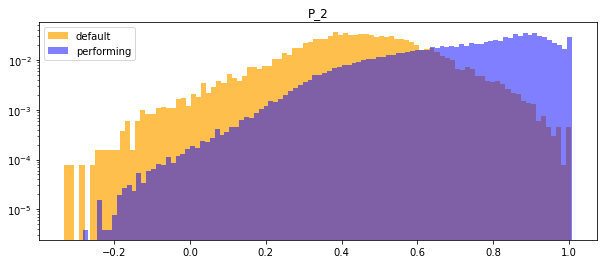

Variable: P_2 has 1.0% missing values
Min value is:  -0.4210819602012634
Max value is:  1.0099999904632568
#########################################


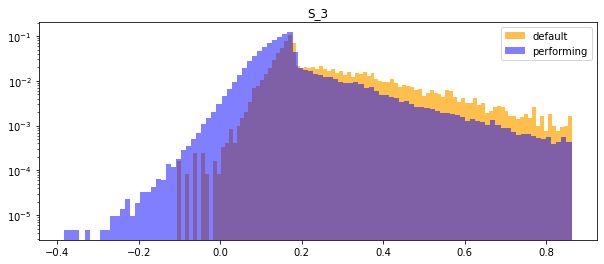

Variable: S_3 has 21.0% missing values
Min value is:  -0.6271320581436157
Max value is:  4.437958240509033
#########################################


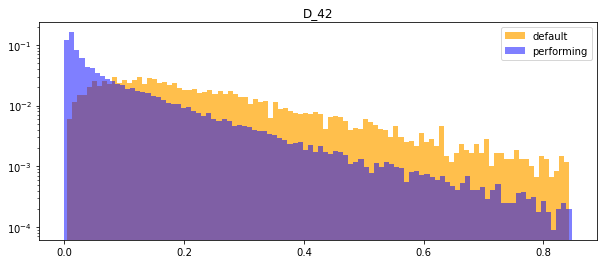

Variable: D_42 has 90.0% missing values
Min value is:  -0.00037201930535957217
Max value is:  4.1911187171936035
#########################################


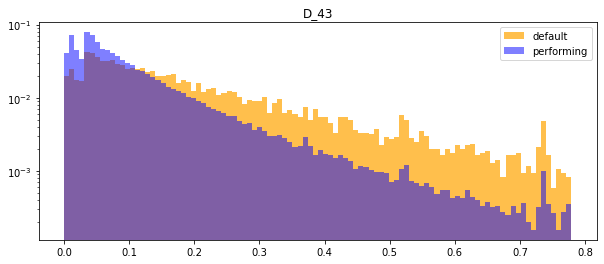

Variable: D_43 has 33.0% missing values
Min value is:  1.154549806869909e-07
Max value is:  6.658688545227051
#########################################


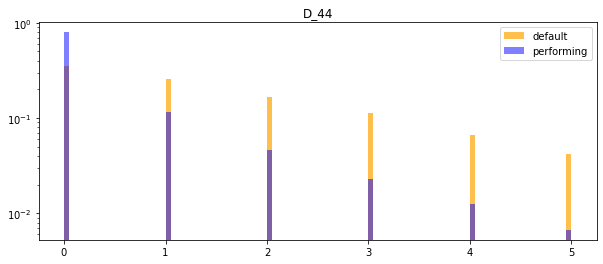

Variable: D_44 has 5.0% missing values
Min value is:  0.0
Max value is:  27.0
#########################################


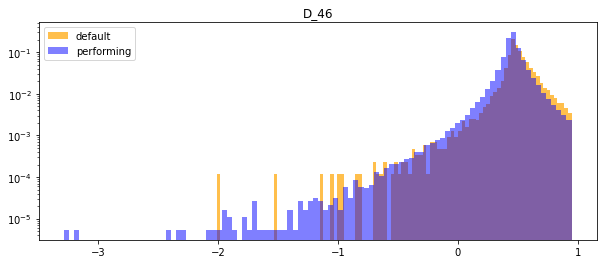

Variable: D_46 has 23.0% missing values
Min value is:  -9.507946968078613
Max value is:  14.806632041931152
#########################################


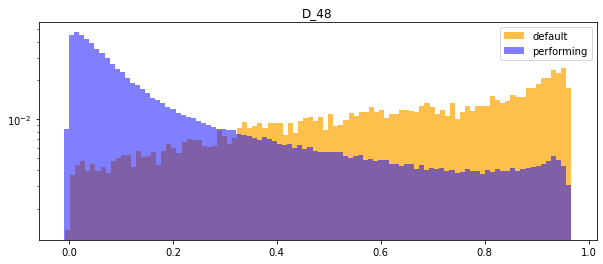

Variable: D_48 has 15.0% missing values
Min value is:  -0.00961355958133936
Max value is:  5.1067118644714355
#########################################


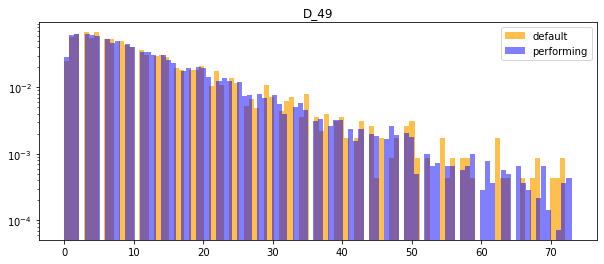

Variable: D_49 has 93.0% missing values
Min value is:  0.0
Max value is:  3254.0
#########################################


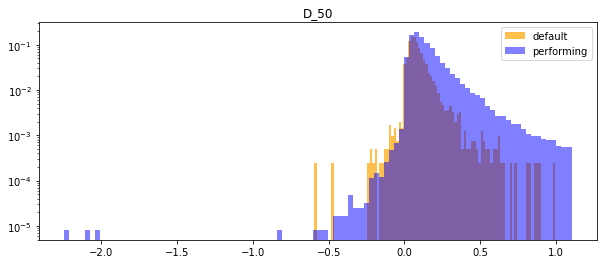

Variable: D_50 has 54.0% missing values
Min value is:  -306.487060546875
Max value is:  244.04266357421875
#########################################


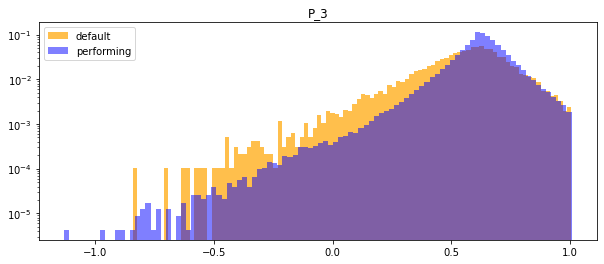

Variable: P_3 has 4.0% missing values
Min value is:  -1.519689679145813
Max value is:  2.428050994873047
#########################################


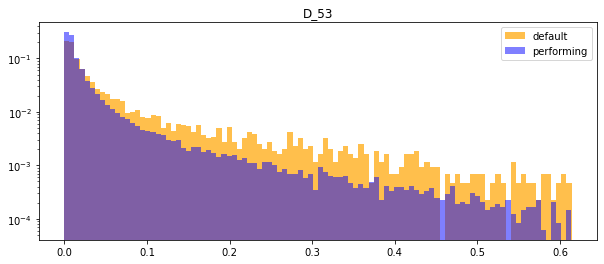

Variable: D_53 has 79.0% missing values
Min value is:  5.678128900399315e-08
Max value is:  5.95401668548584
#########################################


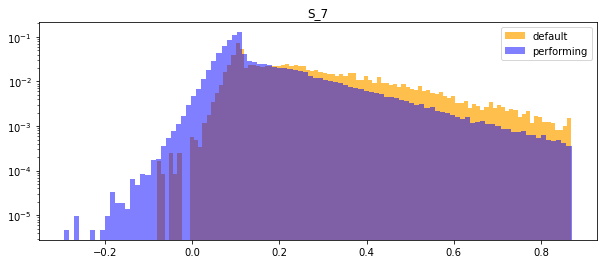

Variable: S_7 has 21.0% missing values
Min value is:  -0.4701317548751831
Max value is:  3.36822509765625
#########################################


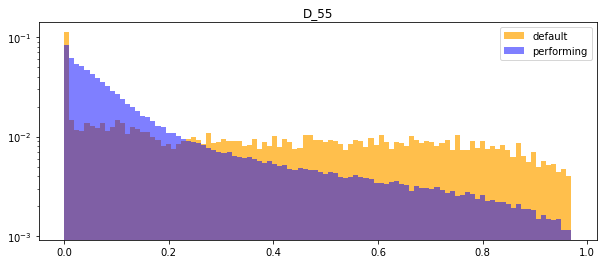

Variable: D_55 has 4.0% missing values
Min value is:  2.3532178872187615e-08
Max value is:  1.835677146911621
#########################################


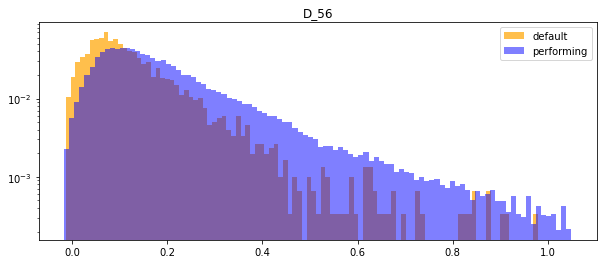

Variable: D_56 has 50.0% missing values
Min value is:  -0.017089147120714188
Max value is:  10.956514358520508
#########################################


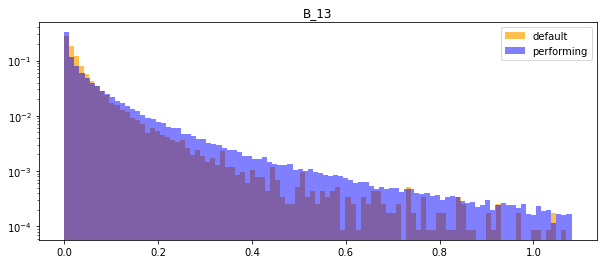

Variable: B_13 has 1.0% missing values
Min value is:  3.2746466871458324e-08
Max value is:  188.8134765625
#########################################


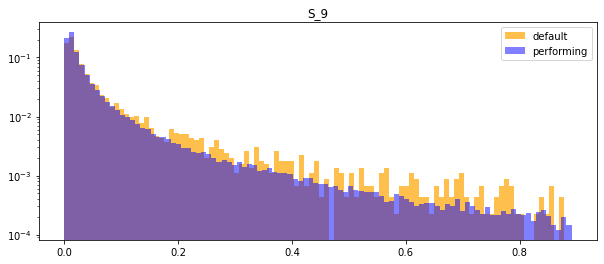

Variable: S_9 has 52.0% missing values
Min value is:  4.459887179564248e-07
Max value is:  2.8395848274230957
#########################################


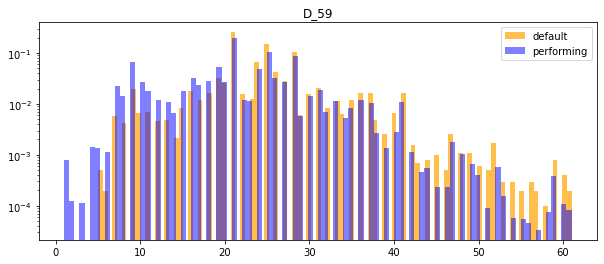

Variable: D_59 has 2.0% missing values
Min value is:  1.0
Max value is:  128.0
#########################################


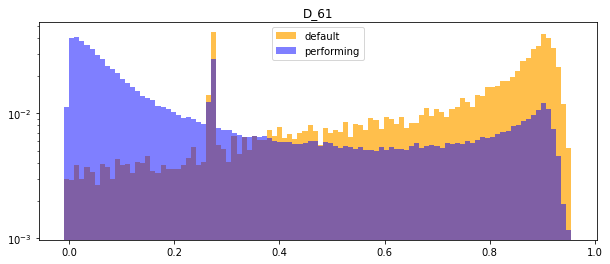

Variable: D_61 has 13.0% missing values
Min value is:  -0.009259018115699291
Max value is:  38.240901947021484
#########################################


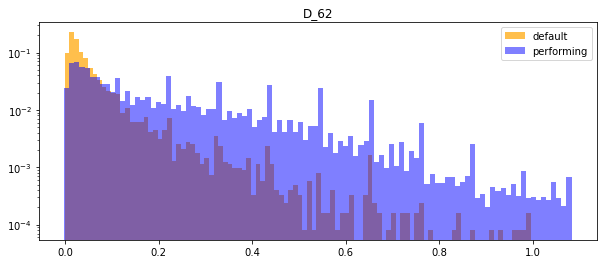

Variable: D_62 has 16.0% missing values
Min value is:  -0.0025261985138058662
Max value is:  11.100953102111816
#########################################


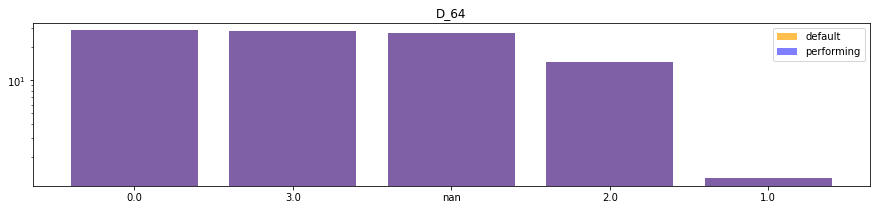

Variable: D_64 has 3.0% missing values
Min value is:  0.0
Max value is:  3.0
#########################################


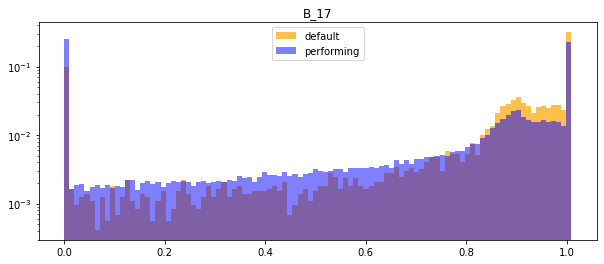

Variable: B_17 has 64.0% missing values
Min value is:  1.1320256021463138e-07
Max value is:  1.0099999904632568
#########################################


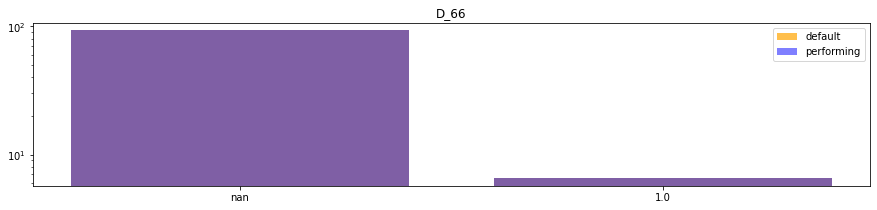

Variable: D_66 has 88.0% missing values
Min value is:  0.0
Max value is:  1.0
#########################################


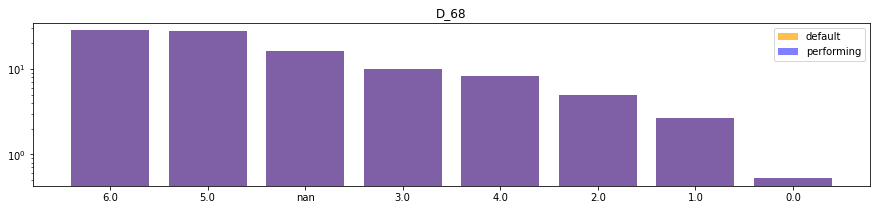

Variable: D_68 has 3.0% missing values
Min value is:  0.0
Max value is:  6.0
#########################################


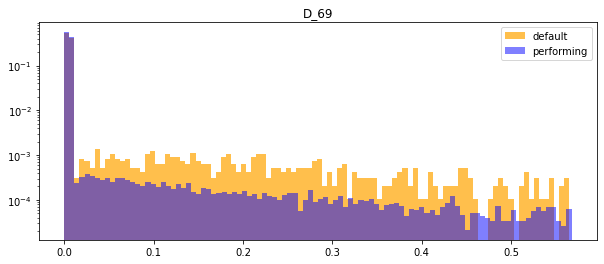

Variable: D_69 has 3.0% missing values
Min value is:  6.051600998091544e-09
Max value is:  2787.341552734375
#########################################


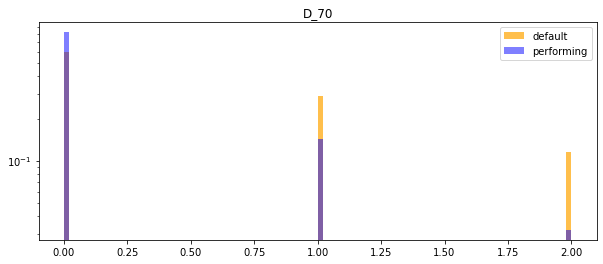

Variable: D_70 has 1.0% missing values
Min value is:  0.0
Max value is:  20.0
#########################################


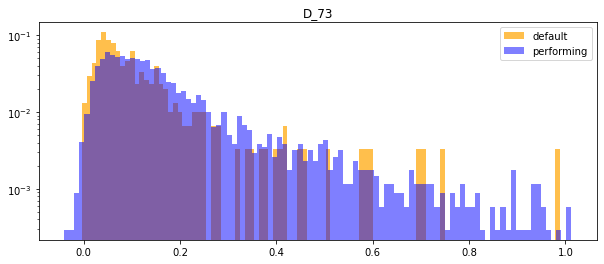

Variable: D_73 has 99.0% missing values
Min value is:  -0.04043599218130112
Max value is:  3.853646993637085
#########################################


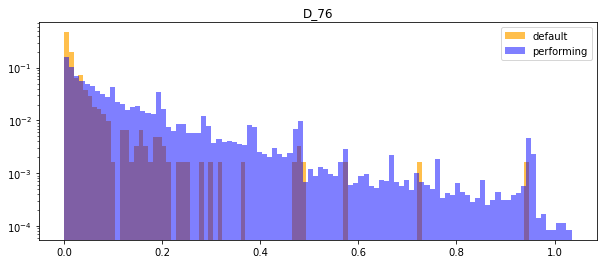

Variable: D_76 has 87.0% missing values
Min value is:  3.1284824331123673e-07
Max value is:  9.683378219604492
#########################################


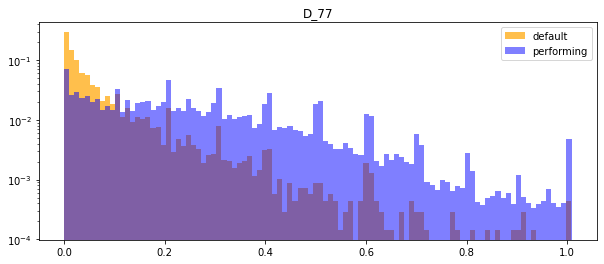

Variable: D_77 has 41.0% missing values
Min value is:  1.3982361224407214e-06
Max value is:  10.229169845581055
#########################################


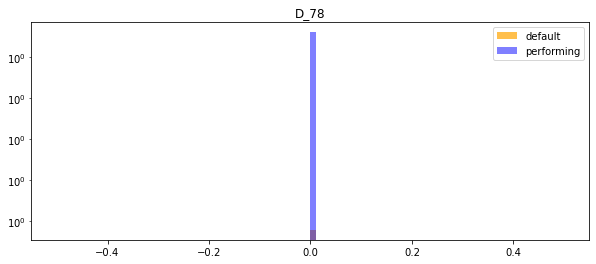

Variable: D_78 has 5.0% missing values
Min value is:  0.0
Max value is:  15.0
#########################################


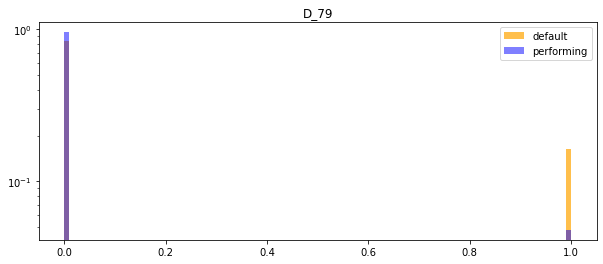

Variable: D_79 has 1.0% missing values
Min value is:  0.0
Max value is:  23.0
#########################################


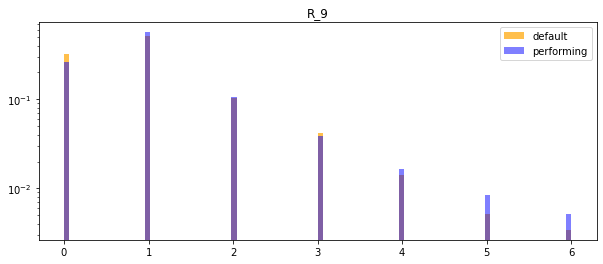

Variable: R_9 has 96.0% missing values
Min value is:  0.0
Max value is:  9.0
#########################################


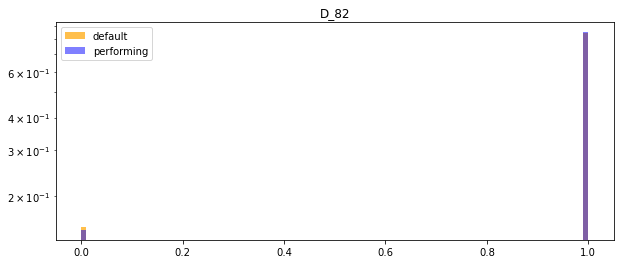

Variable: D_82 has 72.0% missing values
Min value is:  0.0
Max value is:  6.0
#########################################


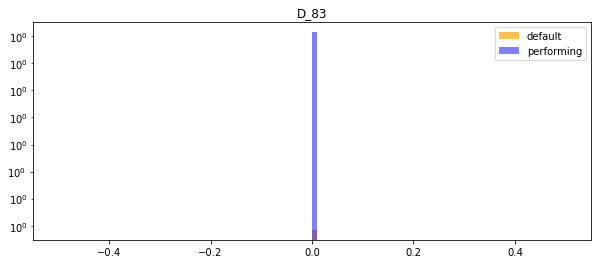

Variable: D_83 has 3.0% missing values
Min value is:  0.0
Max value is:  20.0
#########################################


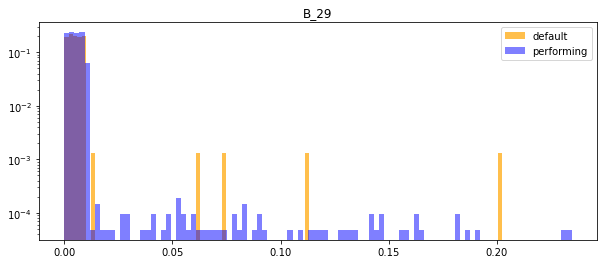

Variable: B_29 has 93.0% missing values
Min value is:  2.146359356913763e-08
Max value is:  8.411444664001465
#########################################


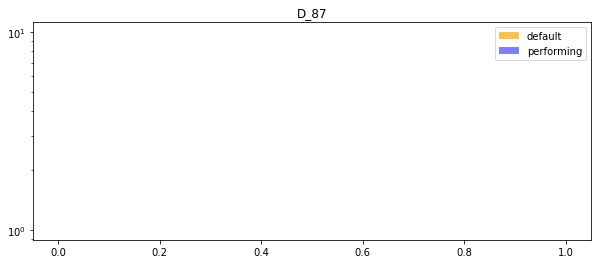

Variable: D_87 has 100.0% missing values
Min value is:  1.0
Max value is:  1.0
#########################################


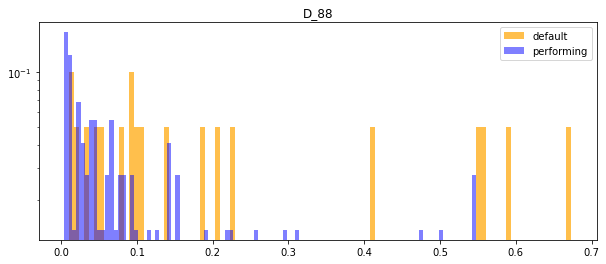

Variable: D_88 has 100.0% missing values
Min value is:  -3.1962663342710584e-05
Max value is:  1.4560428857803345
#########################################


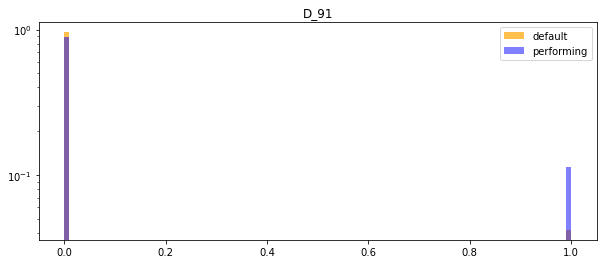

Variable: D_91 has 2.0% missing values
Min value is:  0.0
Max value is:  6.0
#########################################


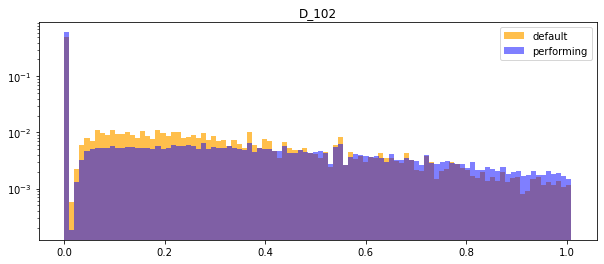

Variable: D_102 has 1.0% missing values
Min value is:  2.323852399399584e-08
Max value is:  1.0899981260299683
#########################################


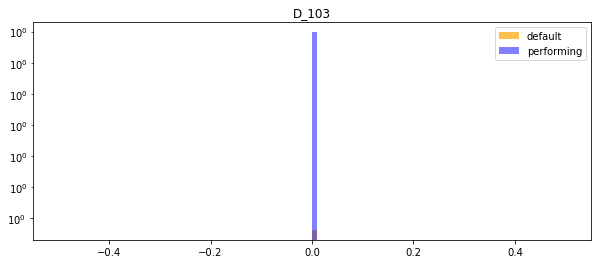

Variable: D_103 has 2.0% missing values
Min value is:  0.0
Max value is:  1.0
#########################################


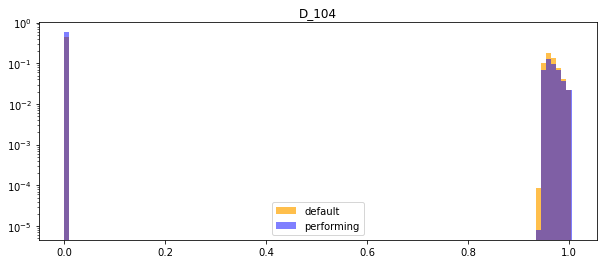

Variable: D_104 has 2.0% missing values
Min value is:  2.869107618153066e-09
Max value is:  1.237285852432251
#########################################


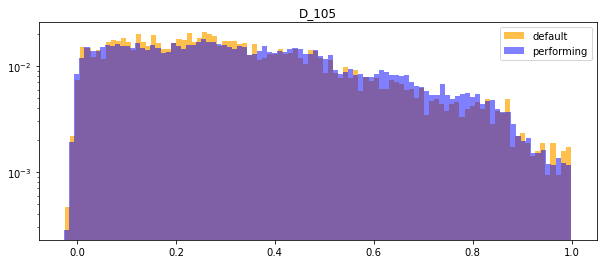

Variable: D_105 has 57.0% missing values
Min value is:  -0.025782166048884392
Max value is:  4.53844690322876
#########################################


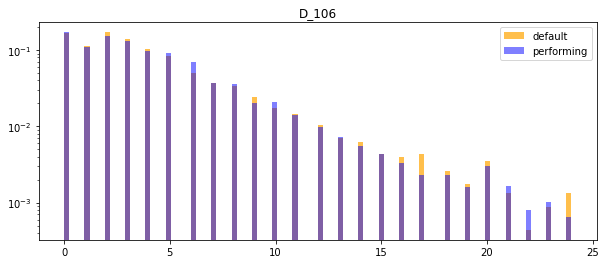

Variable: D_106 has 93.0% missing values
Min value is:  0.0
Max value is:  14417.0
#########################################


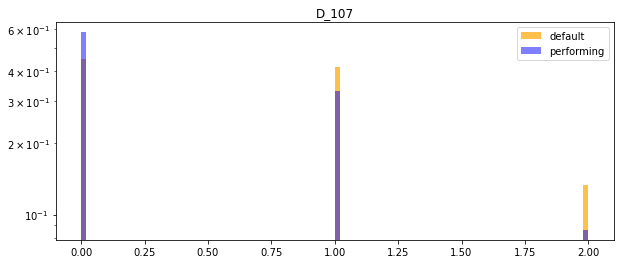

Variable: D_107 has 2.0% missing values
Min value is:  0.0
Max value is:  21.0
#########################################


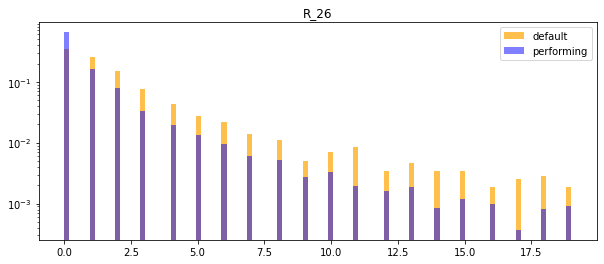

Variable: R_26 has 93.0% missing values
Min value is:  0.0
Max value is:  243.0
#########################################


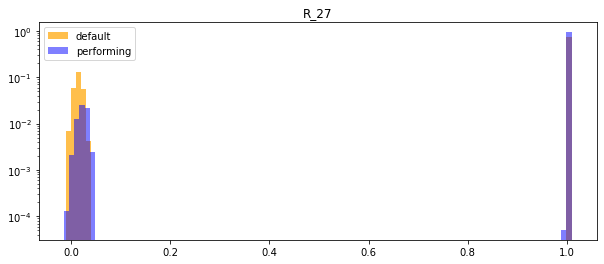

Variable: R_27 has 2.0% missing values
Min value is:  -0.018828444182872772
Max value is:  1.0099999904632568
#########################################


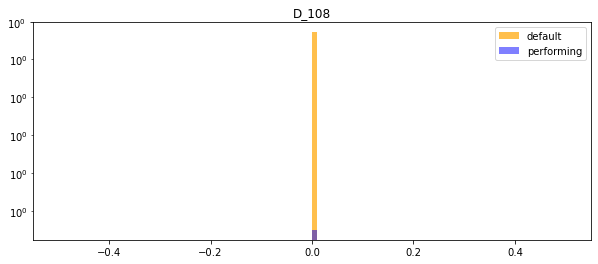

Variable: D_108 has 100.0% missing values
Min value is:  0.0
Max value is:  6.0
#########################################


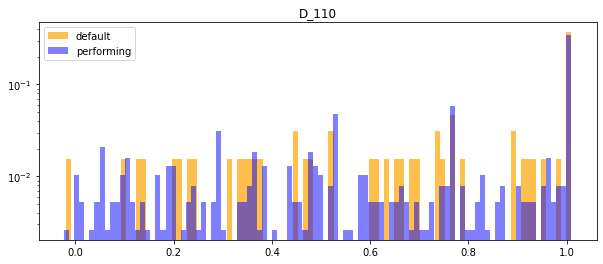

Variable: D_110 has 100.0% missing values
Min value is:  -0.02374994195997715
Max value is:  1.009986400604248
#########################################


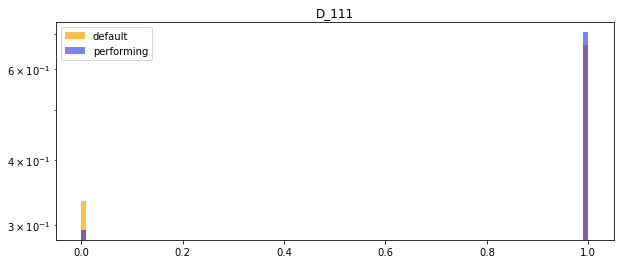

Variable: D_111 has 100.0% missing values
Min value is:  0.0
Max value is:  2.0
#########################################


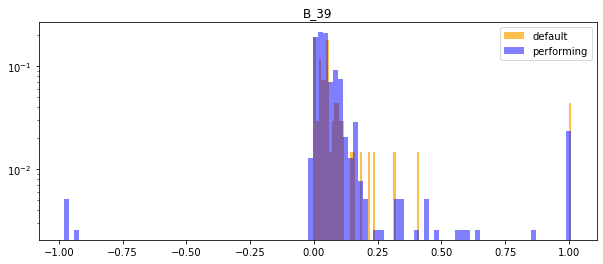

Variable: B_39 has 100.0% missing values
Min value is:  -0.9793140292167664
Max value is:  1.642560601234436
#########################################


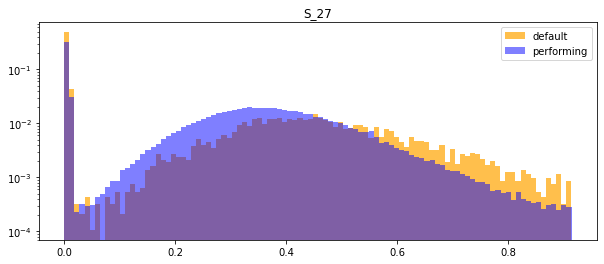

Variable: S_27 has 28.0% missing values
Min value is:  4.417077259510904e-10
Max value is:  5.346263885498047
#########################################


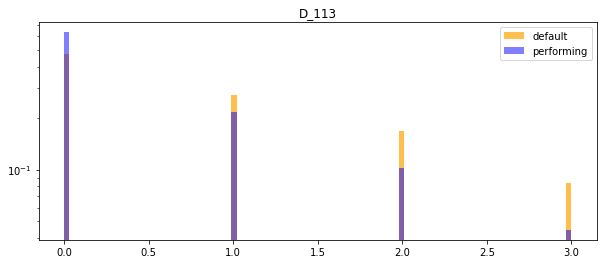

Variable: D_113 has 3.0% missing values
Min value is:  0.0
Max value is:  125.0
#########################################


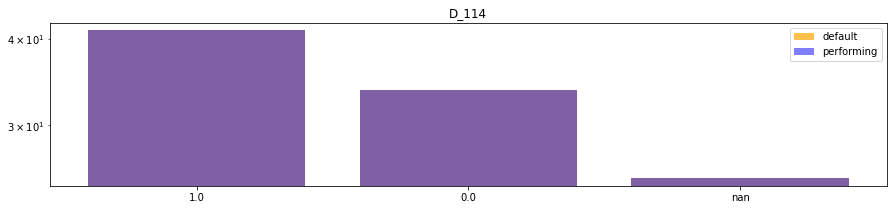

Variable: D_114 has 3.0% missing values
Min value is:  0.0
Max value is:  1.0
#########################################


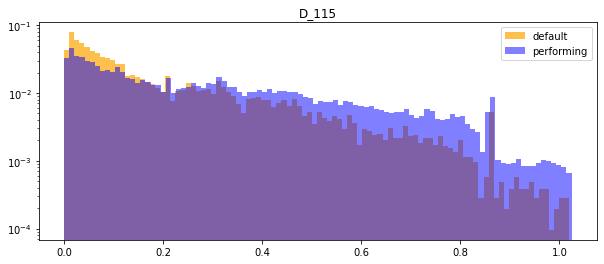

Variable: D_115 has 3.0% missing values
Min value is:  2.2280535461050022e-07
Max value is:  1.9995397329330444
#########################################


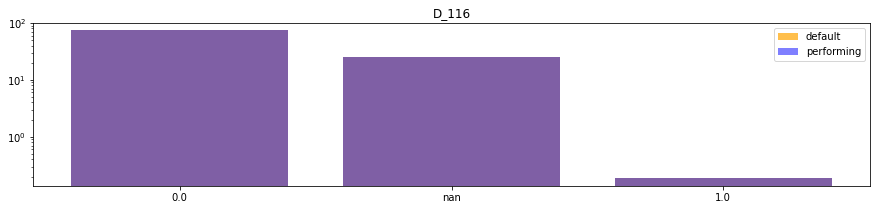

Variable: D_116 has 3.0% missing values
Min value is:  0.0
Max value is:  1.0
#########################################


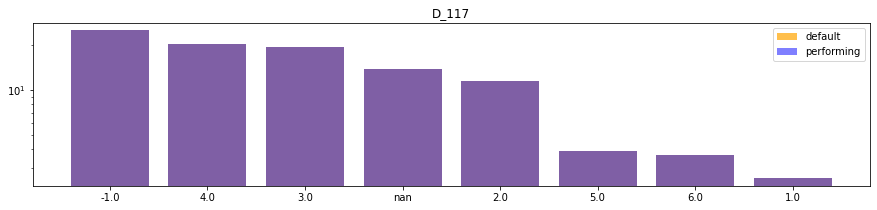

Variable: D_117 has 3.0% missing values
Min value is:  -1.0
Max value is:  6.0
#########################################


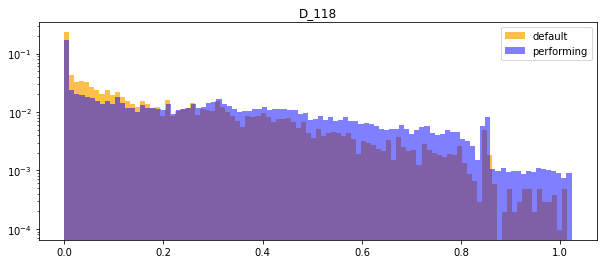

Variable: D_118 has 3.0% missing values
Min value is:  2.5519062418766225e-08
Max value is:  1.9708353281021118
#########################################


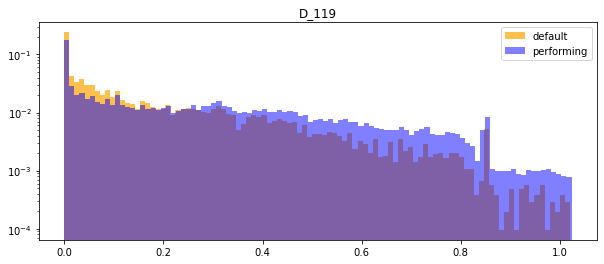

Variable: D_119 has 3.0% missing values
Min value is:  1.0666901317790689e-07
Max value is:  1.9769115447998047
#########################################


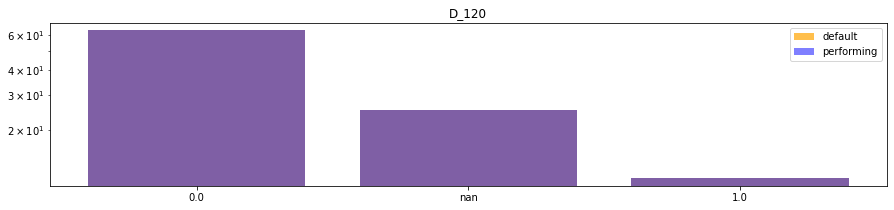

Variable: D_120 has 3.0% missing values
Min value is:  0.0
Max value is:  1.0
#########################################


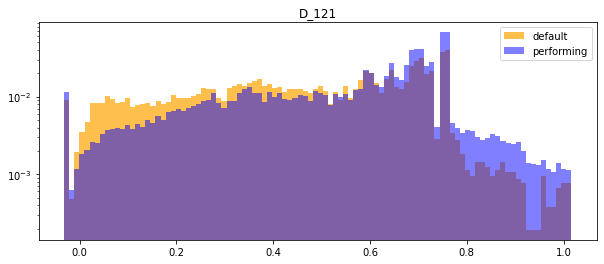

Variable: D_121 has 3.0% missing values
Min value is:  -0.032075006514787674
Max value is:  1.7911094427108765
#########################################


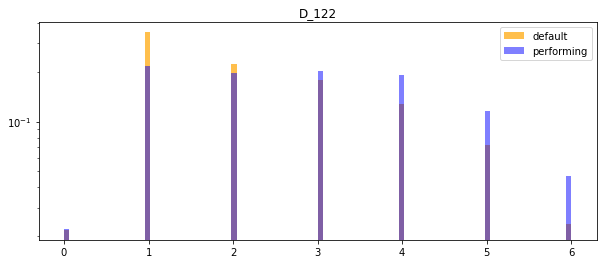

Variable: D_122 has 3.0% missing values
Min value is:  0.0
Max value is:  13.0
#########################################


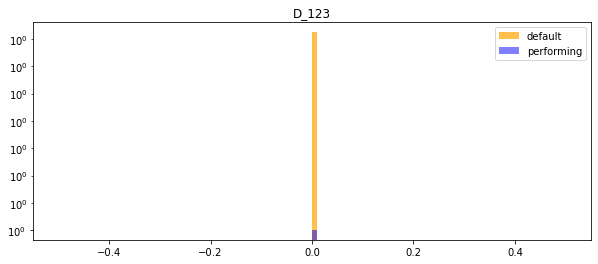

Variable: D_123 has 3.0% missing values
Min value is:  0.0
Max value is:  104.0
#########################################


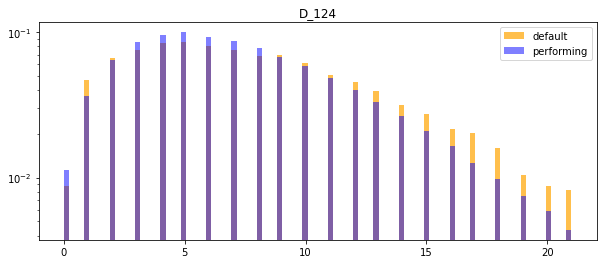

Variable: D_124 has 3.0% missing values
Min value is:  0.0
Max value is:  201.0
#########################################


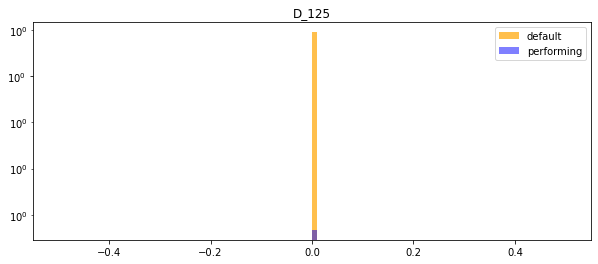

Variable: D_125 has 3.0% missing values
Min value is:  0.0
Max value is:  14.0
#########################################


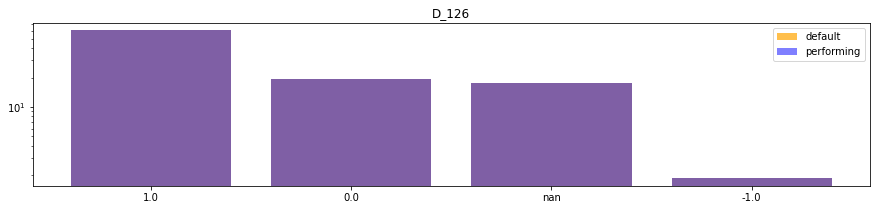

Variable: D_126 has 2.0% missing values
Min value is:  -1.0
Max value is:  1.0
#########################################


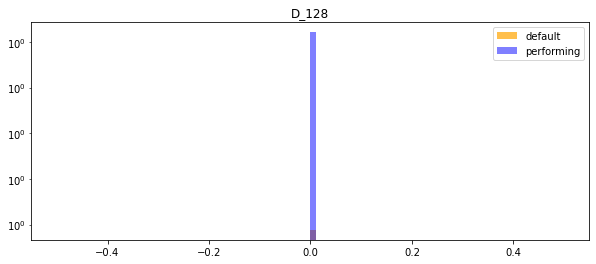

Variable: D_128 has 2.0% missing values
Min value is:  0.0
Max value is:  1.0
#########################################


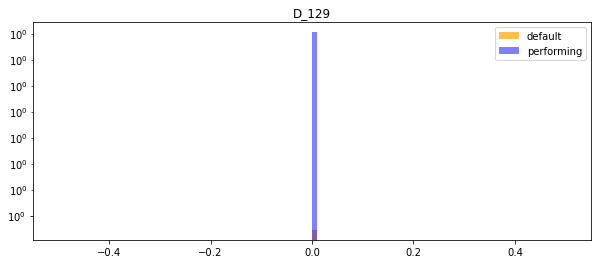

Variable: D_129 has 2.0% missing values
Min value is:  0.0
Max value is:  1.0
#########################################


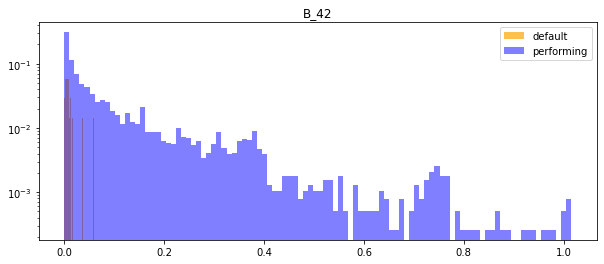

Variable: B_42 has 99.0% missing values
Min value is:  3.108574446741841e-06
Max value is:  9.051836967468262
#########################################


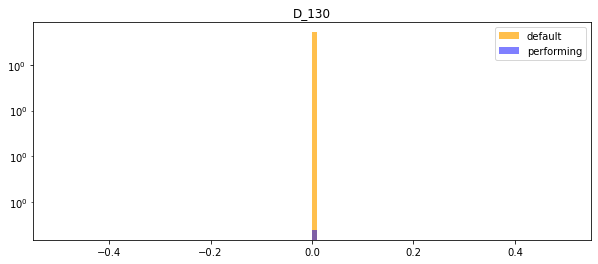

Variable: D_130 has 2.0% missing values
Min value is:  0.0
Max value is:  1.0
#########################################


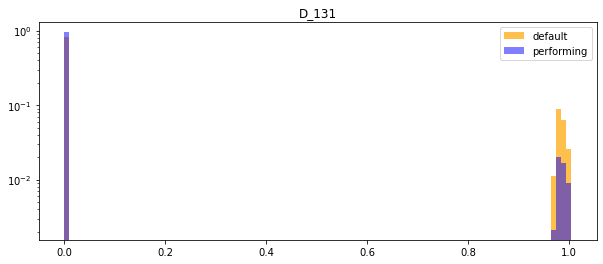

Variable: D_131 has 2.0% missing values
Min value is:  5.461692875741164e-09
Max value is:  1.491623878479004
#########################################


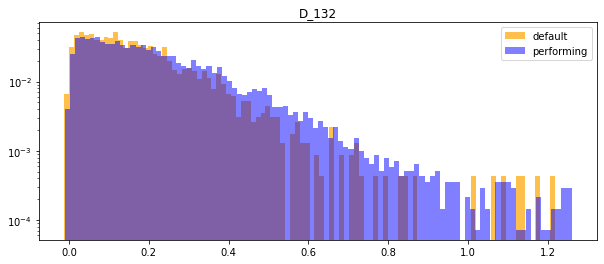

Variable: D_132 has 93.0% missing values
Min value is:  -0.014677170664072037
Max value is:  6.039005756378174
#########################################


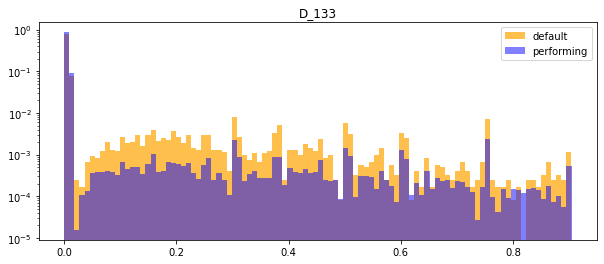

Variable: D_133 has 1.0% missing values
Min value is:  6.380582173726168e-10
Max value is:  1.5099995136260986
#########################################


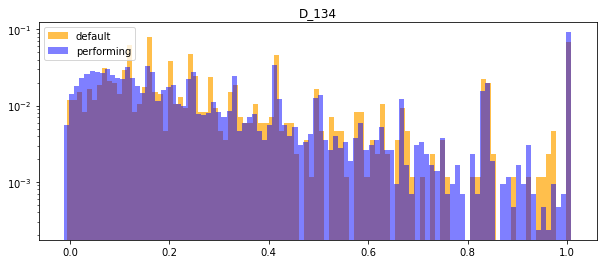

Variable: D_134 has 98.0% missing values
Min value is:  -0.01215563714504242
Max value is:  1.0099998712539673
#########################################


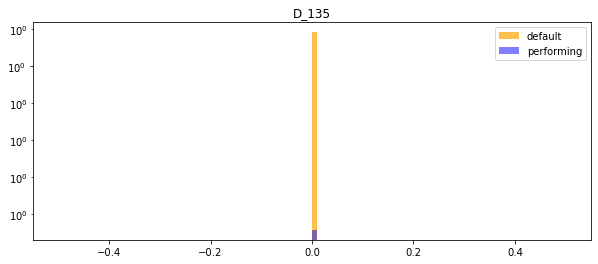

Variable: D_135 has 98.0% missing values
Min value is:  0.0
Max value is:  1.0
#########################################


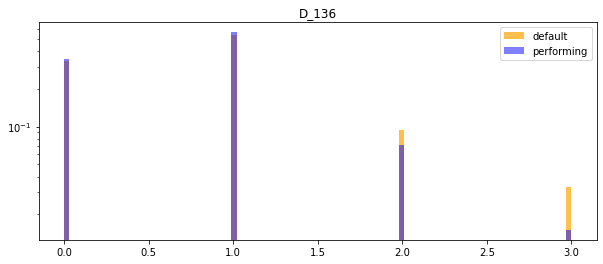

Variable: D_136 has 98.0% missing values
Min value is:  0.0
Max value is:  7.0
#########################################


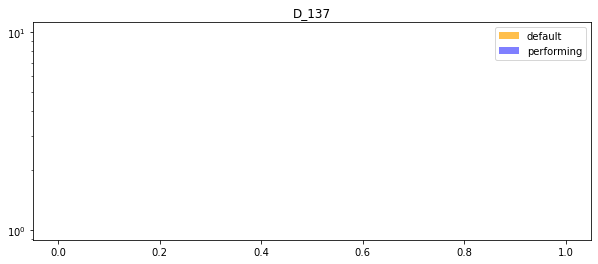

Variable: D_137 has 98.0% missing values
Min value is:  0.0
Max value is:  1.0
#########################################


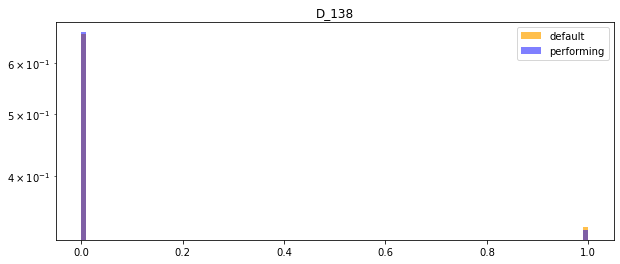

Variable: D_138 has 98.0% missing values
Min value is:  0.0
Max value is:  6.0
#########################################


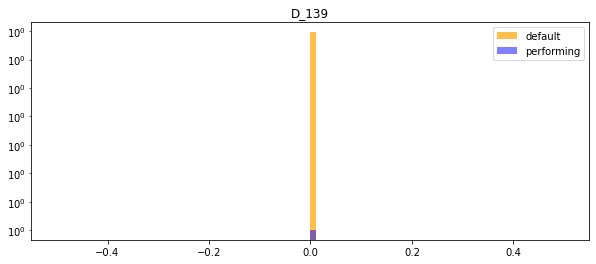

Variable: D_139 has 2.0% missing values
Min value is:  0.0
Max value is:  1.0
#########################################


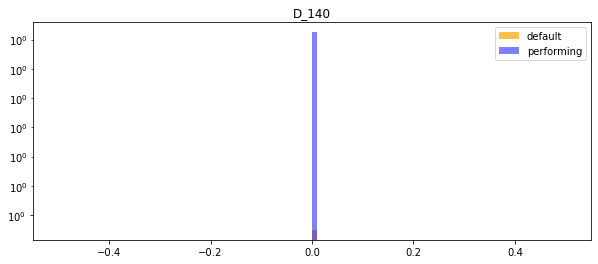

Variable: D_140 has 1.0% missing values
Min value is:  0.0
Max value is:  1.0
#########################################


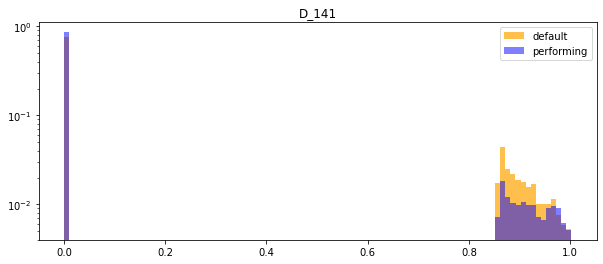

Variable: D_141 has 2.0% missing values
Min value is:  5.596787477912812e-09
Max value is:  1.3051990270614624
#########################################


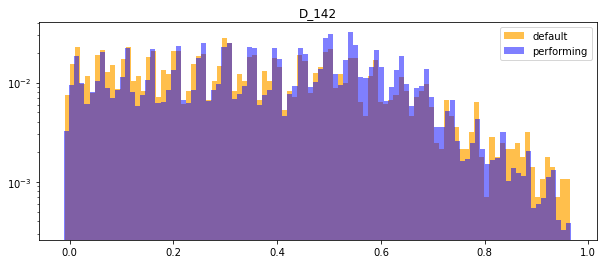

Variable: D_142 has 85.0% missing values
Min value is:  -0.014539339579641819
Max value is:  2.145716667175293
#########################################


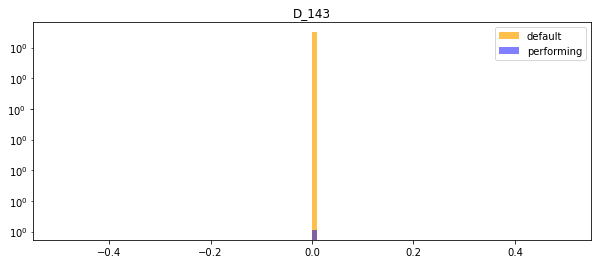

Variable: D_143 has 2.0% missing values
Min value is:  0.0
Max value is:  1.0
#########################################


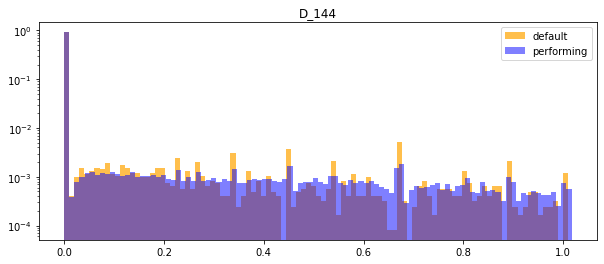

Variable: D_144 has 1.0% missing values
Min value is:  2.500990525788893e-09
Max value is:  1.34333074092865
#########################################


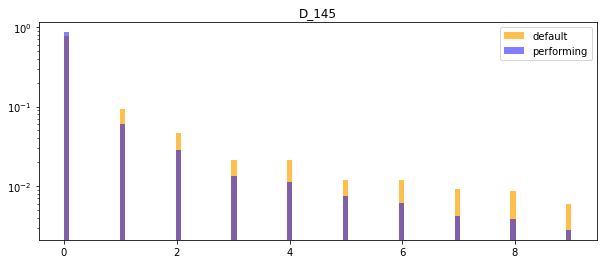

Variable: D_145 has 2.0% missing values
Min value is:  0.0
Max value is:  50.0


In [49]:
for column in df.columns:
    missing_percentage = round(np.mean(df[column].isna()),2)*100
    if missing_percentage != 0:
        print("#########################################")
        if column in static_columns:
            values_counts_1 = pd.DataFrame(
                df.loc[(df.target==1)&(df.customer_obs==1),column].value_counts(dropna=False, normalize=True)).reset_index()
            values_counts_0 = pd.DataFrame(
                df.loc[(df.target==1)&(df.customer_obs==1),column].value_counts(dropna=False, normalize=True)).reset_index()
            fig, axs = plt.subplots(1, 1, figsize=(15,3))
            axs.bar(values_counts_1.index, values_counts_1[column]*100, alpha=0.7, color="orange", label="default")
            axs.bar(values_counts_0.index, values_counts_0[column]*100, alpha=0.5, color="blue", label="performing")
            axs.set_title(column)
            axs.yaxis.set_major_formatter(mtick.PercentFormatter())
            values_counts = df.loc[df.customer_obs==1, column].value_counts(dropna=False).index
            axs.set_xticks([i for i in range(len(values_counts))], values_counts)
            axs.set_yscale('log')
            plt.legend()
            plt.show()
        else:
            columns_values_1 = df.loc[
                (df[column] < df[column].quantile(.99))&(df.target==1)&(df.customer_obs==1),column] 
            columns_values_0 = df.loc[
                (df[column] < df[column].quantile(.99))&(df.target==0)&(df.customer_obs==1),column]  
            fig, axs = plt.subplots(1, 1, figsize=(10,4))
            axs.set_yscale('log')
            axs.hist(columns_values_1, weights=np.ones(len(columns_values_1)) / len(columns_values_1),
                     bins=100, alpha=0.7, color="orange", label="default")
            axs.hist(columns_values_0, weights=np.ones(len(columns_values_0)) / len(columns_values_0),
                     bins=100, alpha=0.5, color="blue", label="performing")
            axs.set_title(column)
            plt.legend()
            plt.show()

    
            
        print("Variable: {} has {}% missing values".format(column, round(missing_percentage,2)))
        print("Min value is: ", df[column].min())
        print("Max value is: ", df[column].max())
        

## Check Distributions for the last reporting date

#########################################


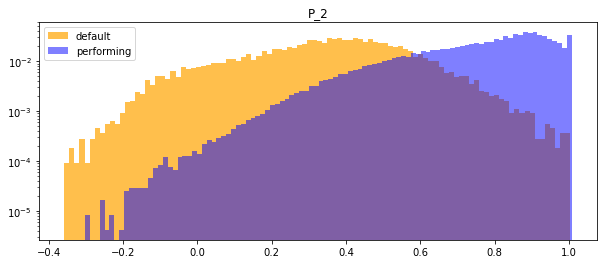

Variable: P_2 has 1.0% missing values
Min value is:  -0.4210819602012634
Max value is:  1.0099999904632568
#########################################


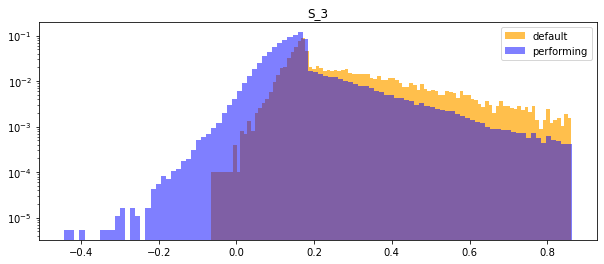

Variable: S_3 has 21.0% missing values
Min value is:  -0.6271320581436157
Max value is:  4.437958240509033
#########################################


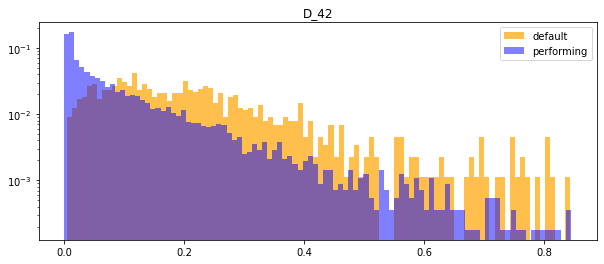

Variable: D_42 has 90.0% missing values
Min value is:  -0.00037201930535957217
Max value is:  4.1911187171936035
#########################################


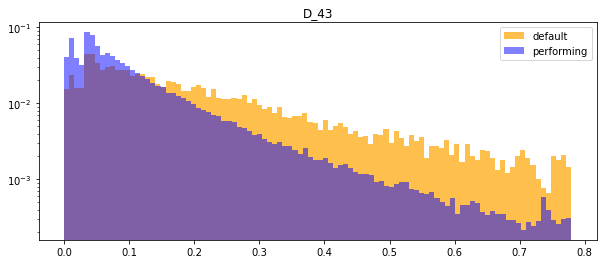

Variable: D_43 has 33.0% missing values
Min value is:  1.154549806869909e-07
Max value is:  6.658688545227051
#########################################


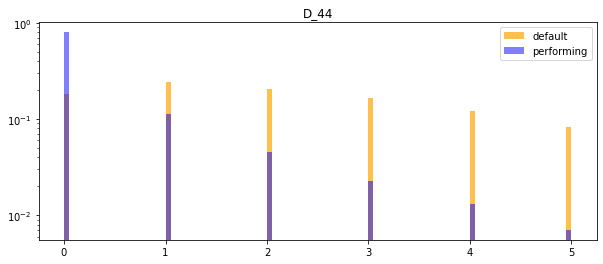

Variable: D_44 has 5.0% missing values
Min value is:  0.0
Max value is:  27.0
#########################################


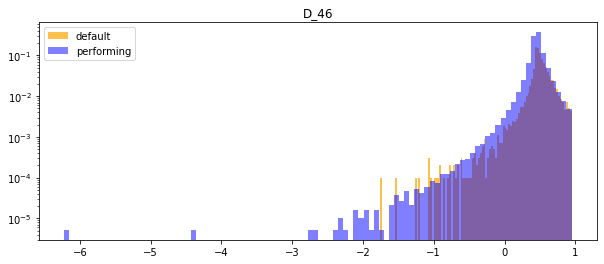

Variable: D_46 has 23.0% missing values
Min value is:  -9.507946968078613
Max value is:  14.806632041931152
#########################################


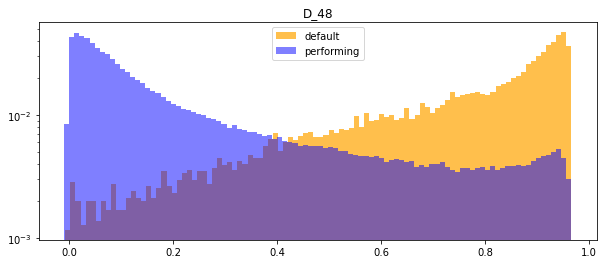

Variable: D_48 has 15.0% missing values
Min value is:  -0.00961355958133936
Max value is:  5.1067118644714355
#########################################


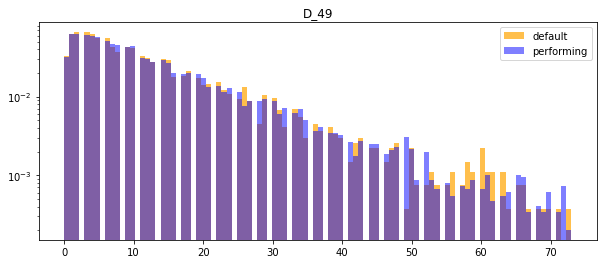

Variable: D_49 has 93.0% missing values
Min value is:  0.0
Max value is:  3254.0
#########################################


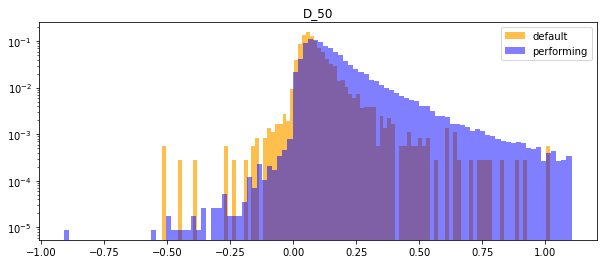

Variable: D_50 has 54.0% missing values
Min value is:  -306.487060546875
Max value is:  244.04266357421875
#########################################


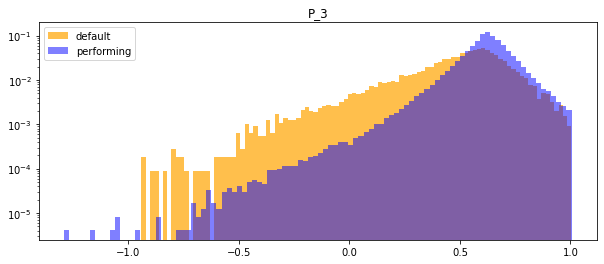

Variable: P_3 has 4.0% missing values
Min value is:  -1.519689679145813
Max value is:  2.428050994873047
#########################################


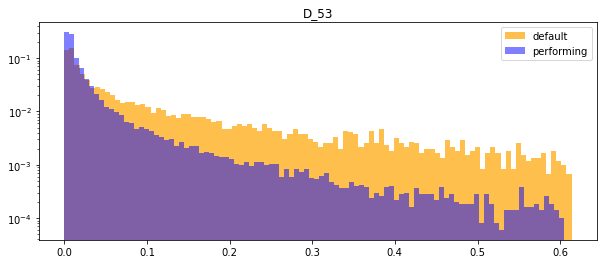

Variable: D_53 has 79.0% missing values
Min value is:  5.678128900399315e-08
Max value is:  5.95401668548584
#########################################


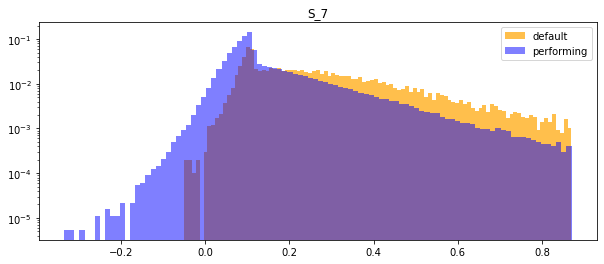

Variable: S_7 has 21.0% missing values
Min value is:  -0.4701317548751831
Max value is:  3.36822509765625
#########################################


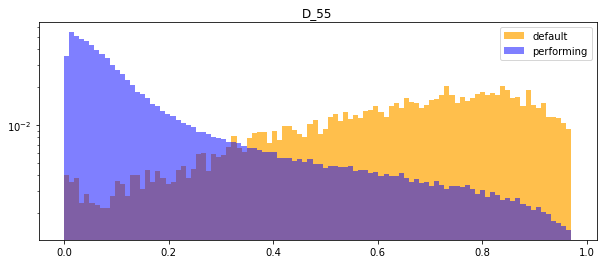

Variable: D_55 has 4.0% missing values
Min value is:  2.3532178872187615e-08
Max value is:  1.835677146911621
#########################################


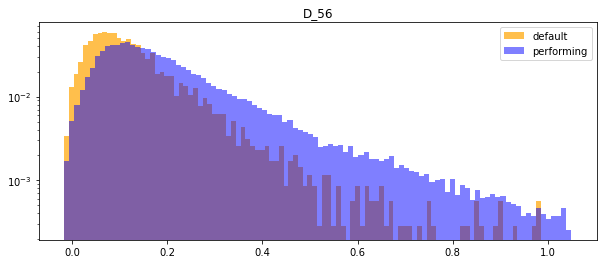

Variable: D_56 has 50.0% missing values
Min value is:  -0.017089147120714188
Max value is:  10.956514358520508
#########################################


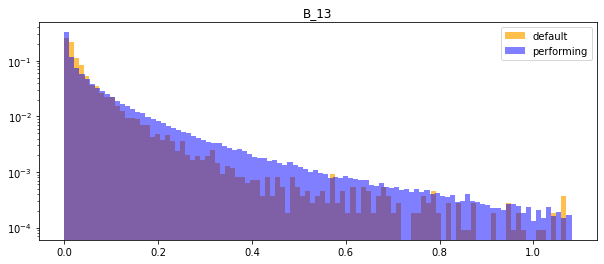

Variable: B_13 has 1.0% missing values
Min value is:  3.2746466871458324e-08
Max value is:  188.8134765625
#########################################


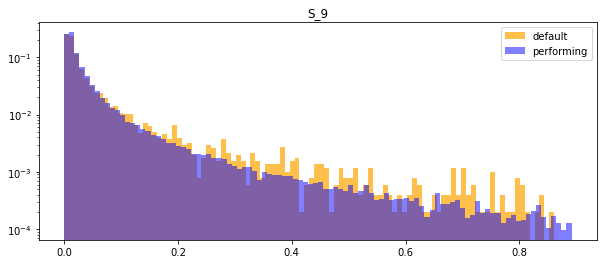

Variable: S_9 has 52.0% missing values
Min value is:  4.459887179564248e-07
Max value is:  2.8395848274230957
#########################################


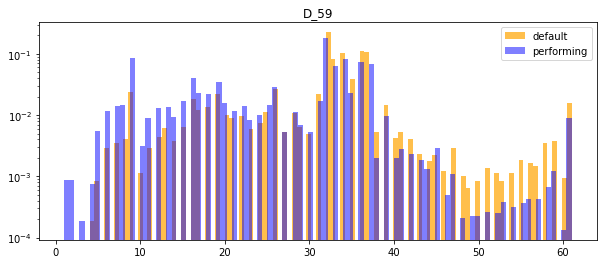

Variable: D_59 has 2.0% missing values
Min value is:  1.0
Max value is:  128.0
#########################################


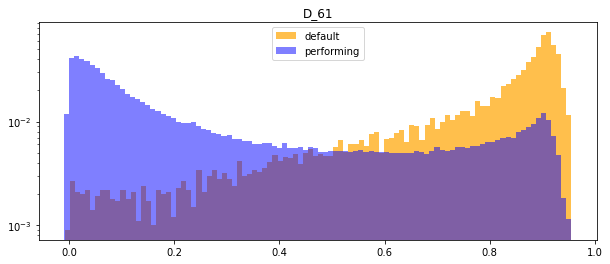

Variable: D_61 has 13.0% missing values
Min value is:  -0.009259018115699291
Max value is:  38.240901947021484
#########################################


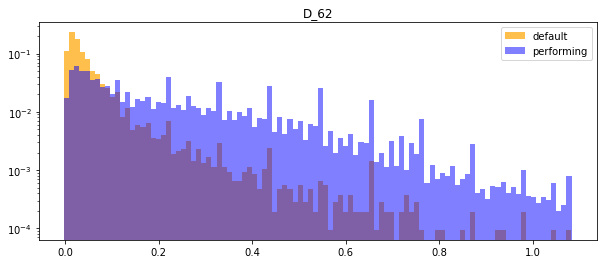

Variable: D_62 has 16.0% missing values
Min value is:  -0.0025261985138058662
Max value is:  11.100953102111816
#########################################


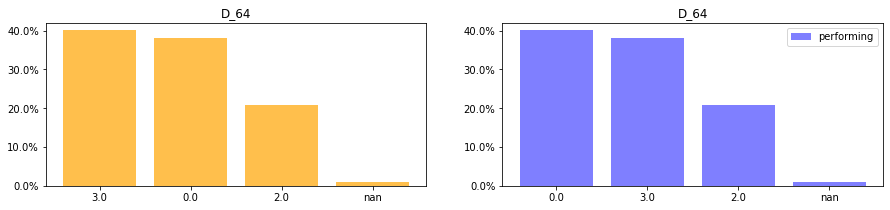

Variable: D_64 has 3.0% missing values
Min value is:  0.0
Max value is:  3.0
#########################################


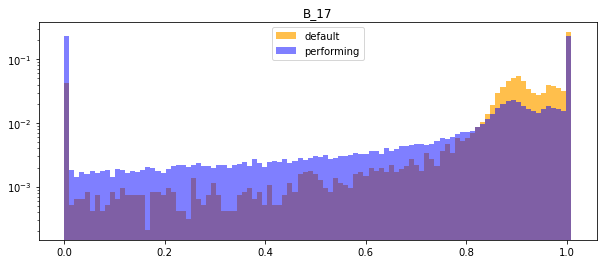

Variable: B_17 has 64.0% missing values
Min value is:  1.1320256021463138e-07
Max value is:  1.0099999904632568
#########################################


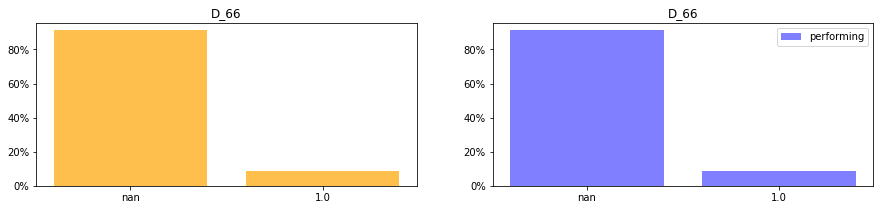

Variable: D_66 has 88.0% missing values
Min value is:  0.0
Max value is:  1.0
#########################################


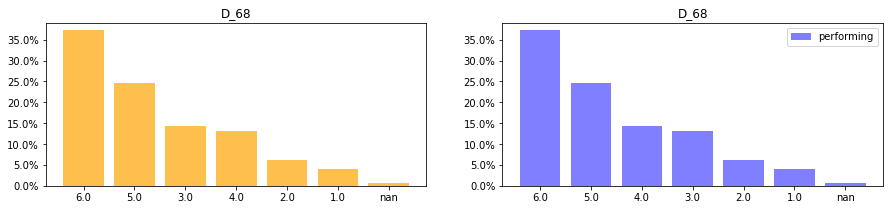

Variable: D_68 has 3.0% missing values
Min value is:  0.0
Max value is:  6.0
#########################################


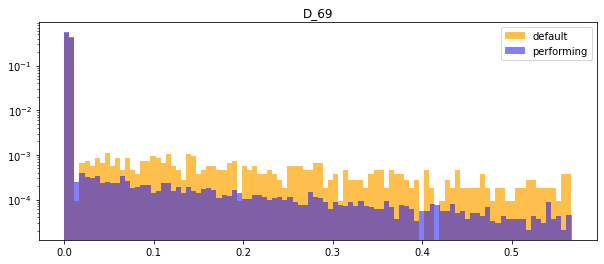

Variable: D_69 has 3.0% missing values
Min value is:  6.051600998091544e-09
Max value is:  2787.341552734375
#########################################


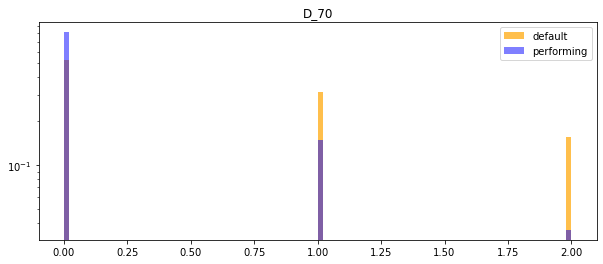

Variable: D_70 has 1.0% missing values
Min value is:  0.0
Max value is:  20.0
#########################################


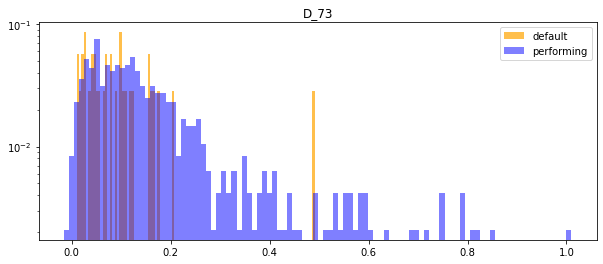

Variable: D_73 has 99.0% missing values
Min value is:  -0.04043599218130112
Max value is:  3.853646993637085
#########################################


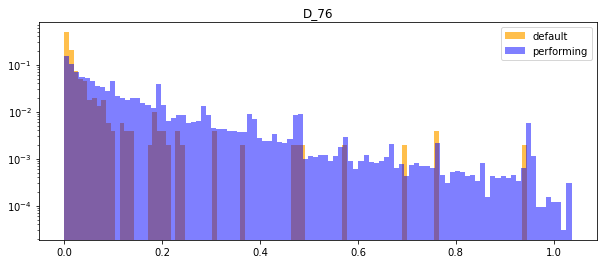

Variable: D_76 has 87.0% missing values
Min value is:  3.1284824331123673e-07
Max value is:  9.683378219604492
#########################################


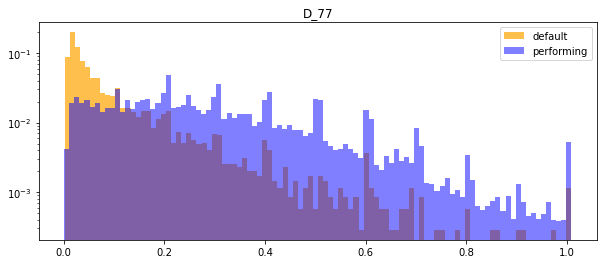

Variable: D_77 has 41.0% missing values
Min value is:  1.3982361224407214e-06
Max value is:  10.229169845581055
#########################################


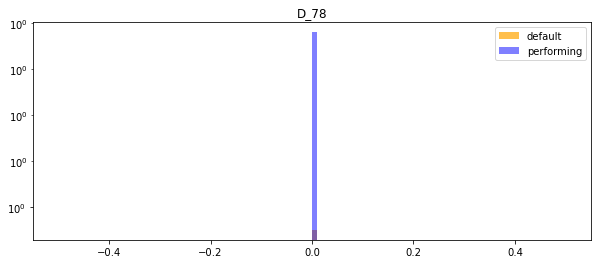

Variable: D_78 has 5.0% missing values
Min value is:  0.0
Max value is:  15.0
#########################################


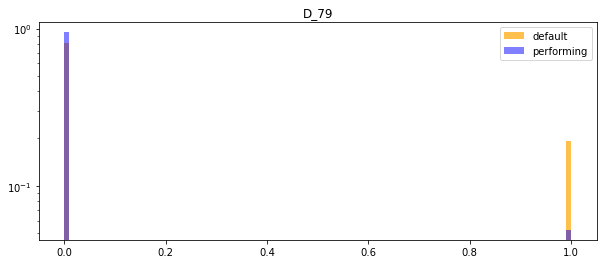

Variable: D_79 has 1.0% missing values
Min value is:  0.0
Max value is:  23.0
#########################################


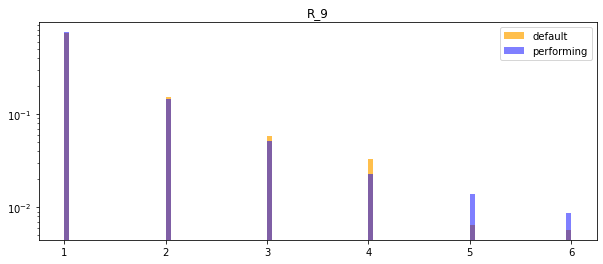

Variable: R_9 has 96.0% missing values
Min value is:  0.0
Max value is:  9.0
#########################################


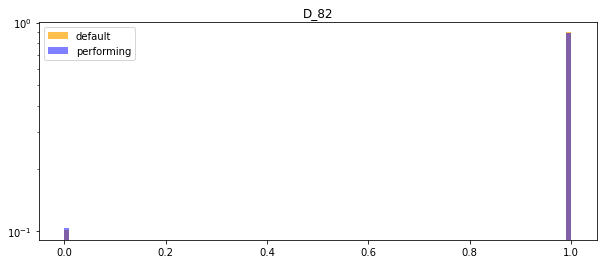

Variable: D_82 has 72.0% missing values
Min value is:  0.0
Max value is:  6.0
#########################################


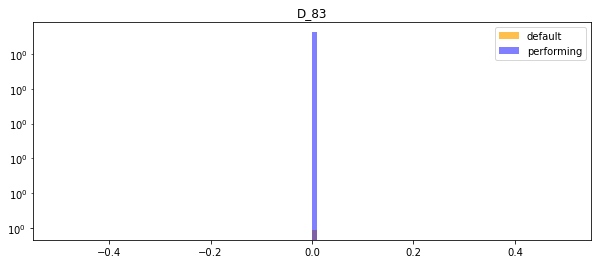

Variable: D_83 has 3.0% missing values
Min value is:  0.0
Max value is:  20.0
#########################################


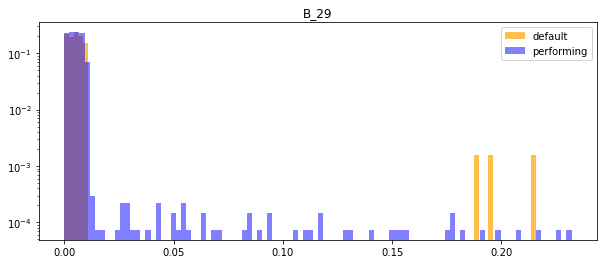

Variable: B_29 has 93.0% missing values
Min value is:  2.146359356913763e-08
Max value is:  8.411444664001465
#########################################


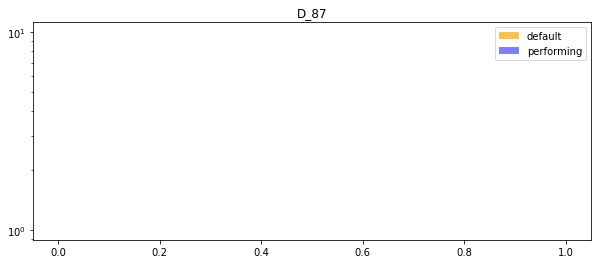

Variable: D_87 has 100.0% missing values
Min value is:  1.0
Max value is:  1.0
#########################################


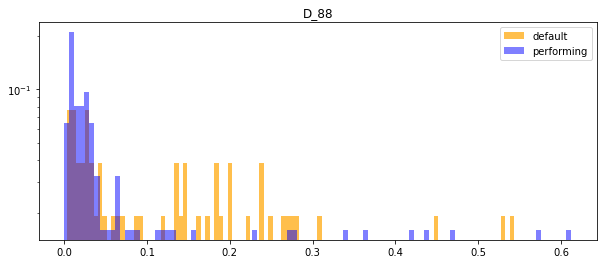

Variable: D_88 has 100.0% missing values
Min value is:  -3.1962663342710584e-05
Max value is:  1.4560428857803345
#########################################


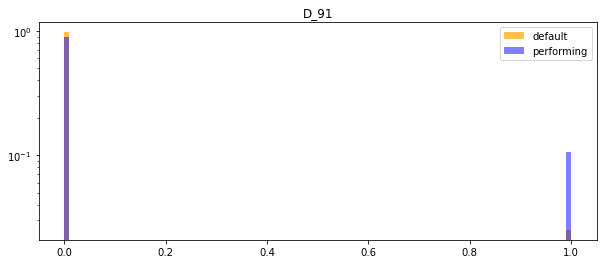

Variable: D_91 has 2.0% missing values
Min value is:  0.0
Max value is:  6.0
#########################################


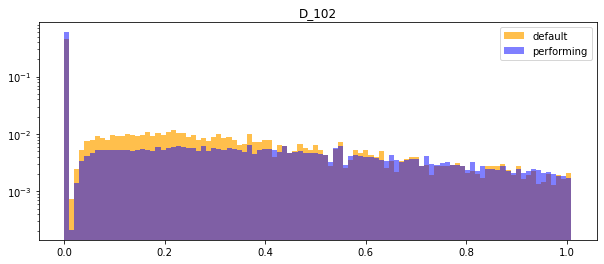

Variable: D_102 has 1.0% missing values
Min value is:  2.323852399399584e-08
Max value is:  1.0899981260299683
#########################################


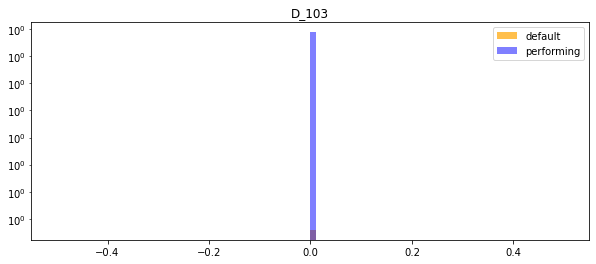

Variable: D_103 has 2.0% missing values
Min value is:  0.0
Max value is:  1.0
#########################################


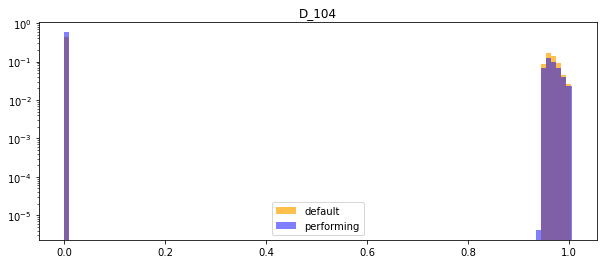

Variable: D_104 has 2.0% missing values
Min value is:  2.869107618153066e-09
Max value is:  1.237285852432251
#########################################


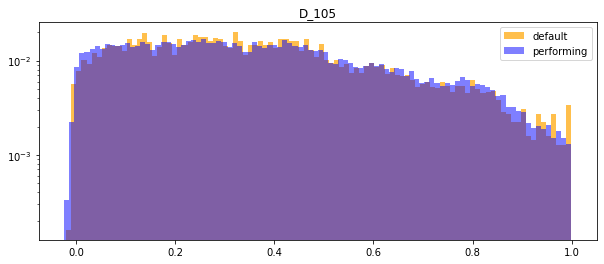

Variable: D_105 has 57.0% missing values
Min value is:  -0.025782166048884392
Max value is:  4.53844690322876
#########################################


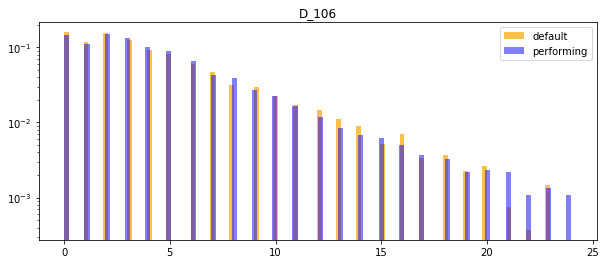

Variable: D_106 has 93.0% missing values
Min value is:  0.0
Max value is:  14417.0
#########################################


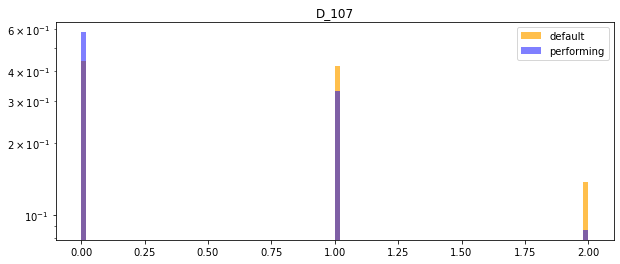

Variable: D_107 has 2.0% missing values
Min value is:  0.0
Max value is:  21.0
#########################################


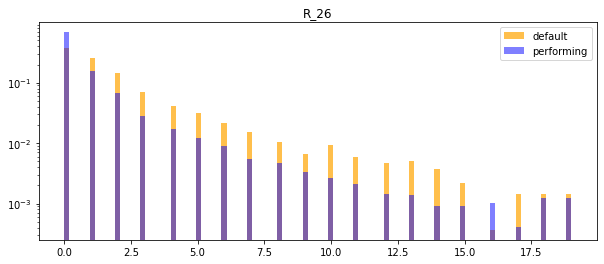

Variable: R_26 has 93.0% missing values
Min value is:  0.0
Max value is:  243.0
#########################################


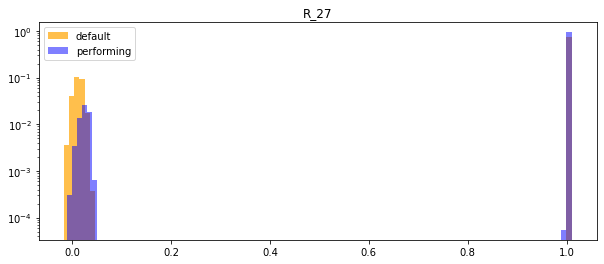

Variable: R_27 has 2.0% missing values
Min value is:  -0.018828444182872772
Max value is:  1.0099999904632568
#########################################


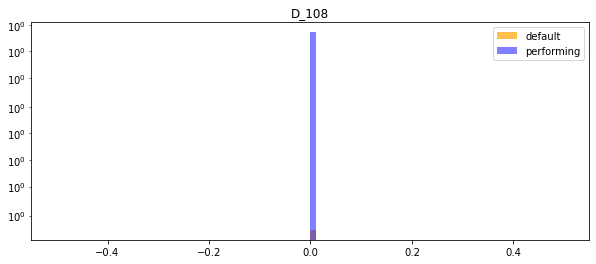

Variable: D_108 has 100.0% missing values
Min value is:  0.0
Max value is:  6.0
#########################################


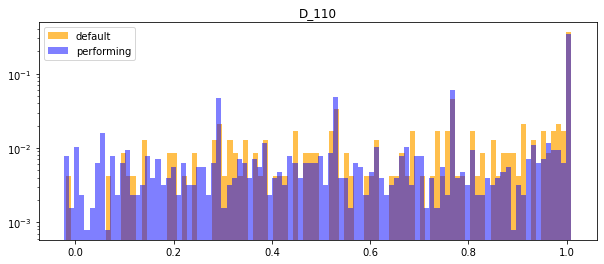

Variable: D_110 has 100.0% missing values
Min value is:  -0.02374994195997715
Max value is:  1.009986400604248
#########################################


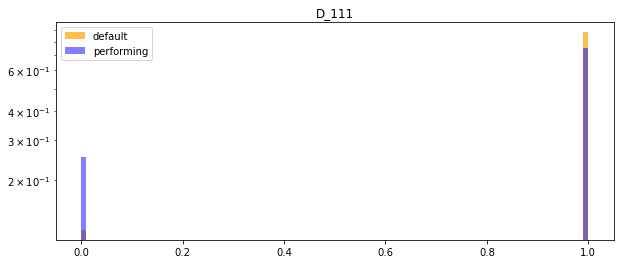

Variable: D_111 has 100.0% missing values
Min value is:  0.0
Max value is:  2.0
#########################################


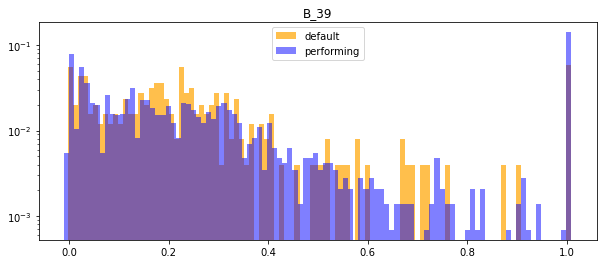

Variable: B_39 has 100.0% missing values
Min value is:  -0.9793140292167664
Max value is:  1.642560601234436
#########################################


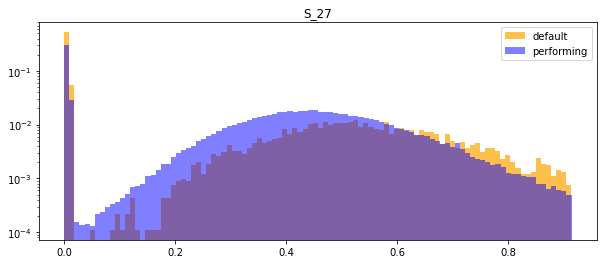

Variable: S_27 has 28.0% missing values
Min value is:  4.417077259510904e-10
Max value is:  5.346263885498047
#########################################


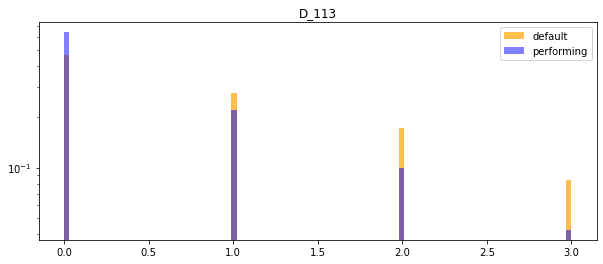

Variable: D_113 has 3.0% missing values
Min value is:  0.0
Max value is:  125.0
#########################################


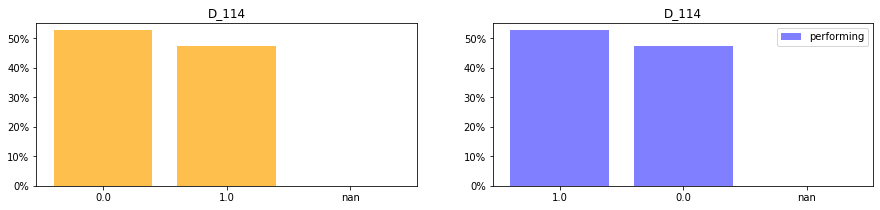

Variable: D_114 has 3.0% missing values
Min value is:  0.0
Max value is:  1.0
#########################################


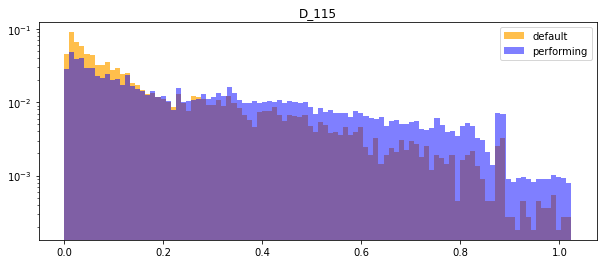

Variable: D_115 has 3.0% missing values
Min value is:  2.2280535461050022e-07
Max value is:  1.9995397329330444
#########################################


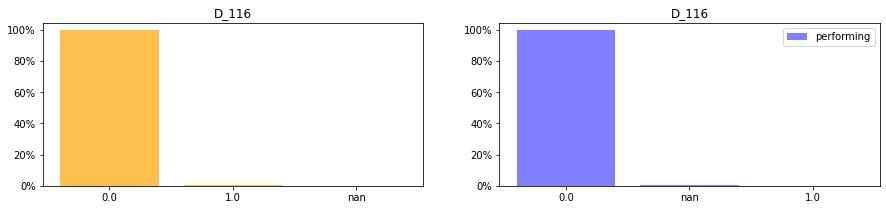

Variable: D_116 has 3.0% missing values
Min value is:  0.0
Max value is:  1.0
#########################################


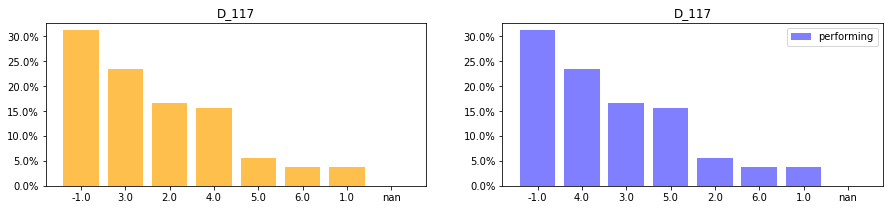

Variable: D_117 has 3.0% missing values
Min value is:  -1.0
Max value is:  6.0
#########################################


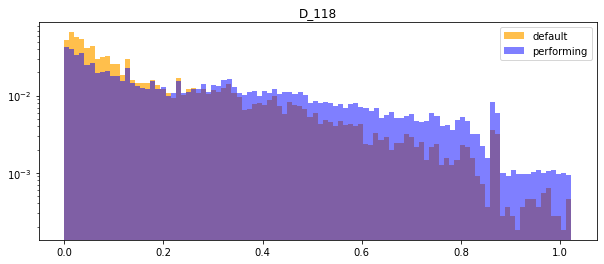

Variable: D_118 has 3.0% missing values
Min value is:  2.5519062418766225e-08
Max value is:  1.9708353281021118
#########################################


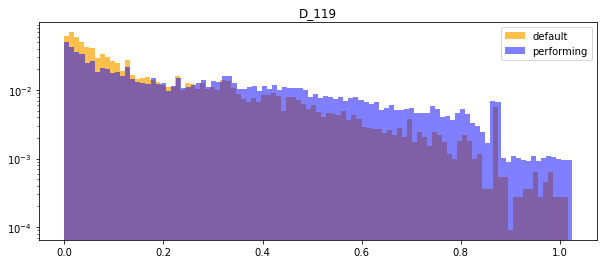

Variable: D_119 has 3.0% missing values
Min value is:  1.0666901317790689e-07
Max value is:  1.9769115447998047
#########################################


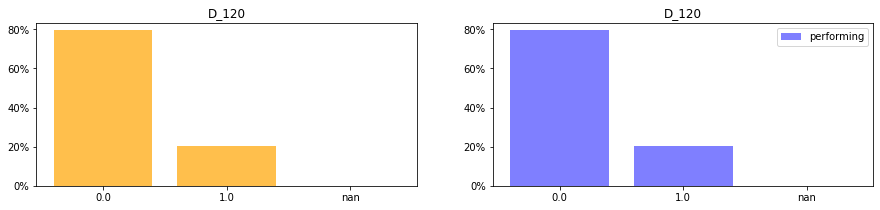

Variable: D_120 has 3.0% missing values
Min value is:  0.0
Max value is:  1.0
#########################################


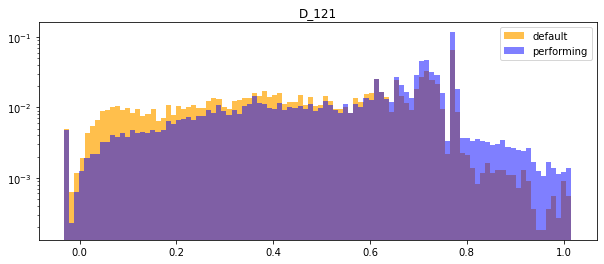

Variable: D_121 has 3.0% missing values
Min value is:  -0.032075006514787674
Max value is:  1.7911094427108765
#########################################


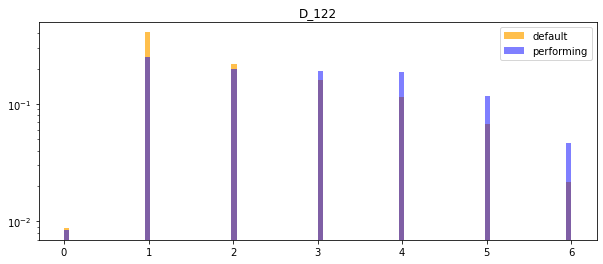

Variable: D_122 has 3.0% missing values
Min value is:  0.0
Max value is:  13.0
#########################################


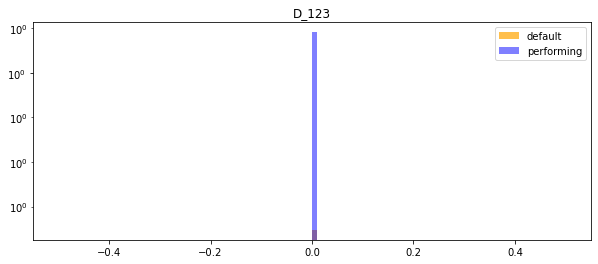

Variable: D_123 has 3.0% missing values
Min value is:  0.0
Max value is:  104.0
#########################################


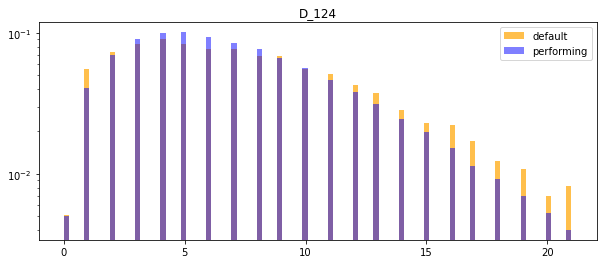

Variable: D_124 has 3.0% missing values
Min value is:  0.0
Max value is:  201.0
#########################################


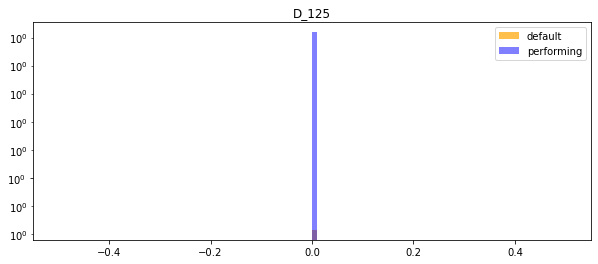

Variable: D_125 has 3.0% missing values
Min value is:  0.0
Max value is:  14.0
#########################################


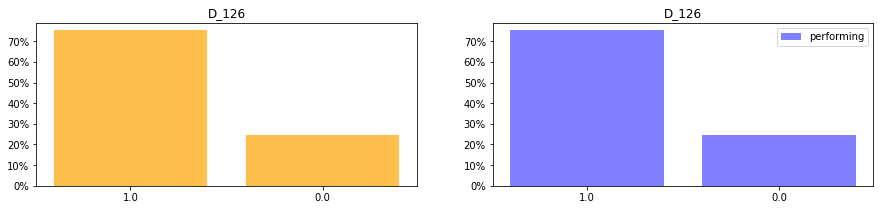

Variable: D_126 has 2.0% missing values
Min value is:  -1.0
Max value is:  1.0
#########################################


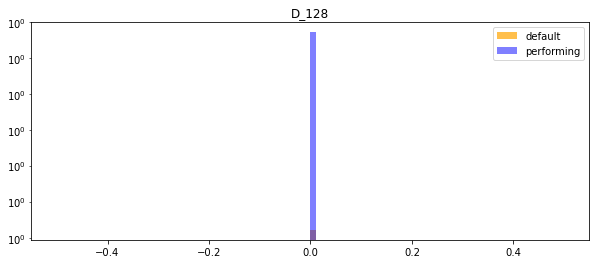

Variable: D_128 has 2.0% missing values
Min value is:  0.0
Max value is:  1.0
#########################################


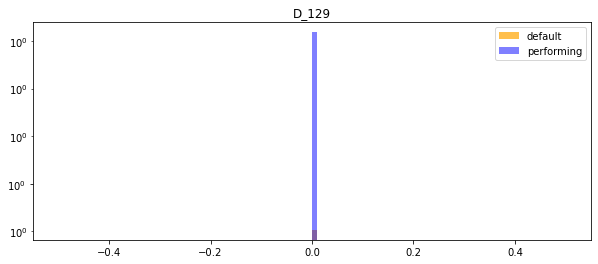

Variable: D_129 has 2.0% missing values
Min value is:  0.0
Max value is:  1.0
#########################################


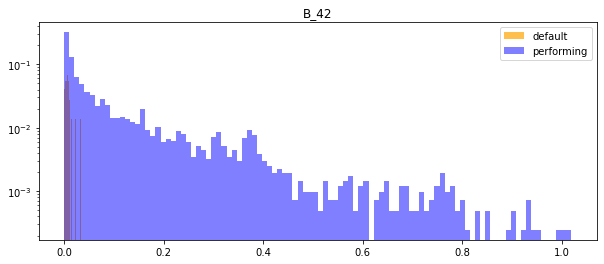

Variable: B_42 has 99.0% missing values
Min value is:  3.108574446741841e-06
Max value is:  9.051836967468262
#########################################


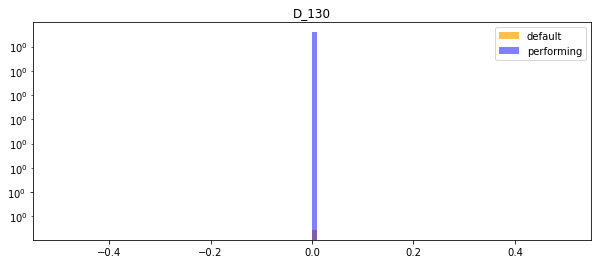

Variable: D_130 has 2.0% missing values
Min value is:  0.0
Max value is:  1.0
#########################################


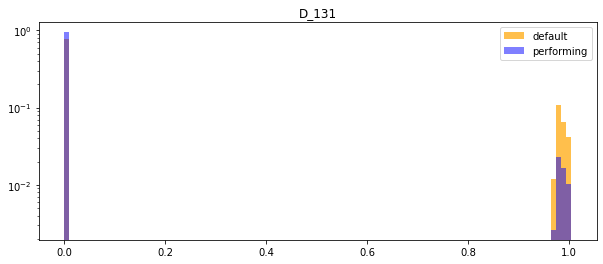

Variable: D_131 has 2.0% missing values
Min value is:  5.461692875741164e-09
Max value is:  1.491623878479004
#########################################


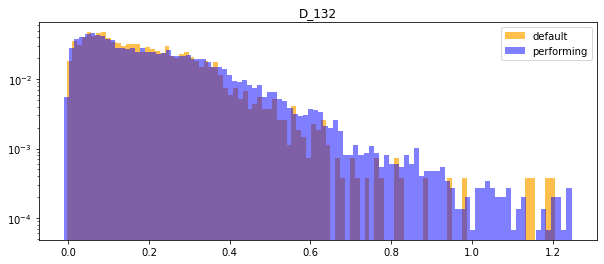

Variable: D_132 has 93.0% missing values
Min value is:  -0.014677170664072037
Max value is:  6.039005756378174
#########################################


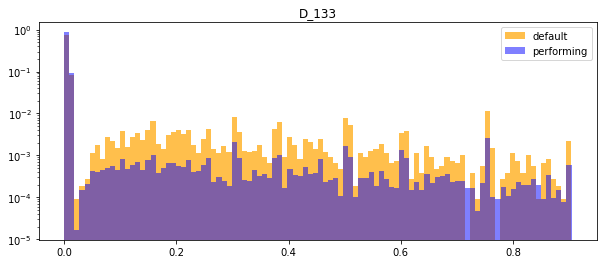

Variable: D_133 has 1.0% missing values
Min value is:  6.380582173726168e-10
Max value is:  1.5099995136260986
#########################################


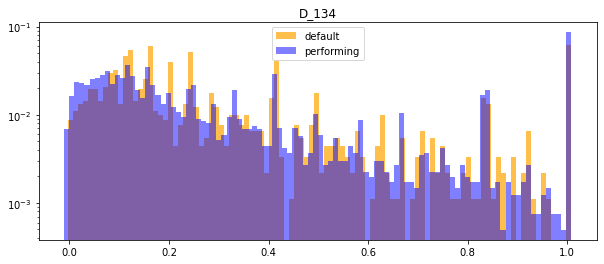

Variable: D_134 has 98.0% missing values
Min value is:  -0.01215563714504242
Max value is:  1.0099998712539673
#########################################


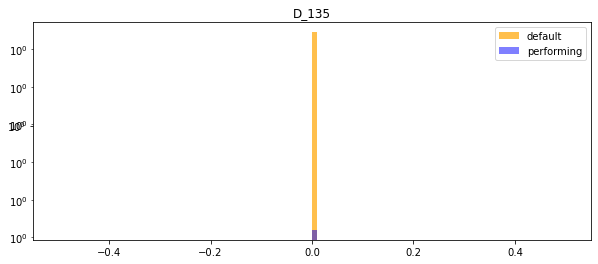

Variable: D_135 has 98.0% missing values
Min value is:  0.0
Max value is:  1.0
#########################################


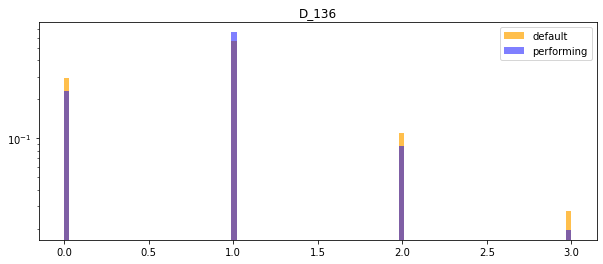

Variable: D_136 has 98.0% missing values
Min value is:  0.0
Max value is:  7.0
#########################################


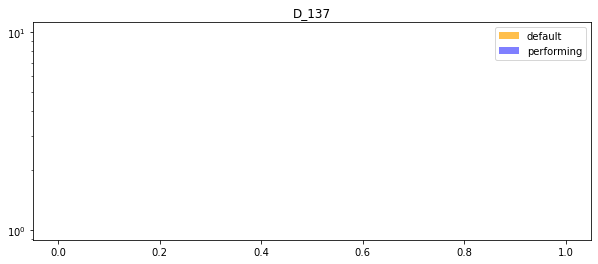

Variable: D_137 has 98.0% missing values
Min value is:  0.0
Max value is:  1.0
#########################################


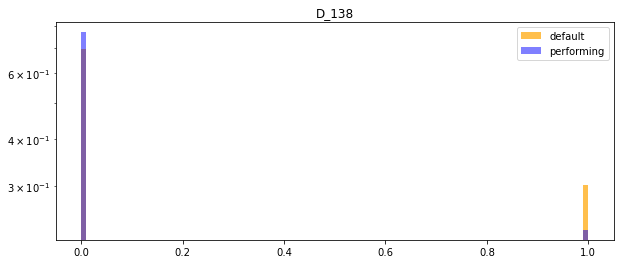

Variable: D_138 has 98.0% missing values
Min value is:  0.0
Max value is:  6.0
#########################################


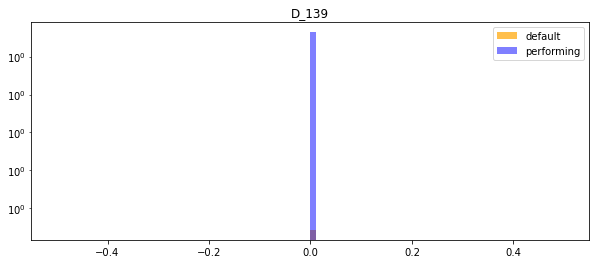

Variable: D_139 has 2.0% missing values
Min value is:  0.0
Max value is:  1.0
#########################################


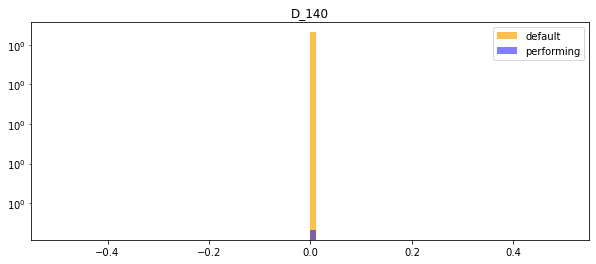

Variable: D_140 has 1.0% missing values
Min value is:  0.0
Max value is:  1.0
#########################################


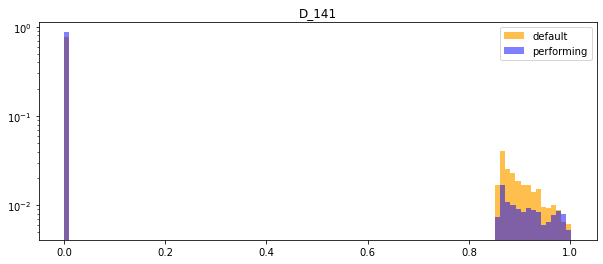

Variable: D_141 has 2.0% missing values
Min value is:  5.596787477912812e-09
Max value is:  1.3051990270614624
#########################################


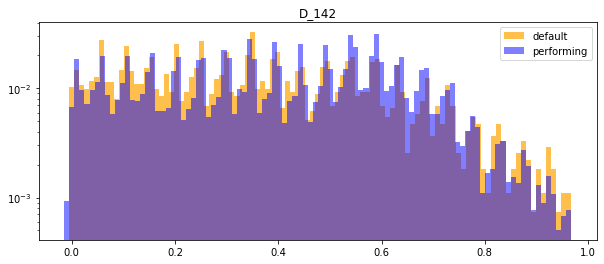

Variable: D_142 has 85.0% missing values
Min value is:  -0.014539339579641819
Max value is:  2.145716667175293
#########################################


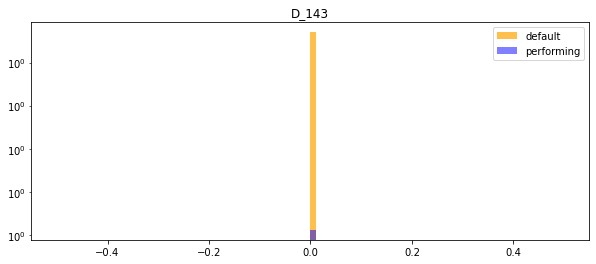

Variable: D_143 has 2.0% missing values
Min value is:  0.0
Max value is:  1.0
#########################################


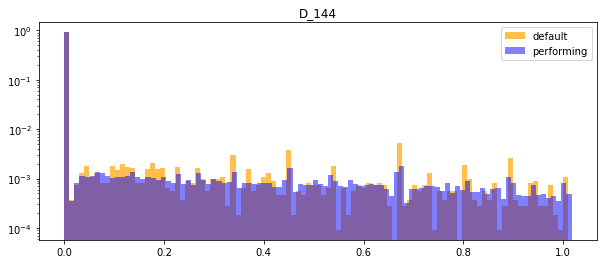

Variable: D_144 has 1.0% missing values
Min value is:  2.500990525788893e-09
Max value is:  1.34333074092865
#########################################


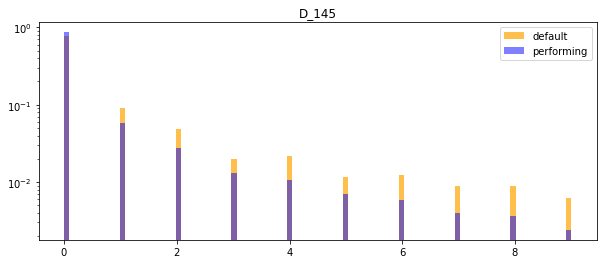

Variable: D_145 has 2.0% missing values
Min value is:  0.0
Max value is:  50.0


In [57]:
for column in df.columns:
    missing_percentage = round(np.mean(df[column].isna()),2)*100
    if missing_percentage != 0:
        print("#########################################")
        if column in static_columns:
            values_counts_1 = pd.DataFrame(
                df.loc[(df.target==1)&(df.customer_obs==12),column].value_counts(dropna=False, normalize=True)).reset_index()
            values_counts_0 = pd.DataFrame(
                df.loc[(df.target==1)&(df.customer_obs==12),column].value_counts(dropna=False, normalize=True)).reset_index()
            fig, axs = plt.subplots(1, 2, figsize=(15,3))
            axs[0].bar(values_counts_1.index, values_counts_1[column]*100, alpha=0.7, color="orange", label="default")
            axs[1].bar(values_counts_0.index, values_counts_0[column]*100, alpha=0.5, color="blue", label="performing")
            axs[0].set_title(column)
            axs[0].yaxis.set_major_formatter(mtick.PercentFormatter())
            values_counts = df.loc[(df.target==1)&(df.customer_obs==12), column].value_counts(dropna=False).index
            axs[0].set_xticks([i for i in range(len(values_counts))], values_counts)
            axs[1].set_title(column)
            axs[1].yaxis.set_major_formatter(mtick.PercentFormatter())
            values_counts = df.loc[(df.target==0)&(df.customer_obs==12), column].value_counts(dropna=False).index
            axs[1].set_xticks([i for i in range(len(values_counts))], values_counts)
            plt.legend()
            plt.show()
        else:
            columns_values_1 = df.loc[
                (df[column] < df[column].quantile(.99))&(df.target==1)&(df.customer_obs==12),column] 
            columns_values_0 = df.loc[
                (df[column] < df[column].quantile(.99))&(df.target==0)&(df.customer_obs==12),column]  
            fig, axs = plt.subplots(1, 1, figsize=(10,4))
            axs.set_yscale('log')
            axs.hist(columns_values_1, weights=np.ones(len(columns_values_1)) / len(columns_values_1),
                     bins=100, alpha=0.7, color="orange", label="default")
            axs.hist(columns_values_0, weights=np.ones(len(columns_values_0)) / len(columns_values_0),
                     bins=100, alpha=0.5, color="blue", label="performing")
            axs.set_title(column)
            plt.legend()
            plt.show()

    
            
        print("Variable: {} has {}% missing values".format(column, round(missing_percentage,2)))
        print("Min value is: ", df[column].min())
        print("Max value is: ", df[column].max())
        